# Reddit Analyzer
### A visual analysis of reddit’s most active communities - subreddits

#### By
Li, Xiongjie  
Madhavan, Sarvothaman

## Motivation
Reddit is a type of online community where users post "content" and vote on these content. The word Reddit is a word play on the phrase "read it?". Initially started as a community to share and vote on news links from the Internet, it quickly evolved into a platform where people share stories from Internet as well from thier own lives. Ability to comment on stories was later introduced and reddit comments add information, context and humour to the  stories. Reddit content is organized as communitites called 'subreddits' focussed on certain topic of interest. Anyone can create a subreddit; each subreddit is moderated by volunteers. [<sup>[1]</sup>](#One).  

Reddit Analyzer, in a very short term, attempts to find patterns in Reddit conversations. These conversations can happen around text based stories or around links that users share. A very simplified examples of some such patterns would be "What topic of discussion does the community on space interested in most?" "When is the community on nfl most active?". Ultimately, Reddit Analyzer can evolve into a either content discovery engine for reddit based on patterns and personal preferences or into a means for validating authenticity of arguments.

## Background and Related Work
Reddit Map is a project which uses similar dataset. In Reddit Map, subreddits are clustered based on thier shared  properties. The paper by <i>Choi, Ahn et al (Submitted) [<sup>[2]</sup>](#Two)</i> also uses similar dataset to quantify reddit comments in terms of Volume, Responsiveness and Virality. There are also projects such as snoopsnoo [<sup>[3]</sup>](#Three) which analyses user activity and Reddit Insight [<sup>[4]</sup>](#Four) which gives a overall visualization of subreddit statistics such as "The most popular nouns per SubReddit" and this relies on someone deliberately requesting to track a post or user.
Reddit Analyzer differs from above project in that it seeks to not only visually represent data from certain subreddit but also seeks to find meaningful patterns.

The initial data set to be used is from Aug 2015 subreddit posts available from google big query [<sup>[5]</sup>](#Five). Once the method and means of explaining patterns are established the methodology can be applied to dynamic rolling data.

## Research Questions and Working Hypothesis
The hypothesis that on which the project is based on is that for any given subreddit there are patterns in posts with respect to author, time, keywords (and hence topics). With that hypothesis in mind, some of the aspects which Reddit Analyzer will try to explore are,
1. Analyze the most popular posts using visualization such as word cloud.
2. Analyze authors on reddit by making visaluzations such as activity histogram. 
3. Analyze the website that are commonly used on reddit by url.

In [227]:
#Read the table

import matplotlib.pyplot as plt 
import pandas as pd  
import numpy as np
from collections import Counter
from itertools import chain
%matplotlib inline
import seaborn as sns
import math

df_til = pd.read_csv('til.csv',encoding = "ISO-8859-1",low_memory=False)
df_pic = pd.read_csv('pics.csv',encoding = "ISO-8859-1",low_memory=False)
df_fun = pd.read_csv('funny.csv',encoding = "ISO-8859-1",low_memory=False)
df_ask = pd.read_csv('askreddit1.csv',encoding = "ISO-8859-1",low_memory=False)

In [228]:
import nltk
# Run the below line only once. It downloads about 3 GB of data which can be useful for language processing
nltk.download()

showing info http://www.nltk.org/nltk_data/


True

## Plots for today I learned (/r/todayilearned/)

In [229]:
#Find the most common 100 words in the title, except stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import operator
#counter = Counter(df_til['title'])
title_notflat = [a.split() for a in df_til['title']]
counter = Counter(chain.from_iterable(title_notflat))
bar_word = counter.most_common(130)
cloud_word = counter.most_common(300)
stopwords = stopwords.words('english')
stopwords=[x.encode('ISO-8859-1').upper() for x in stopwords]
stopwords+=["TIL","TIL:","ONE","CALL","LIKE","-","ALSO","ACTUALLY","CAN","COULD","WOULD","&amp;"]


def removestopwords(wordlist, stopwords):
    deletelist=[]
    for key in wordlist:
        if(key.upper() in stopwords):
            deletelist.append(key)
        elif(len(key)==1):
            deletelist.append(key)
    for delkey in deletelist:
        del wordlist[delkey]
    return wordlist
def removeTenses(fwords):
    bases={} 
    for (w,b) in fwords:
        currword=WordNetLemmatizer().lemmatize((WordNetLemmatizer().lemmatize(w,'v').encode('ISO-8859-1'))).encode('ISO-8859-1')
        if currword in bases:
            bases[currword]+=b
        else:
            bases[currword]=b
    return bases

bar_base_word= removeTenses(bar_word)
bar_freq_word = removestopwords(bar_base_word,stopwords)
cloud_base_word= removeTenses(cloud_word)
cloud_freq_word = removestopwords(cloud_base_word,stopwords)
sorted_bar_freq = sorted(bar_freq_word.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_bar_freq)
#low_stop_word=[]
#for stpwr in stop_words:
#    low_stop_word.append(stpwr.lower().encode('ISO-8859-1'))
#stop_words+=low_stop_word

[('year', 919), ('use', 898), ('name', 771), ('people', 741), ('make', 739), ('first', 715), ('US', 429), ('man', 426), ('two', 380), ('American', 325), ('million', 311), ('even', 292), ('get', 282), ('world', 270), ('New', 269), ('kill', 261), ('time', 252), ('due', 247), ('many', 247), ('still', 245), ('United', 242), ('every', 242), ('find', 237), ('know', 237), ('movie', 237), ('die', 235), ('&amp;', 226), ('day', 225)]


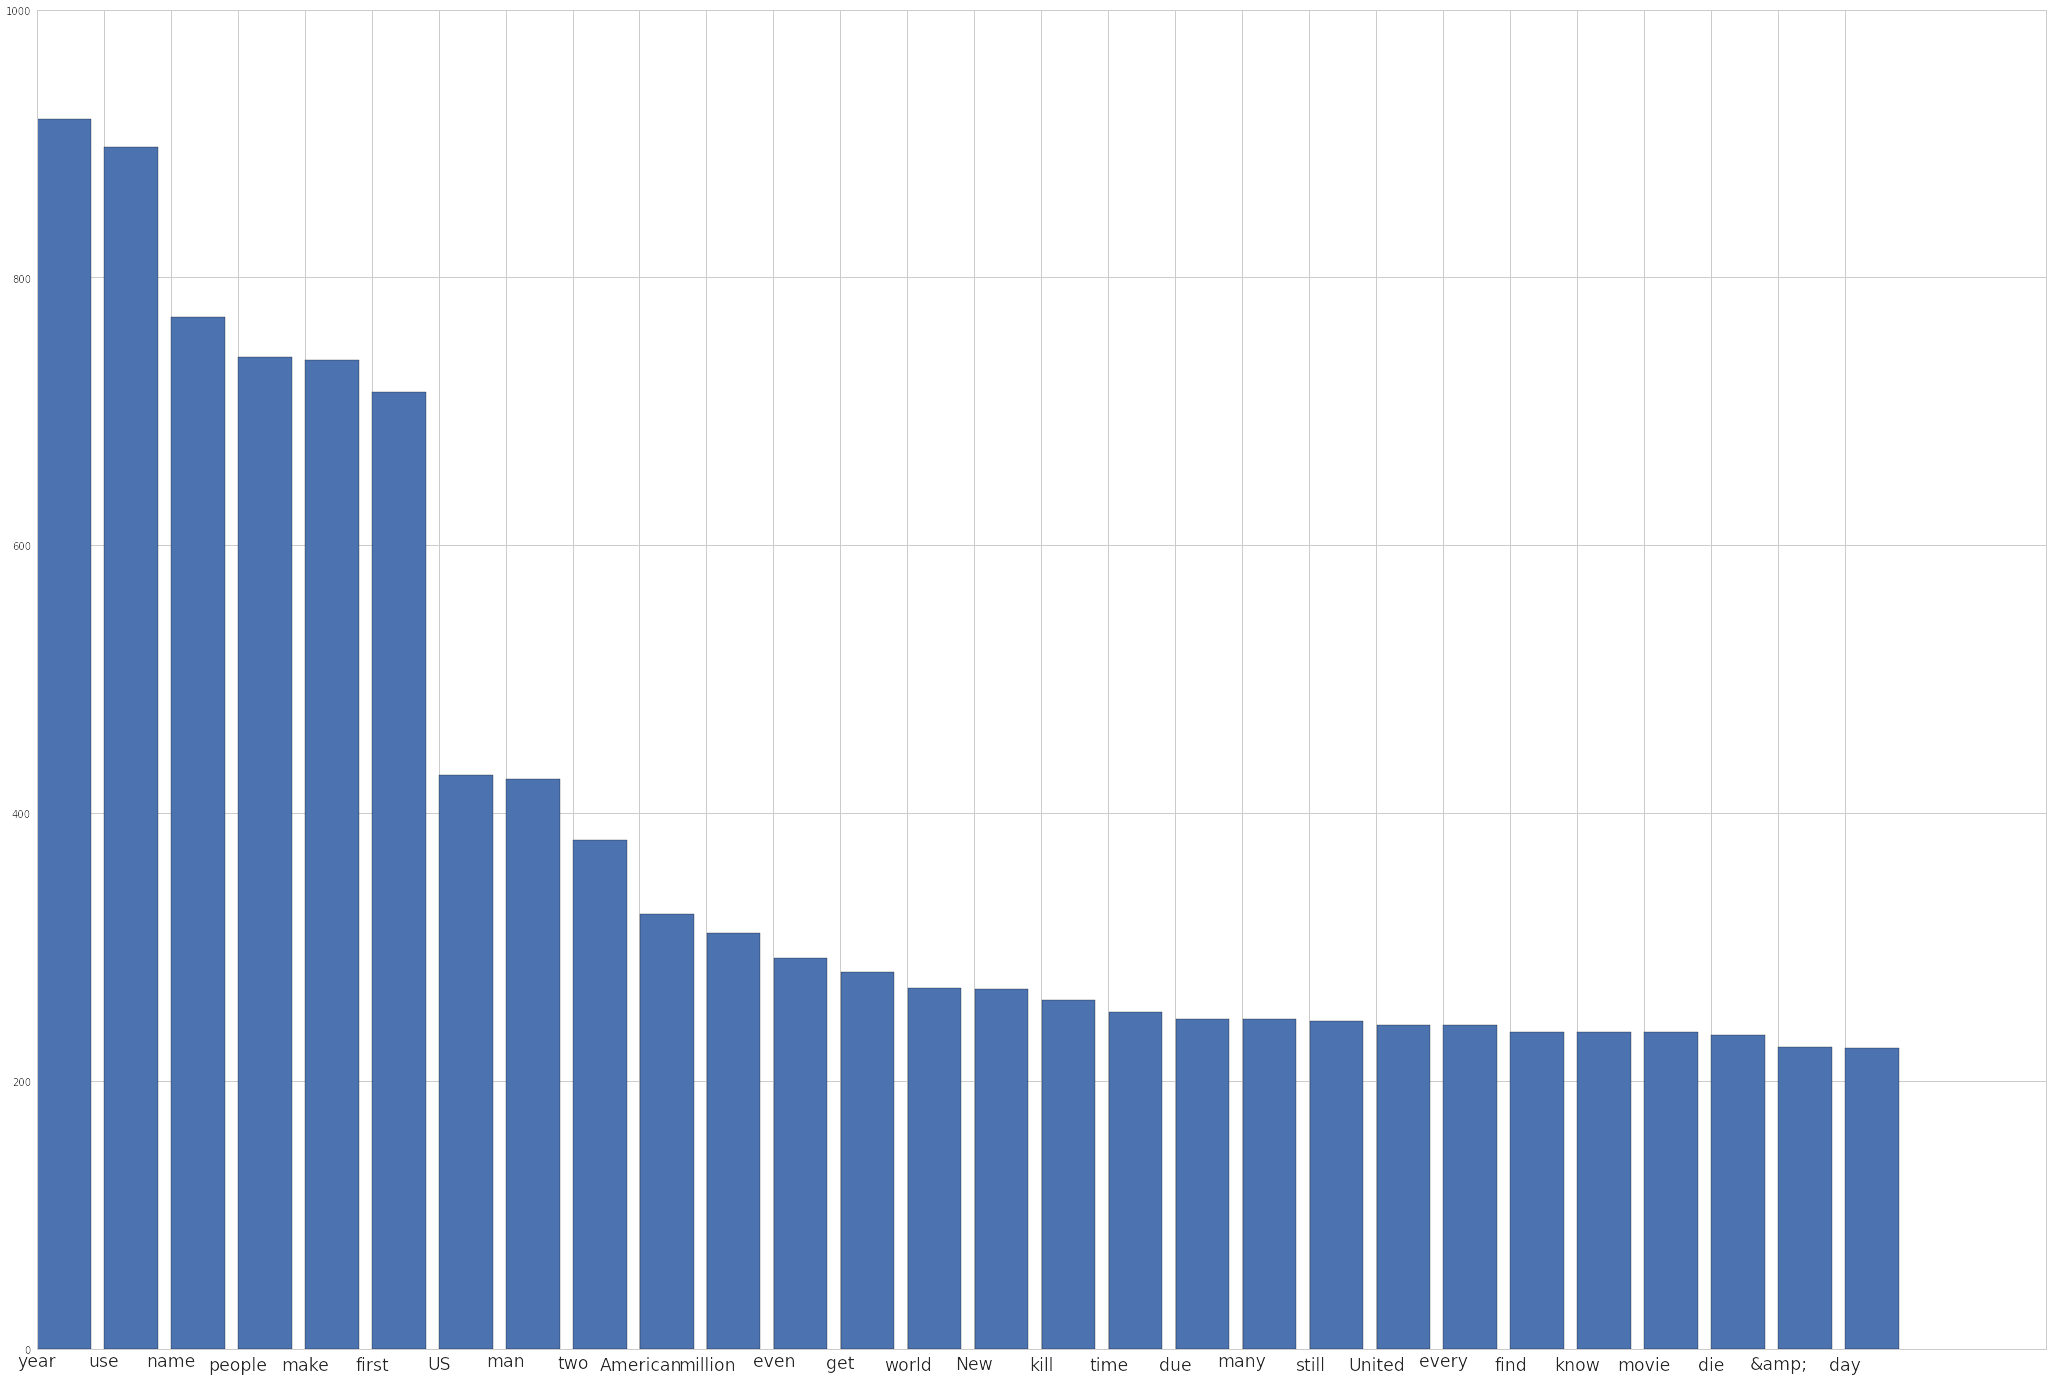

In [230]:
#Histogram of most common 100 word in title
xlabel = []
freq = []
for i in range(len(sorted_bar_freq)):
    xlabel.append(sorted_bar_freq[i][0])
    freq.append(sorted_bar_freq[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(freq)), freq)
plt.xticks(range(len(freq)),xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()


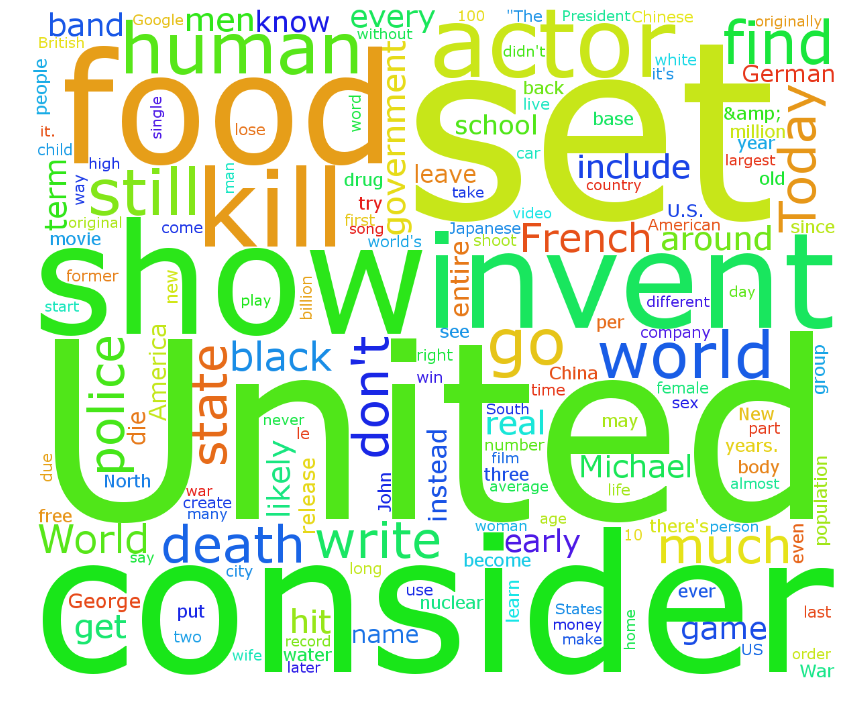

In [231]:
text = ""
for i in range(len(df_til['title'])):
    text = text + str(df_til['title'][i]) + " "
wordcloud = WordCloud(font_path='Verdana.ttf',
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate_from_frequencies([( k,v) for k, v in cloud_freq_word.iteritems()])

plt.figure(figsize=(36,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

[('year', 919), ('use', 898), ('name', 771), ('people', 741), ('make', 739), ('first', 715), ('US', 429), ('man', 426), ('two', 380), ('American', 325), ('million', 311), ('even', 292), ('get', 282), ('world', 270), ('New', 269), ('kill', 261), ('time', 252), ('due', 247), ('many', 247), ('still', 245), ('United', 242), ('every', 242), ('find', 237), ('know', 237), ('movie', 237), ('die', 235), ('&amp;', 226), ('day', 225)]


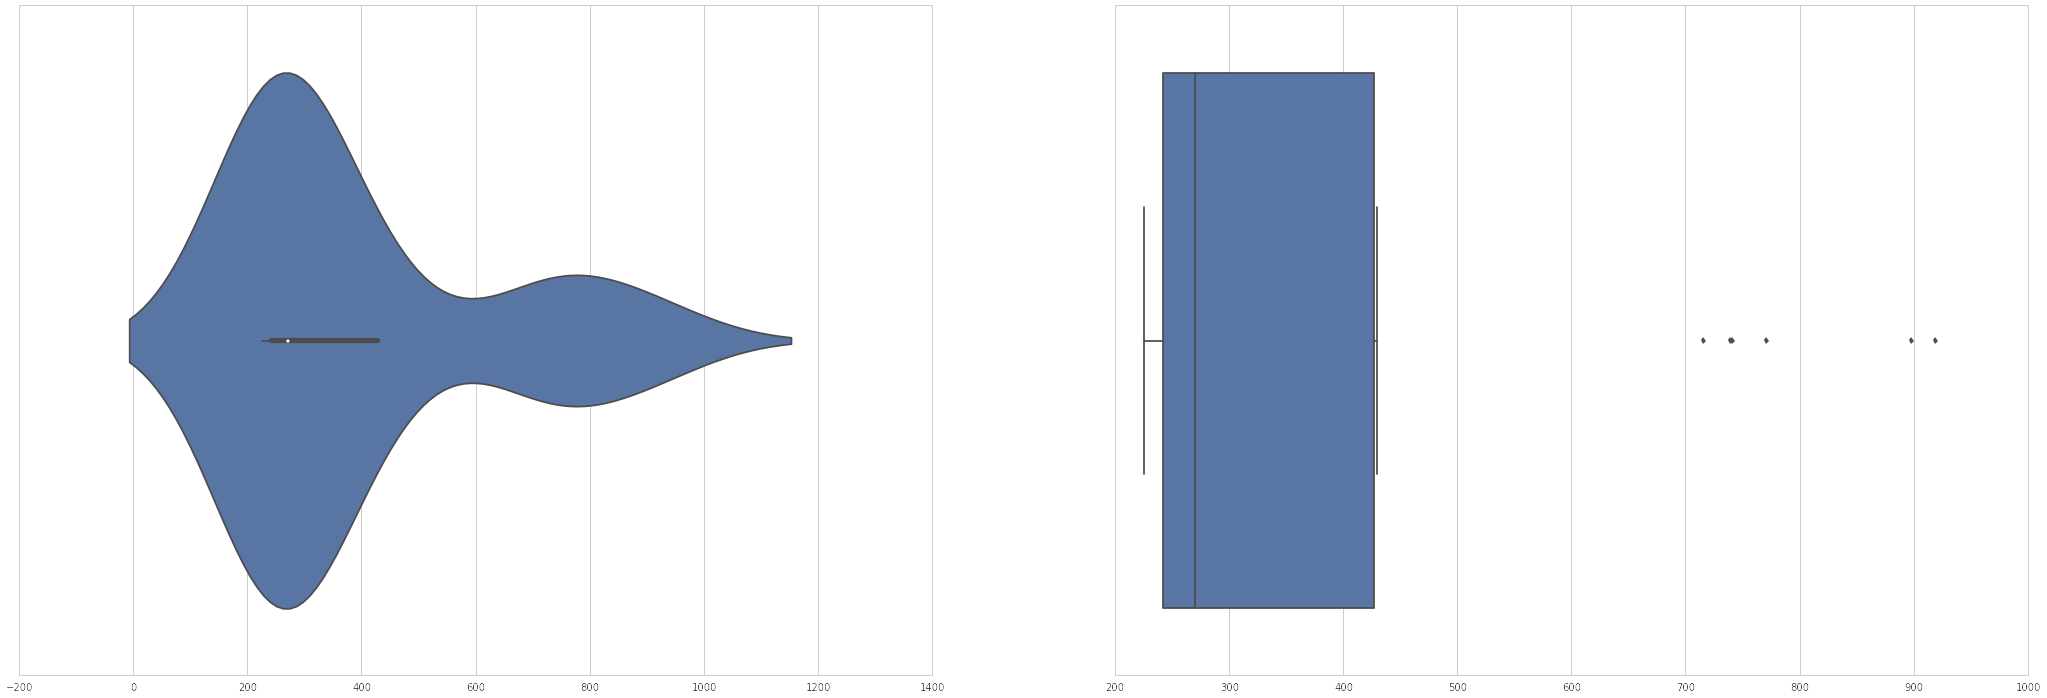

In [232]:
#violin plots for the most common 100 words' frequency in title 
freq = []
plt.figure(figsize=(36,12))
print(sorted_bar_freq)
for i in range(len(sorted_bar_freq)):
    freq.append(sorted_bar_freq[i][1])
plt.subplot(1,2,1)    
sns.set_style("whitegrid")
ax = sns.violinplot(x=freq)

plt.subplot(1,2,2)
ax = sns.boxplot(freq)

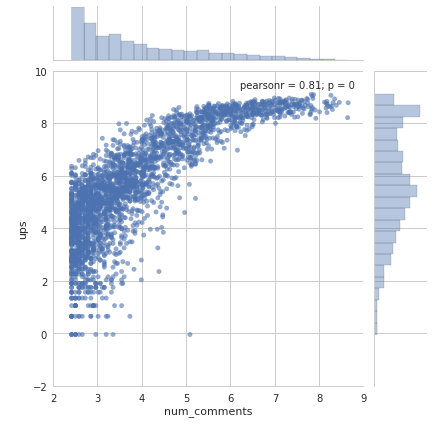

In [233]:
#1D histogram betwenn comments > 10 and ups >0 
cmt = df_til['num_comments'] > 10
up = df_til['ups'] > 0
subset = df_til[cmt & up]
sns.jointplot(np.log(subset['num_comments']), np.log(subset['ups']),alpha=0.6)


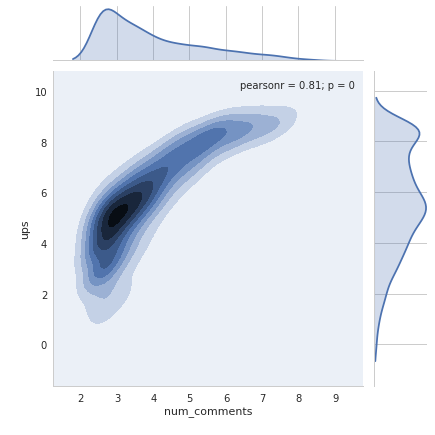

In [234]:
#KDE plot betwenn comments > 10 and ups >0 
sns.jointplot(np.log(subset['num_comments']), np.log(subset['ups']), kind='kde')

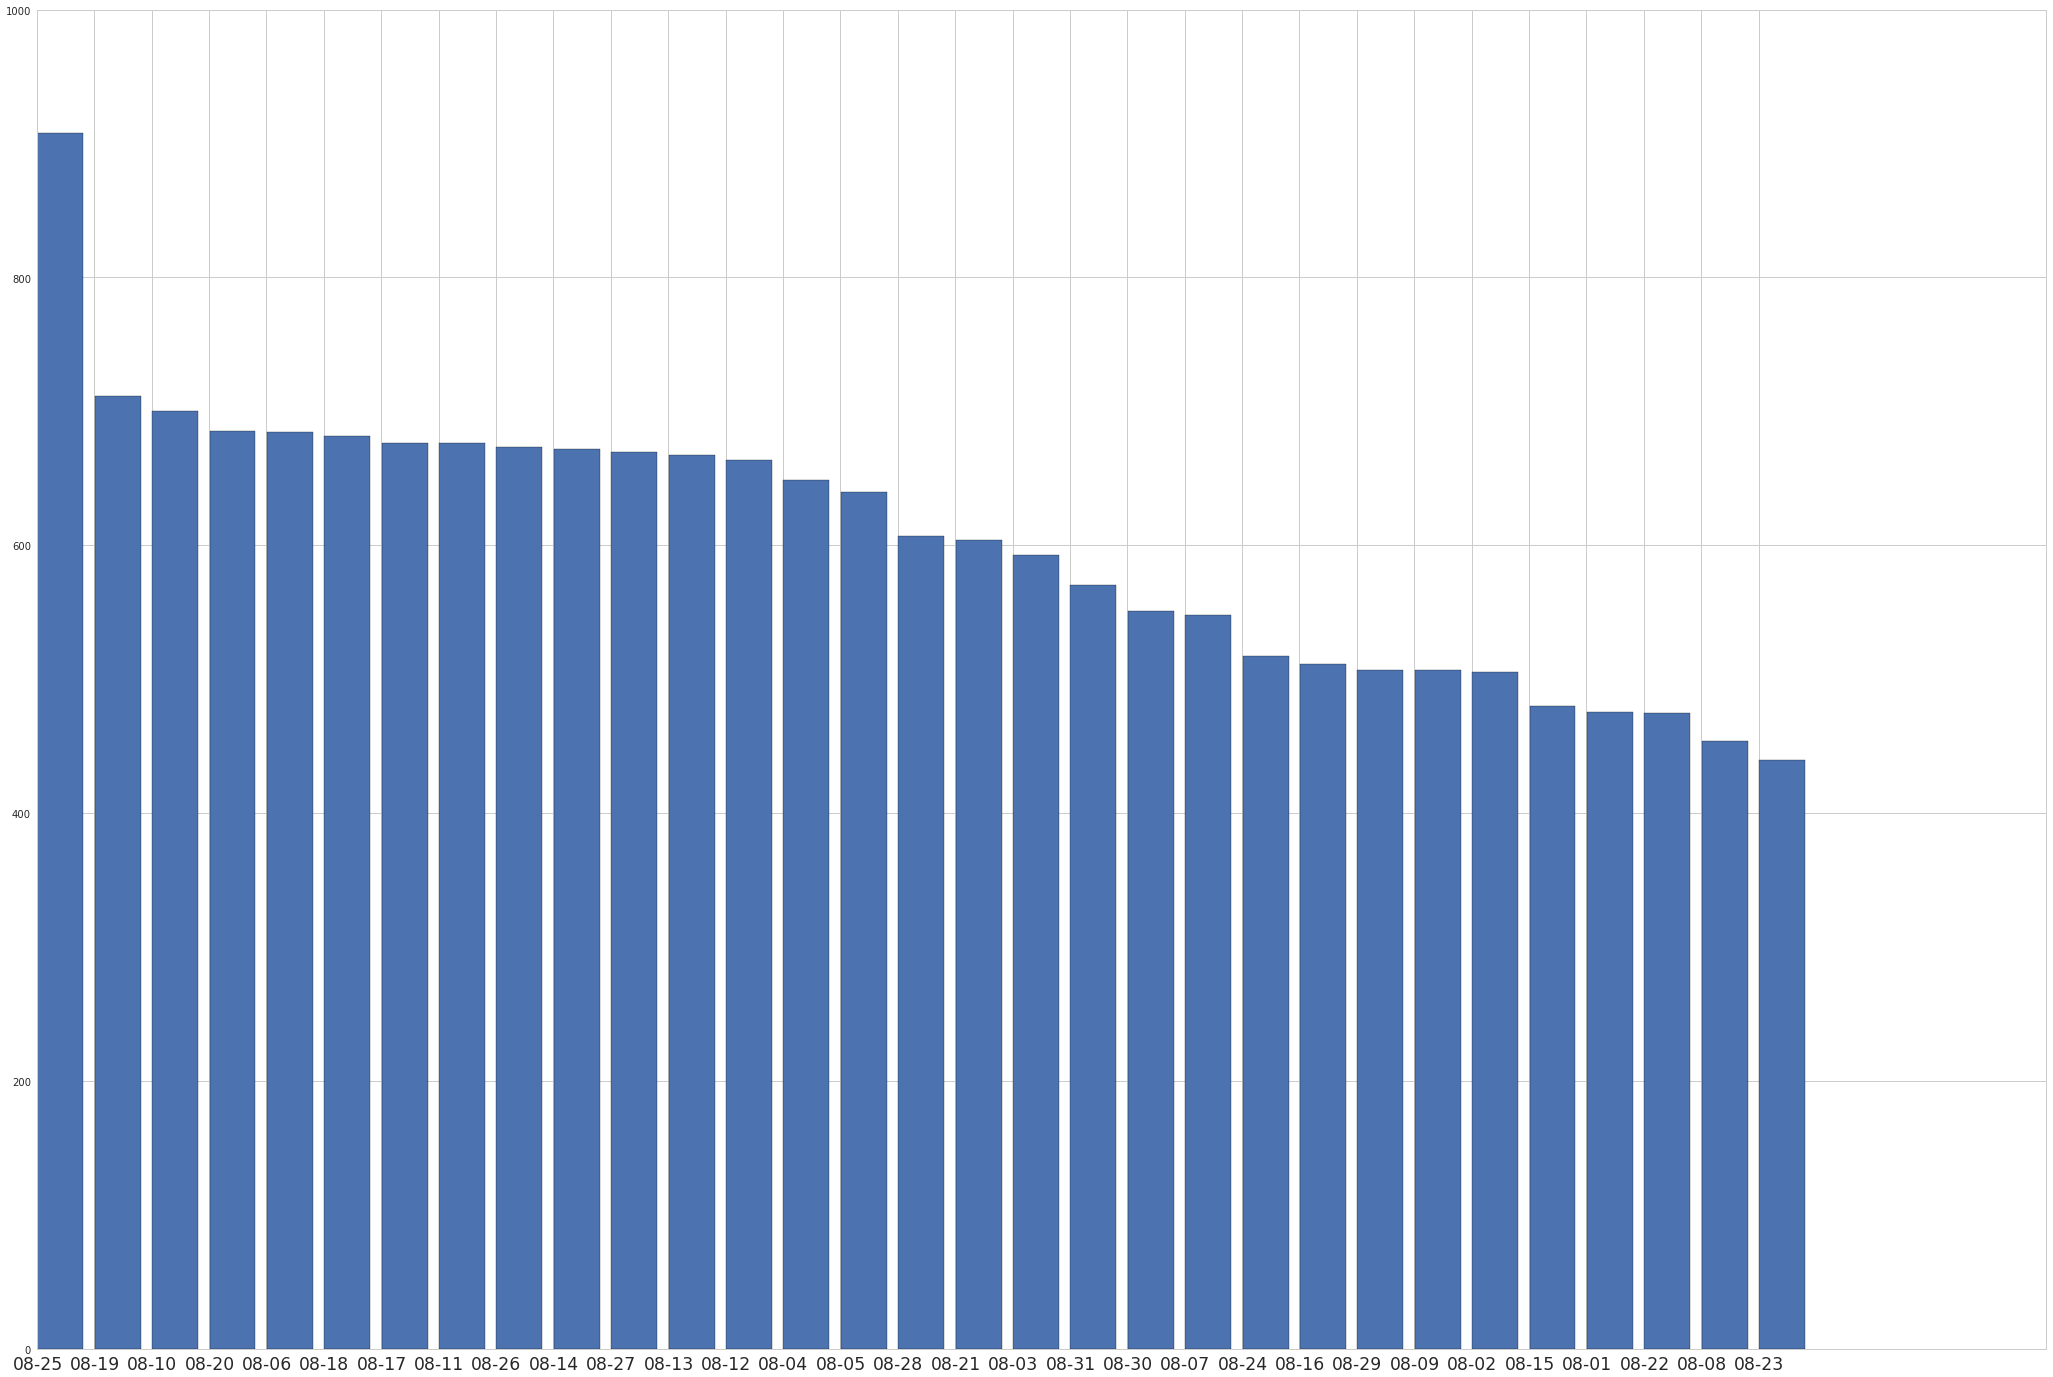

In [235]:
#date they post
import datetime

time_creat = df_til['created']
time=[]
for i in range(len(time_creat)):
    time.append(datetime.datetime.fromtimestamp(time_creat[i]).strftime('%m-%d'))
time_cnt = Counter(time).most_common(31)
#print(time_cnt)

#bar chart of date
xlabel = []
post_times = []
for i in range(len(time_cnt)):
    xlabel.append(time_cnt[i][0])
    post_times.append(time_cnt[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(post_times)), post_times)
plt.xticks(range(len(post_times)),xlabel, size ='xx-large',horizontalalignment='center')
##plt.yscale('log')
plt.show()

[('00', 755), ('01', 688), ('02', 656), ('03', 544), ('04', 509), ('05', 465), ('06', 494), ('07', 509), ('08', 533), ('09', 706), ('10', 767), ('11', 908), ('12', 995), ('13', 1019), ('14', 1030), ('15', 1127), ('16', 1017), ('17', 999), ('18', 861), ('19', 914), ('20', 879), ('21', 843), ('22', 776), ('23', 823)]


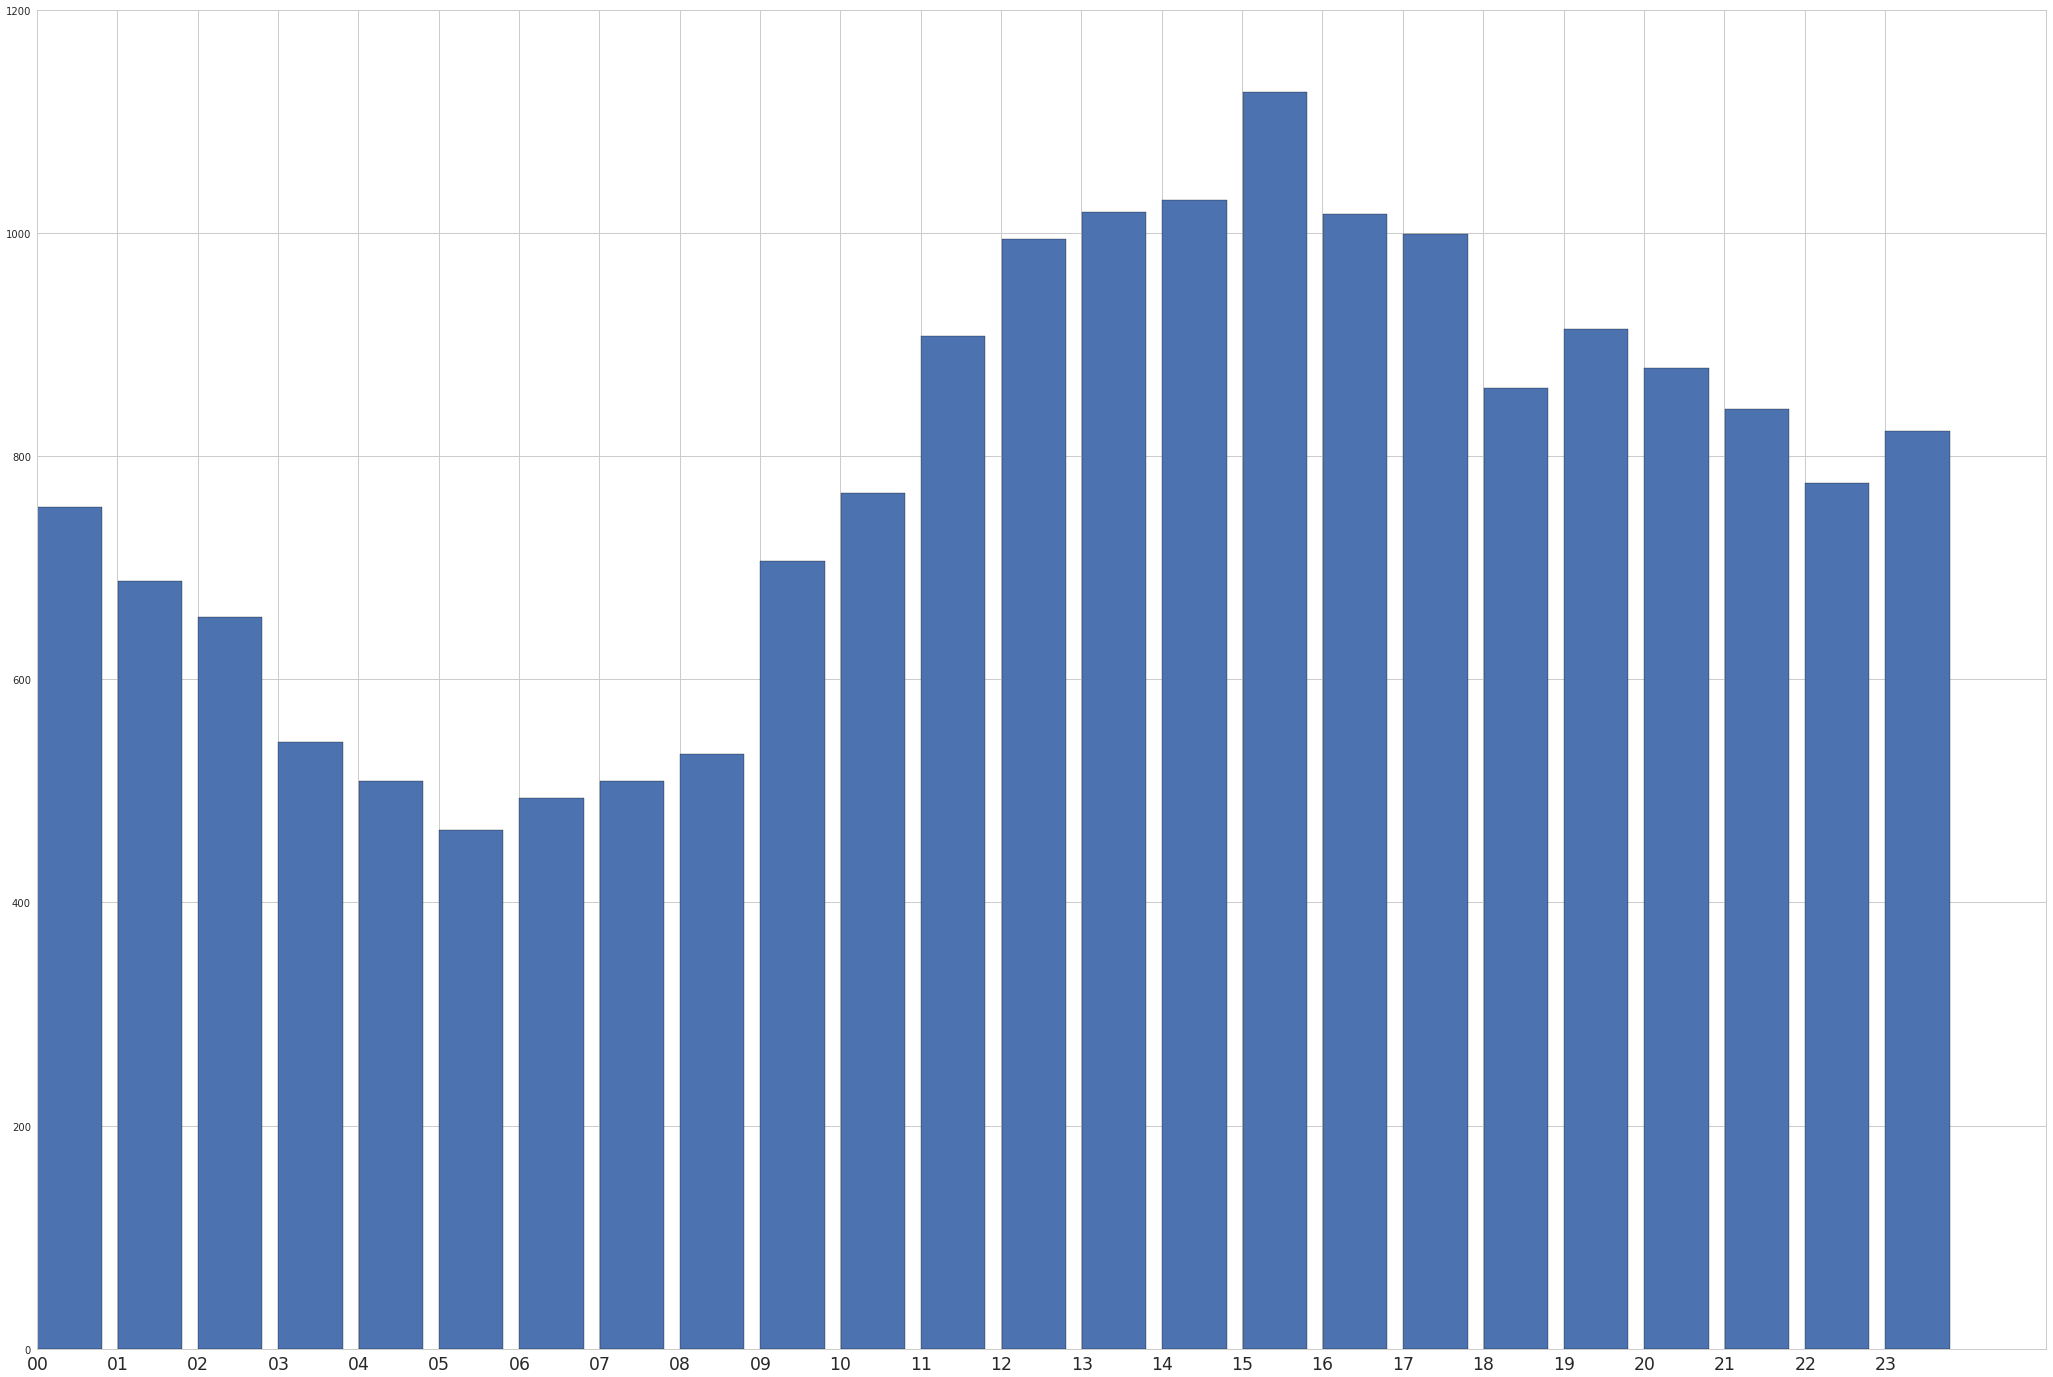

In [236]:
#time they post in one month
import datetime

time_creat = df_til['created']
time=[]
for i in range(len(time_creat)):
    time.append(datetime.datetime.fromtimestamp(time_creat[i]).strftime('%H'))
time_cnt = Counter(time).most_common()
sorted_by_second = sorted(time_cnt, key=lambda tup: tup[0])
print(sorted_by_second)

#bar chart of date
xlabel = []
post_times = []
for i in range(len(sorted_by_second)):
    xlabel.append(sorted_by_second[i][0])
    post_times.append(sorted_by_second[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(post_times)), post_times)
plt.xticks(range(len(post_times)),xlabel, size ='xx-large',horizontalalignment='center')
#plt.yscale('log')
plt.show()

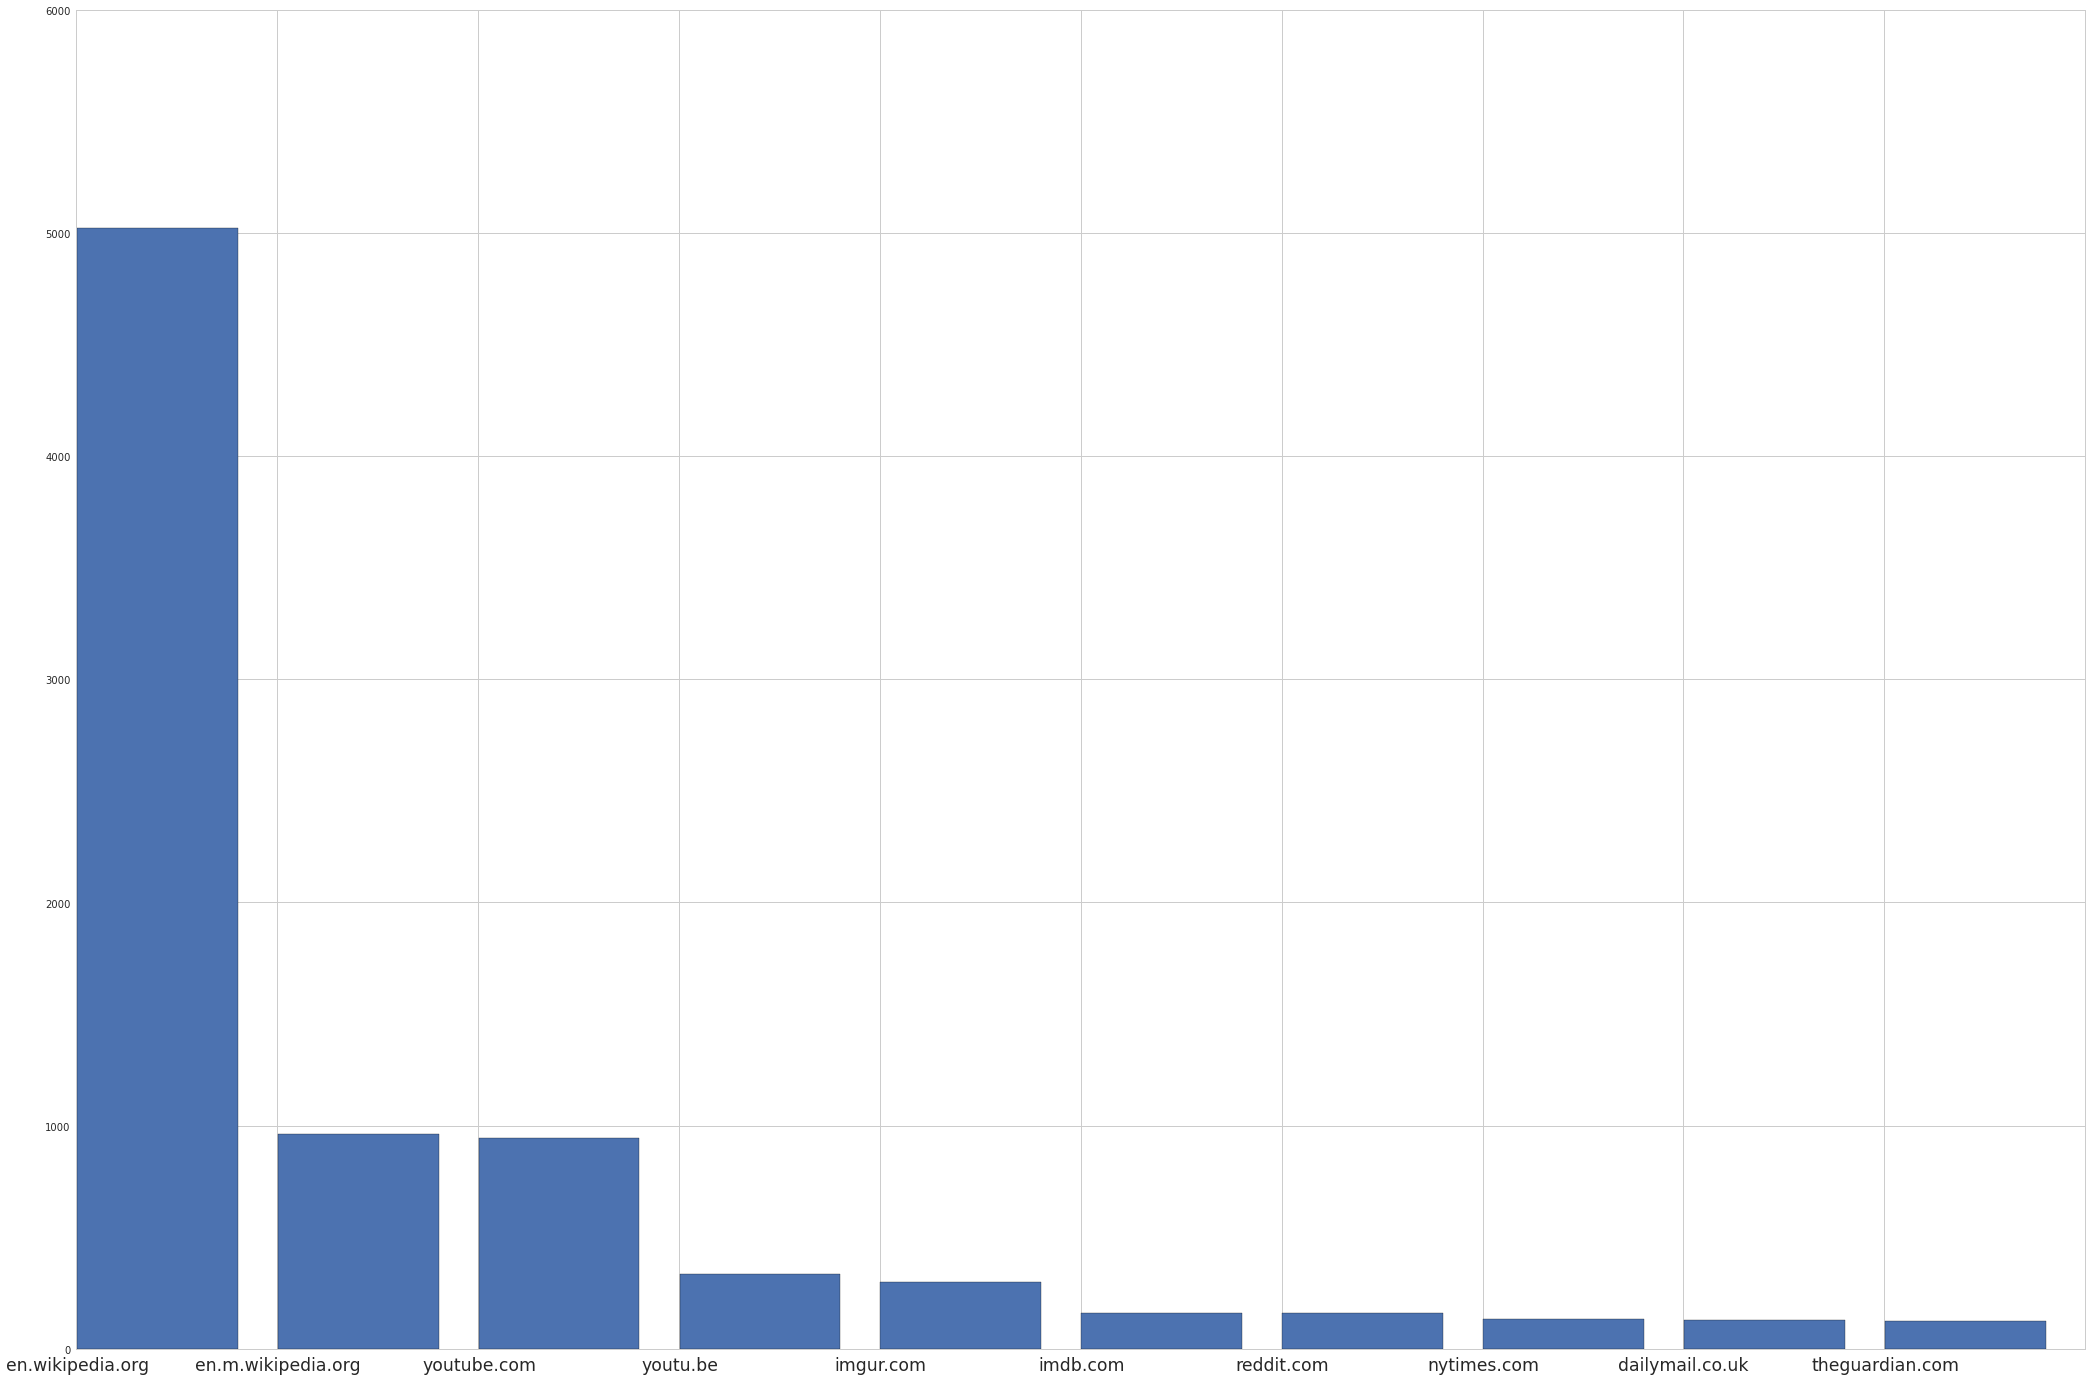

In [237]:
# website using domain before log transformation
domain = df_til['domain']
counter_domain = Counter(domain)
domain_10 = counter_domain.most_common(10)

xlabel = []
freq = []
for i in range(len(domain_10)):
    xlabel.append(domain_10[i][0])
    freq.append(domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(freq)), freq)
plt.xticks(range(len(freq)),xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

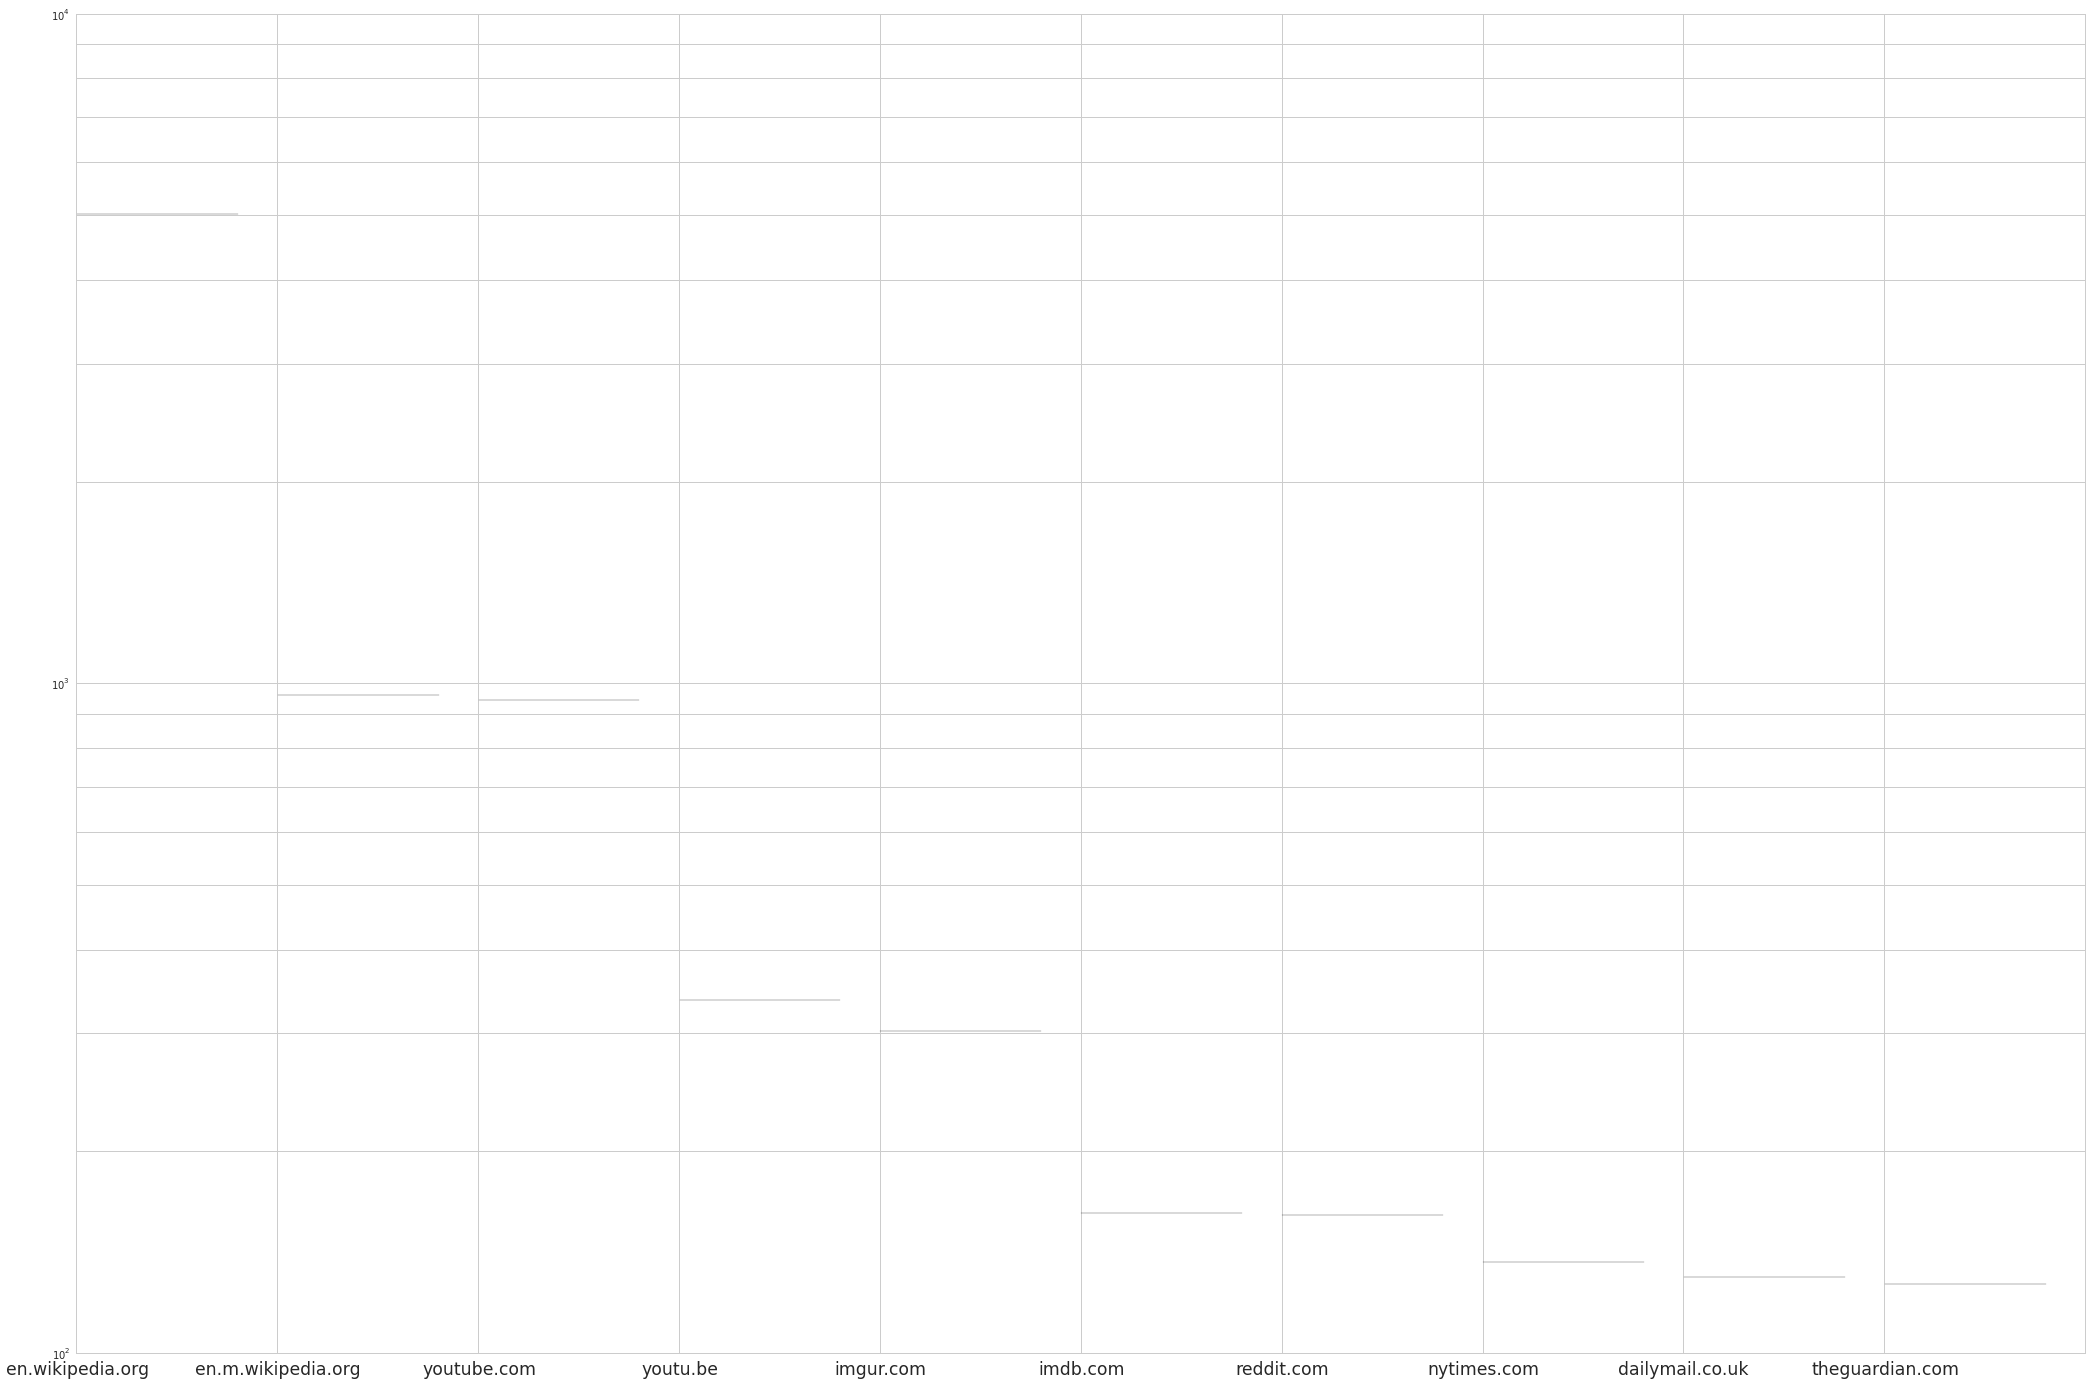

In [238]:
# website using domain after log transformation
domain = df_til['domain']
counter_domain = Counter(domain)
domain_10 = counter_domain.most_common(10)

xlabel = []
freq = []
for i in range(len(domain_10)):
    xlabel.append(domain_10[i][0])
    freq.append(domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(freq)), freq)
plt.xticks(range(len(freq)),xlabel, size ='xx-large')
plt.yscale('log')
plt.show()

In [239]:
# count for author
print(Counter(df_til['author']).most_common(5))

[(u'[deleted]', 4668), (u'veryawesomeguy', 46), (u'anubhavrana567', 46), (u'hanky1979', 34), (u'myworkbook', 33)]


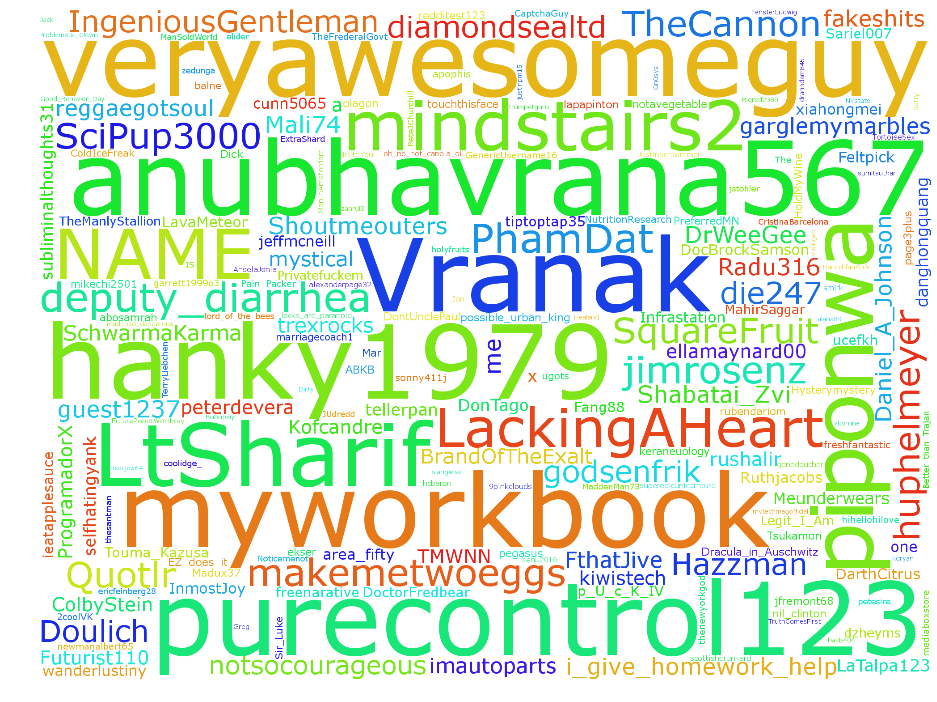

In [240]:
#word cloud for author
plt.figure(figsize=(36,12))
stopword = ['deleted']
text = ""
for i in range(len(df_til['author'])):
    text = text + str(df_til['author'][i]) + " "
wordcloud = WordCloud(font_path='Verdana.ttf',
                          stopwords=stopword,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Plots for pics**

In [241]:

#Find the most common 100 words in the title, except stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import operator
#counter = Counter(df_til['title'])
pic_title_notflat = [a.split() for a in df_pic['title']]
pic_counter = Counter(chain.from_iterable(pic_title_notflat))
pic_bar_word = pic_counter.most_common(80)
pic_cloud_word = pic_counter.most_common(300)
stopwords = stopwords.words('english')
stopwords=[x.encode('ISO-8859-1').upper() for x in stopwords]
stopwords+=["TIL","TIL:","ONE","CALL","LIKE","-","ALSO","ACTUALLY","CAN","COULD","WOULD","&amp;","SOMEONE","DON'T"]
print(stopwords)


pic_bar_base_word= removeTenses(pic_bar_word)
pic_bar_freq_word = removestopwords(pic_bar_base_word,stopwords)
pic_cloud_base_word= removeTenses(pic_cloud_word)
pic_cloud_freq_word = removestopwords(pic_cloud_base_word,stopwords)
pic_sorted_bar_freq = sorted(pic_bar_freq_word.items(), key=operator.itemgetter(1),reverse=True)
print(pic_sorted_bar_freq)
#low_stop_word=[]
#for stpwr in stop_words:
#    low_stop_word.append(stpwr.lower().encode('ISO-8859-1'))
#stop_words+=low_stop_word

['I', 'ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', 'YOUR', 'YOURS', 'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', 'HER', 'HERS', 'HERSELF', 'IT', 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH', 'WHO', 'WHOM', 'THIS', 'THAT', 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'A', 'AN', 'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER', 'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'S', 'T', 'CAN', 'WILL', 'JUST', 'DON', 'SHOULD', 'NO

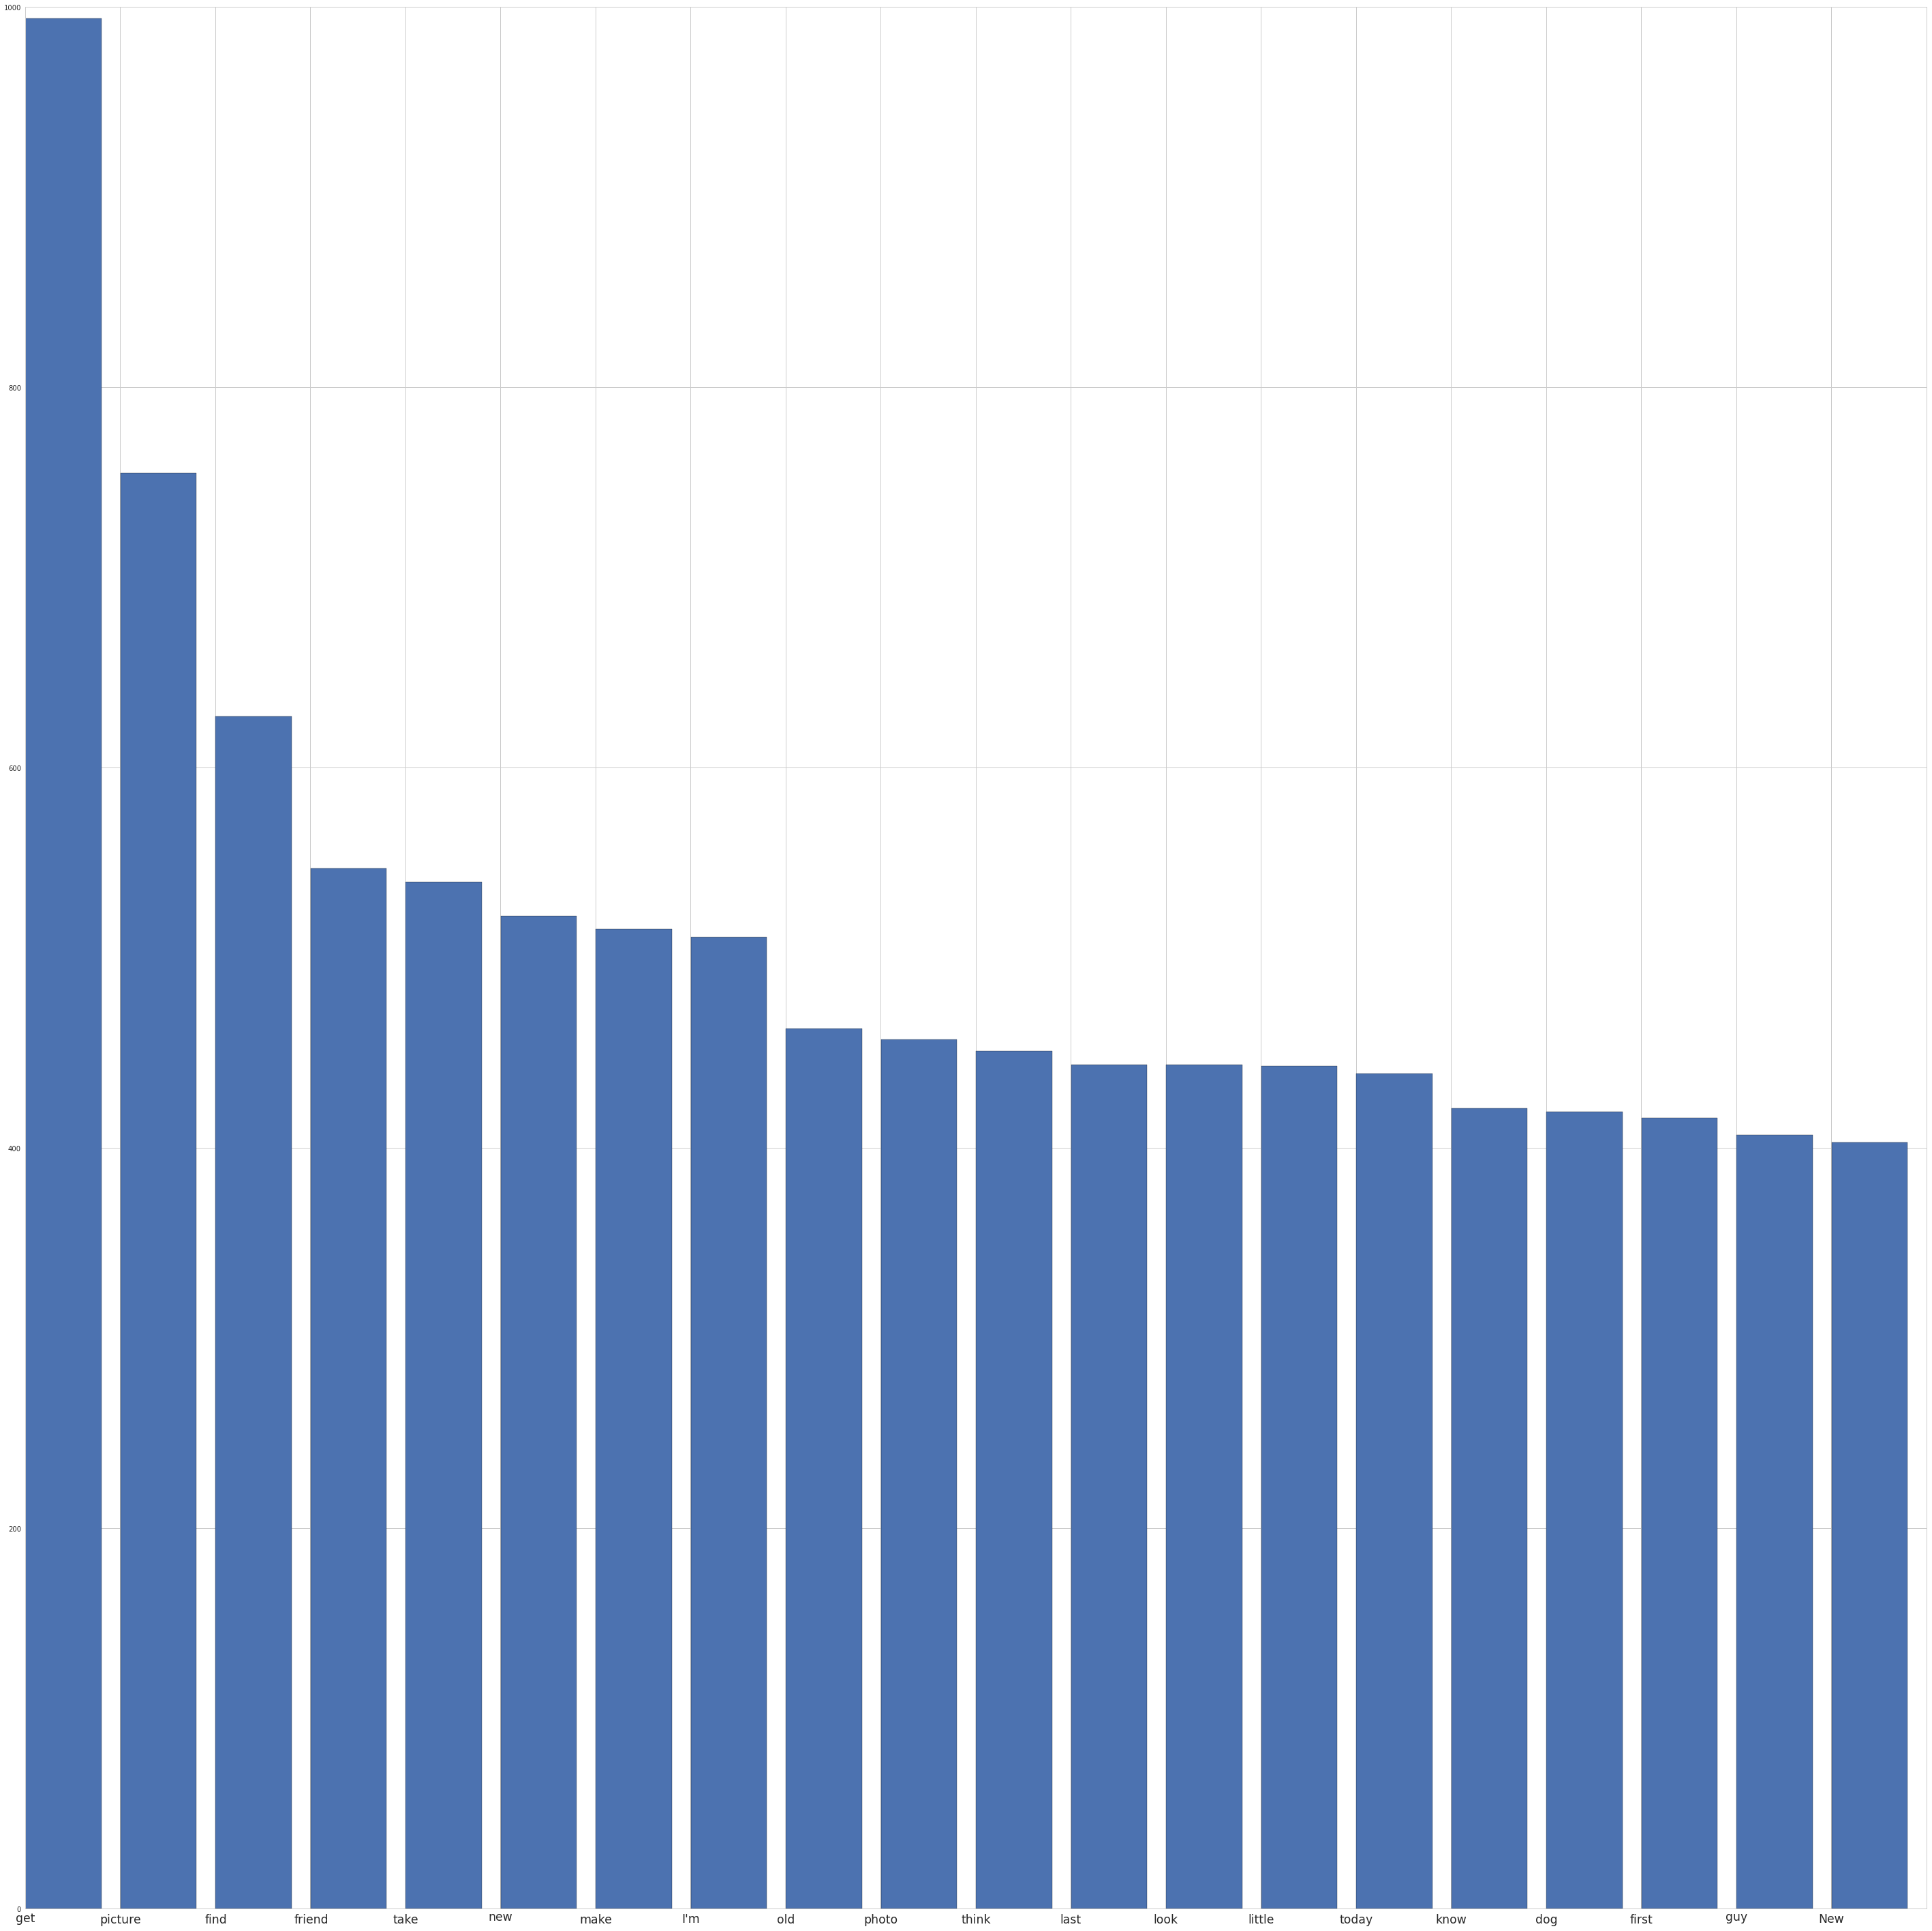

In [242]:
pic_xlabel = []
pic_freq = []
for i in range(len(pic_sorted_bar_freq)):
    pic_xlabel.append(pic_sorted_bar_freq[i][0])
    pic_freq.append(pic_sorted_bar_freq[i][1])

plt.figure(figsize=(50,50))
plt.bar(range(len(pic_freq)), pic_freq)
plt.xticks(range(len(pic_freq)),pic_xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

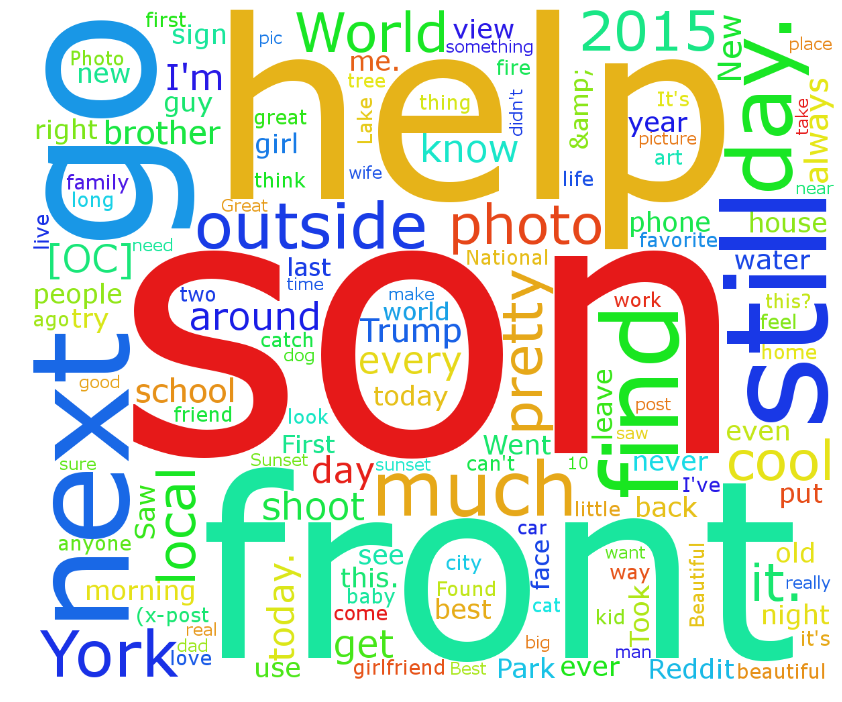

In [243]:
wordcloud = WordCloud(font_path='Verdana.ttf',
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate_from_frequencies([( k,v) for k, v in pic_cloud_freq_word.iteritems()])

plt.figure(figsize=(36,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

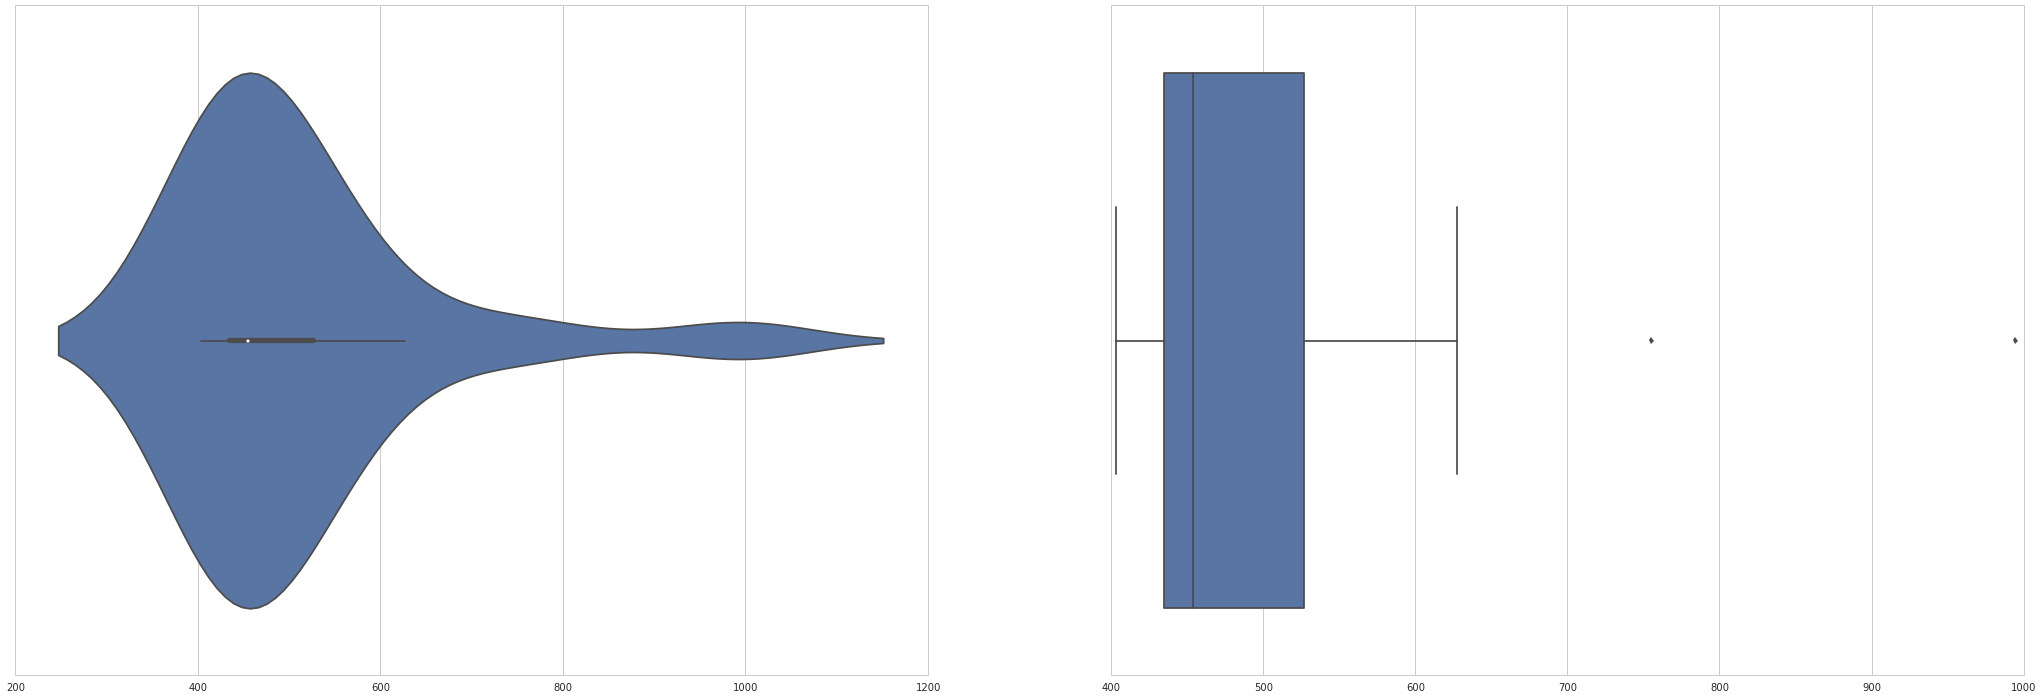

In [244]:
#violin plots for the most common 100 words' frequency in title 
freq = []
plt.figure(figsize=(36,12))

for i in range(len(pic_sorted_bar_freq)):
    freq.append(pic_sorted_bar_freq[i][1])
plt.subplot(1,2,1)    
sns.set_style("whitegrid")
ax = sns.violinplot(x=freq)

plt.subplot(1,2,2)
ax = sns.boxplot(freq)

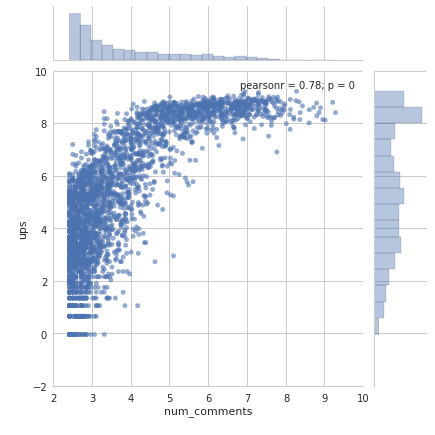

In [245]:
#1D histogram betwenn comments > 10 and ups >0 
pic_cmt = df_pic['num_comments'] > 10
pic_up = df_pic['ups'] > 0
pic_subset = df_pic[pic_cmt & pic_up]
sns.jointplot(np.log(pic_subset['num_comments']), np.log(pic_subset['ups']),alpha=0.6)

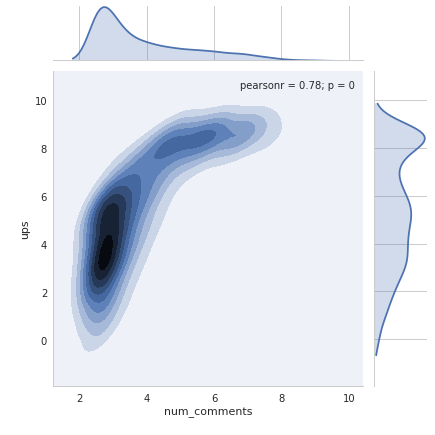

In [246]:
#KDE plot betwenn comments > 10 and ups >0 
sns.jointplot(np.log(pic_subset['num_comments']), np.log(pic_subset['ups']), kind='kde')

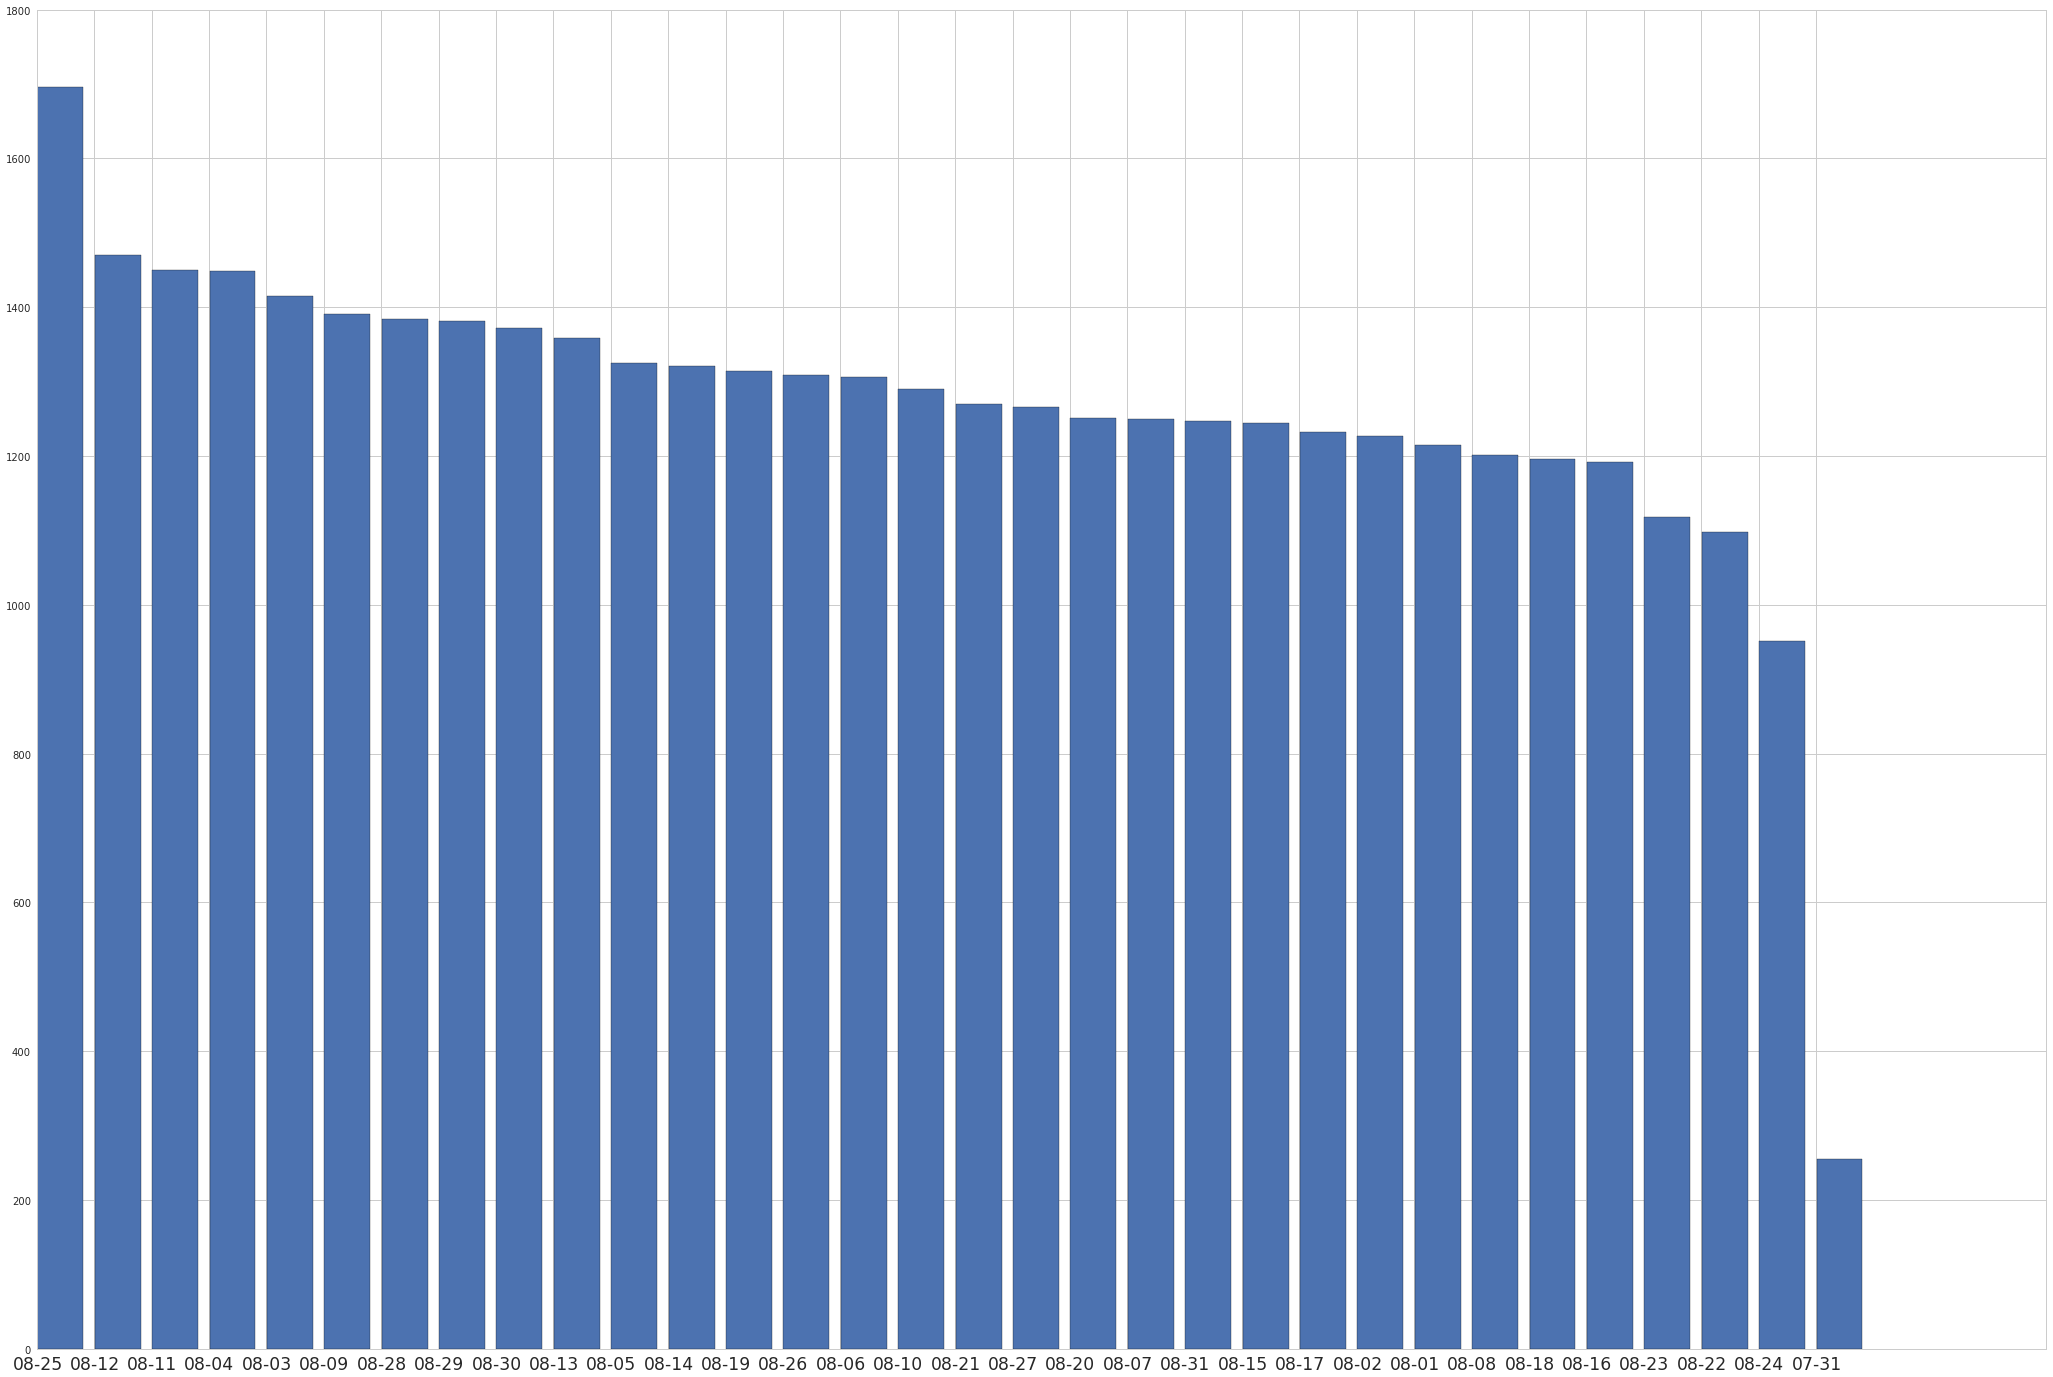

In [247]:
#date they post
import datetime

pic_time_creat = df_pic['created']
pic_time=[]
for i in range(len(pic_time_creat)):
    pic_time.append(datetime.datetime.fromtimestamp(pic_time_creat[i]).strftime('%m-%d'))
pic_time_cnt = Counter(pic_time).most_common()
#print(time_cnt)

#bar chart of date
pic_xlabel = []
pic_post_times = []
for i in range(len(pic_time_cnt)):
    pic_xlabel.append(pic_time_cnt[i][0])
    pic_post_times.append(pic_time_cnt[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(pic_post_times)), pic_post_times)
plt.xticks(range(len(pic_post_times)),pic_xlabel, size ='xx-large',horizontalalignment='center')
##plt.yscale('log')
plt.show()

[('00', 1769), ('01', 1519), ('02', 1307), ('03', 1099), ('04', 965), ('05', 800), ('06', 823), ('07', 887), ('08', 1172), ('09', 1405), ('10', 1680), ('11', 1877), ('12', 1999), ('13', 2079), ('14', 2158), ('15', 2224), ('16', 2257), ('17', 2201), ('18', 2011), ('19', 2146), ('20', 2086), ('21', 2023), ('22', 2060), ('23', 1926)]


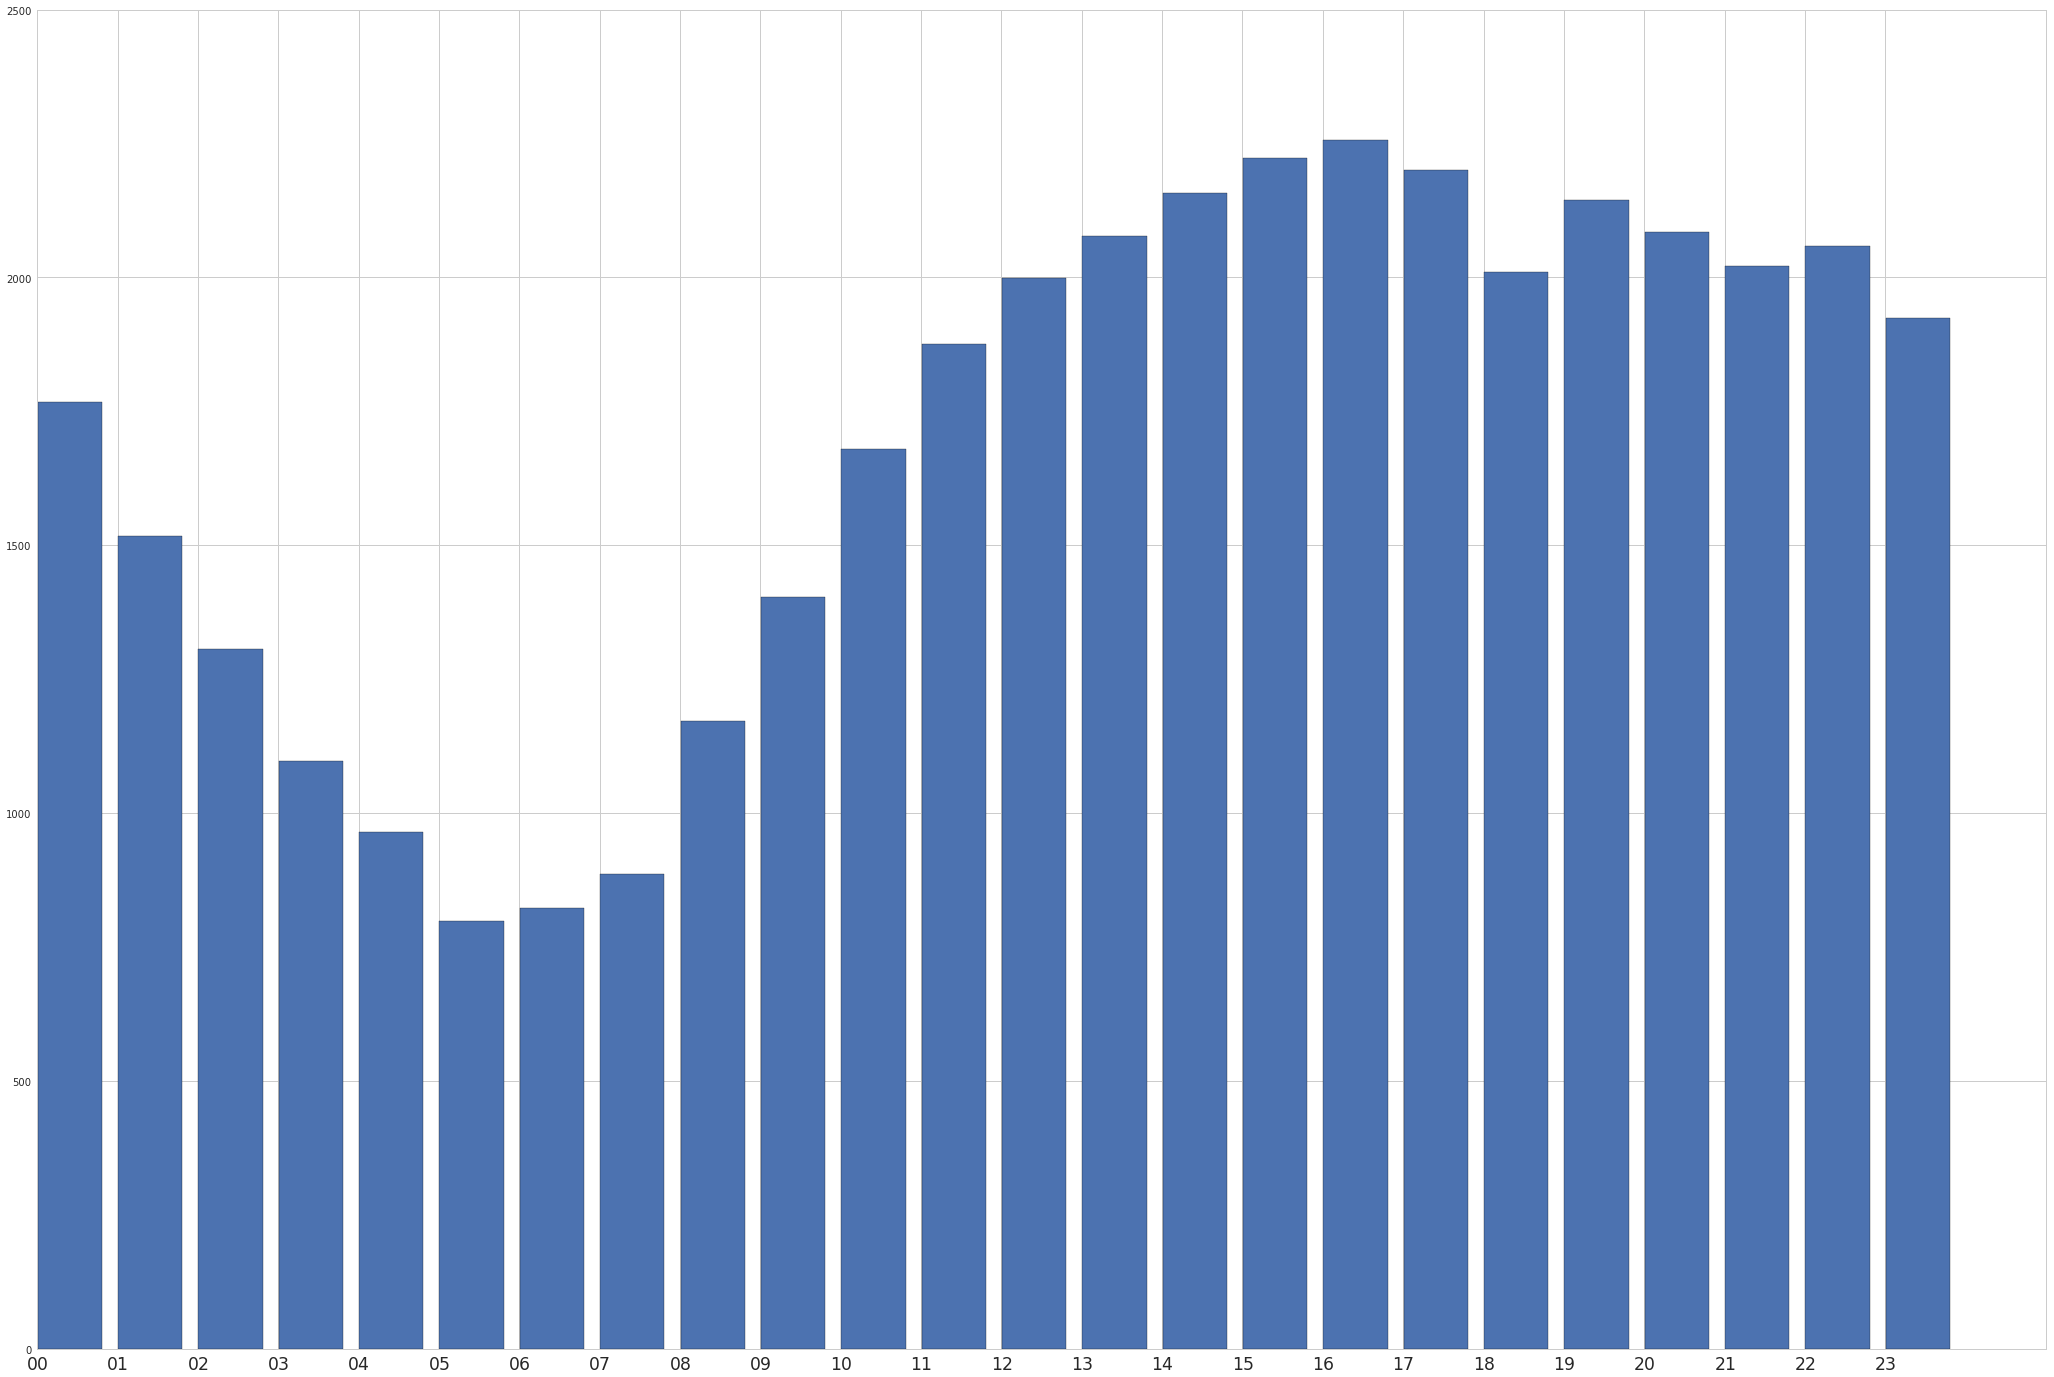

In [248]:
#time they post in one month
import datetime

pic_time_creat = df_pic['created']
pic_time=[]
for i in range(len(pic_time_creat)):
    pic_time.append(datetime.datetime.fromtimestamp(pic_time_creat[i]).strftime('%H'))
pic_time_cnt = Counter(pic_time).most_common()
pic_sorted_by_second = sorted(pic_time_cnt, key=lambda tup: tup[0])
print(pic_sorted_by_second)

#bar chart of date
pic_xlabel = []
pic_post_times = []
for i in range(len(pic_sorted_by_second)):
    pic_xlabel.append(pic_sorted_by_second[i][0])
    pic_post_times.append(pic_sorted_by_second[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(pic_post_times)), pic_post_times)
plt.xticks(range(len(pic_post_times)),pic_xlabel, size ='xx-large',horizontalalignment='center')
#plt.yscale('log')
plt.show()

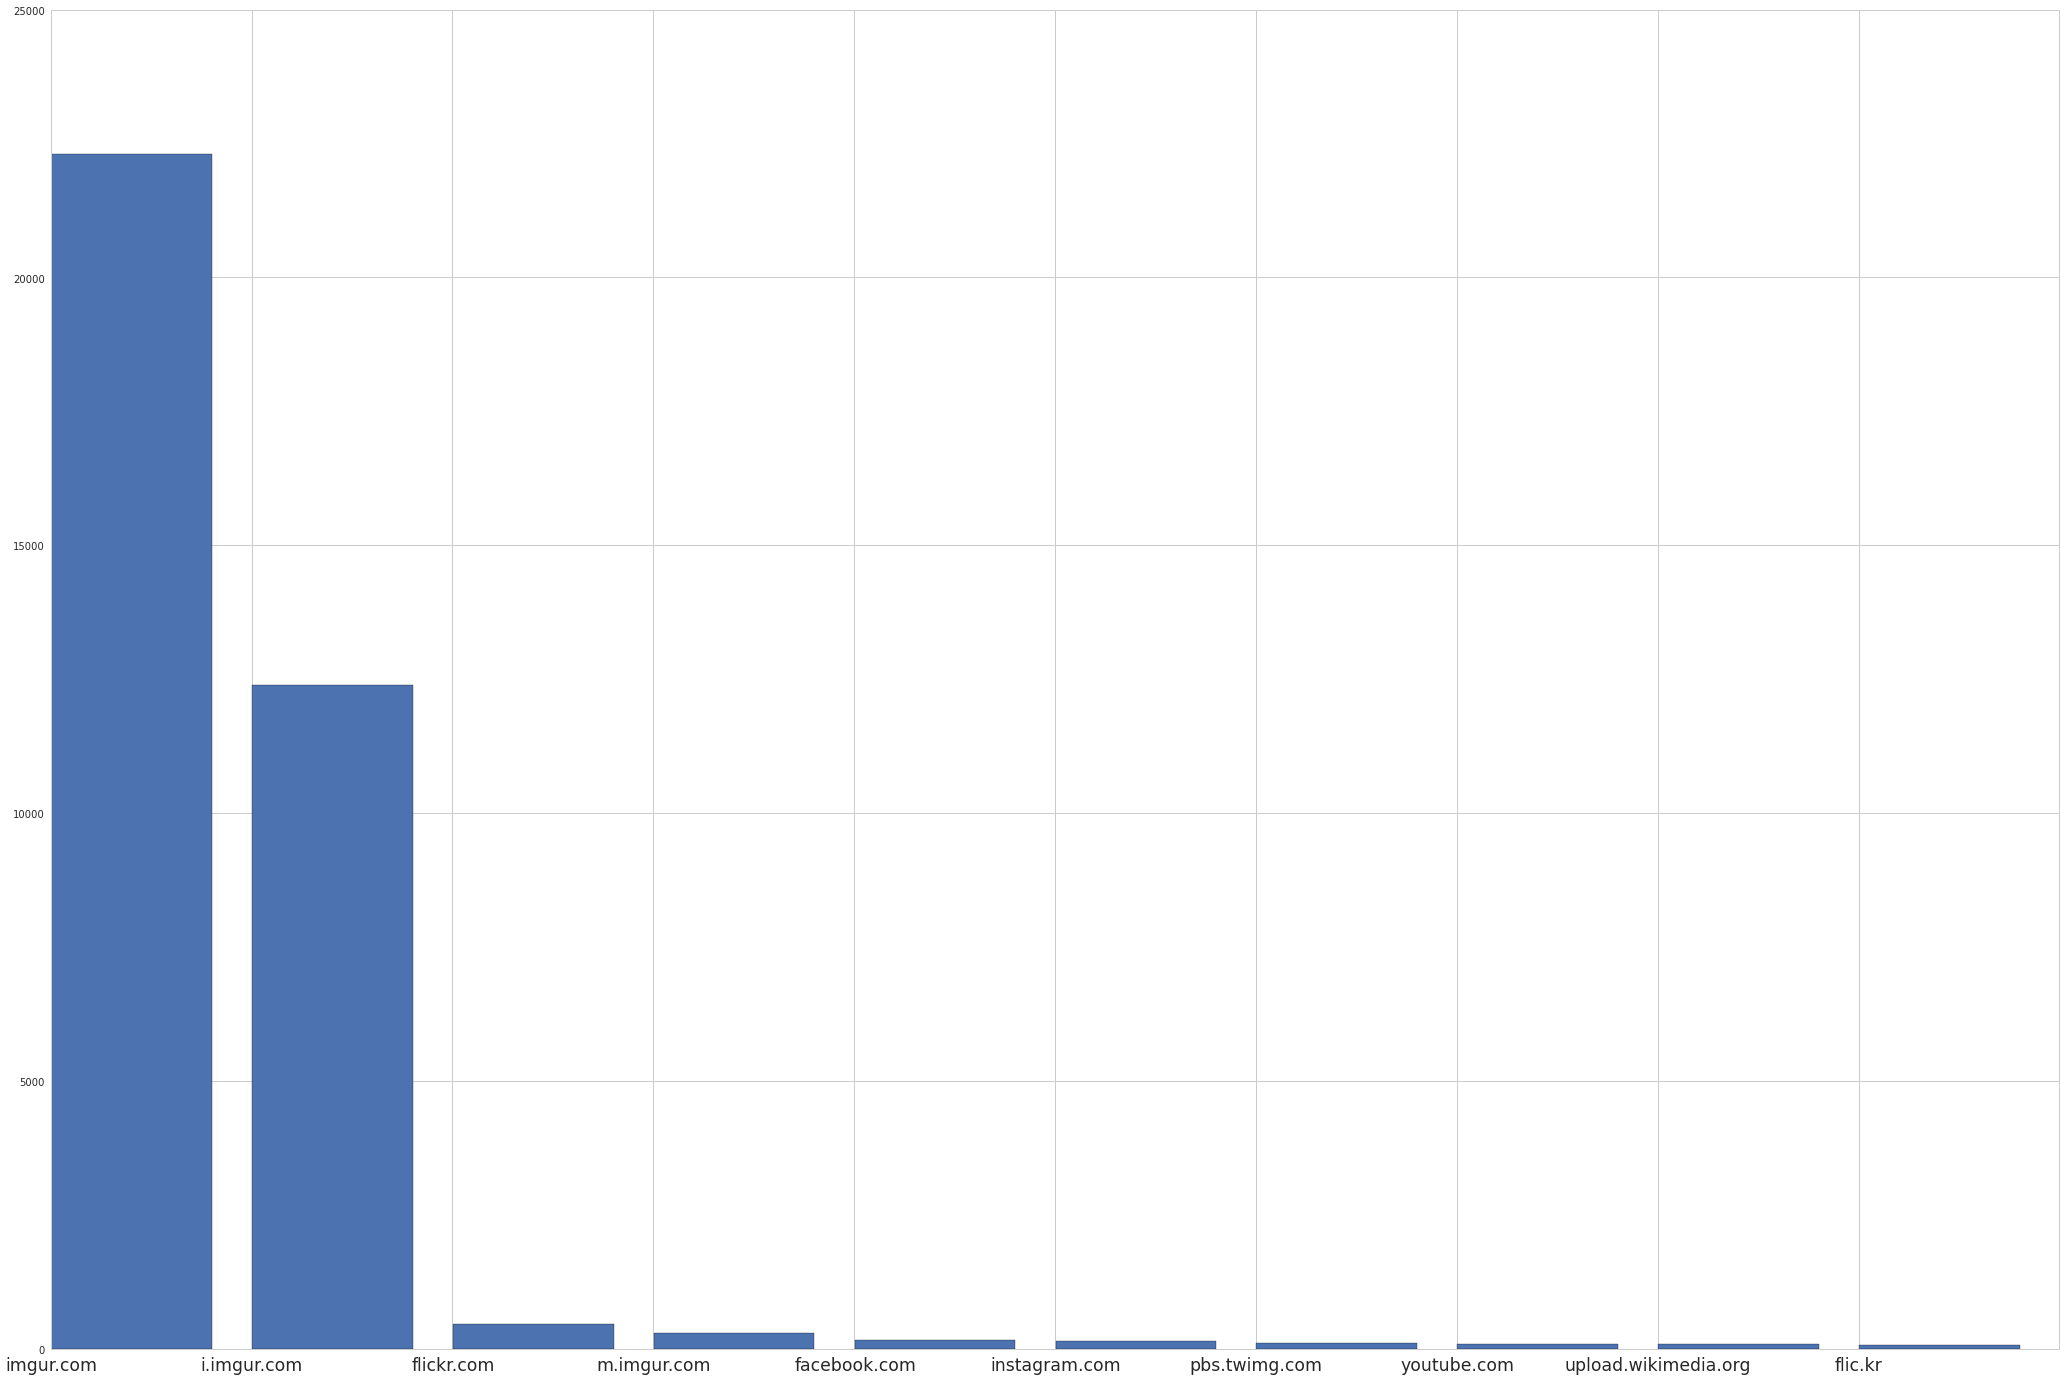

In [249]:
# website using domain before log transformation
pic_domain = df_pic['domain']
pic_counter_domain = Counter(pic_domain)
pic_domain_10 = pic_counter_domain.most_common(10)

pic_xlabel = []
pic_freq = []
for i in range(len(pic_domain_10)):
    pic_xlabel.append(pic_domain_10[i][0])
    pic_freq.append(pic_domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(pic_freq)), pic_freq)
plt.xticks(range(len(pic_freq)),pic_xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

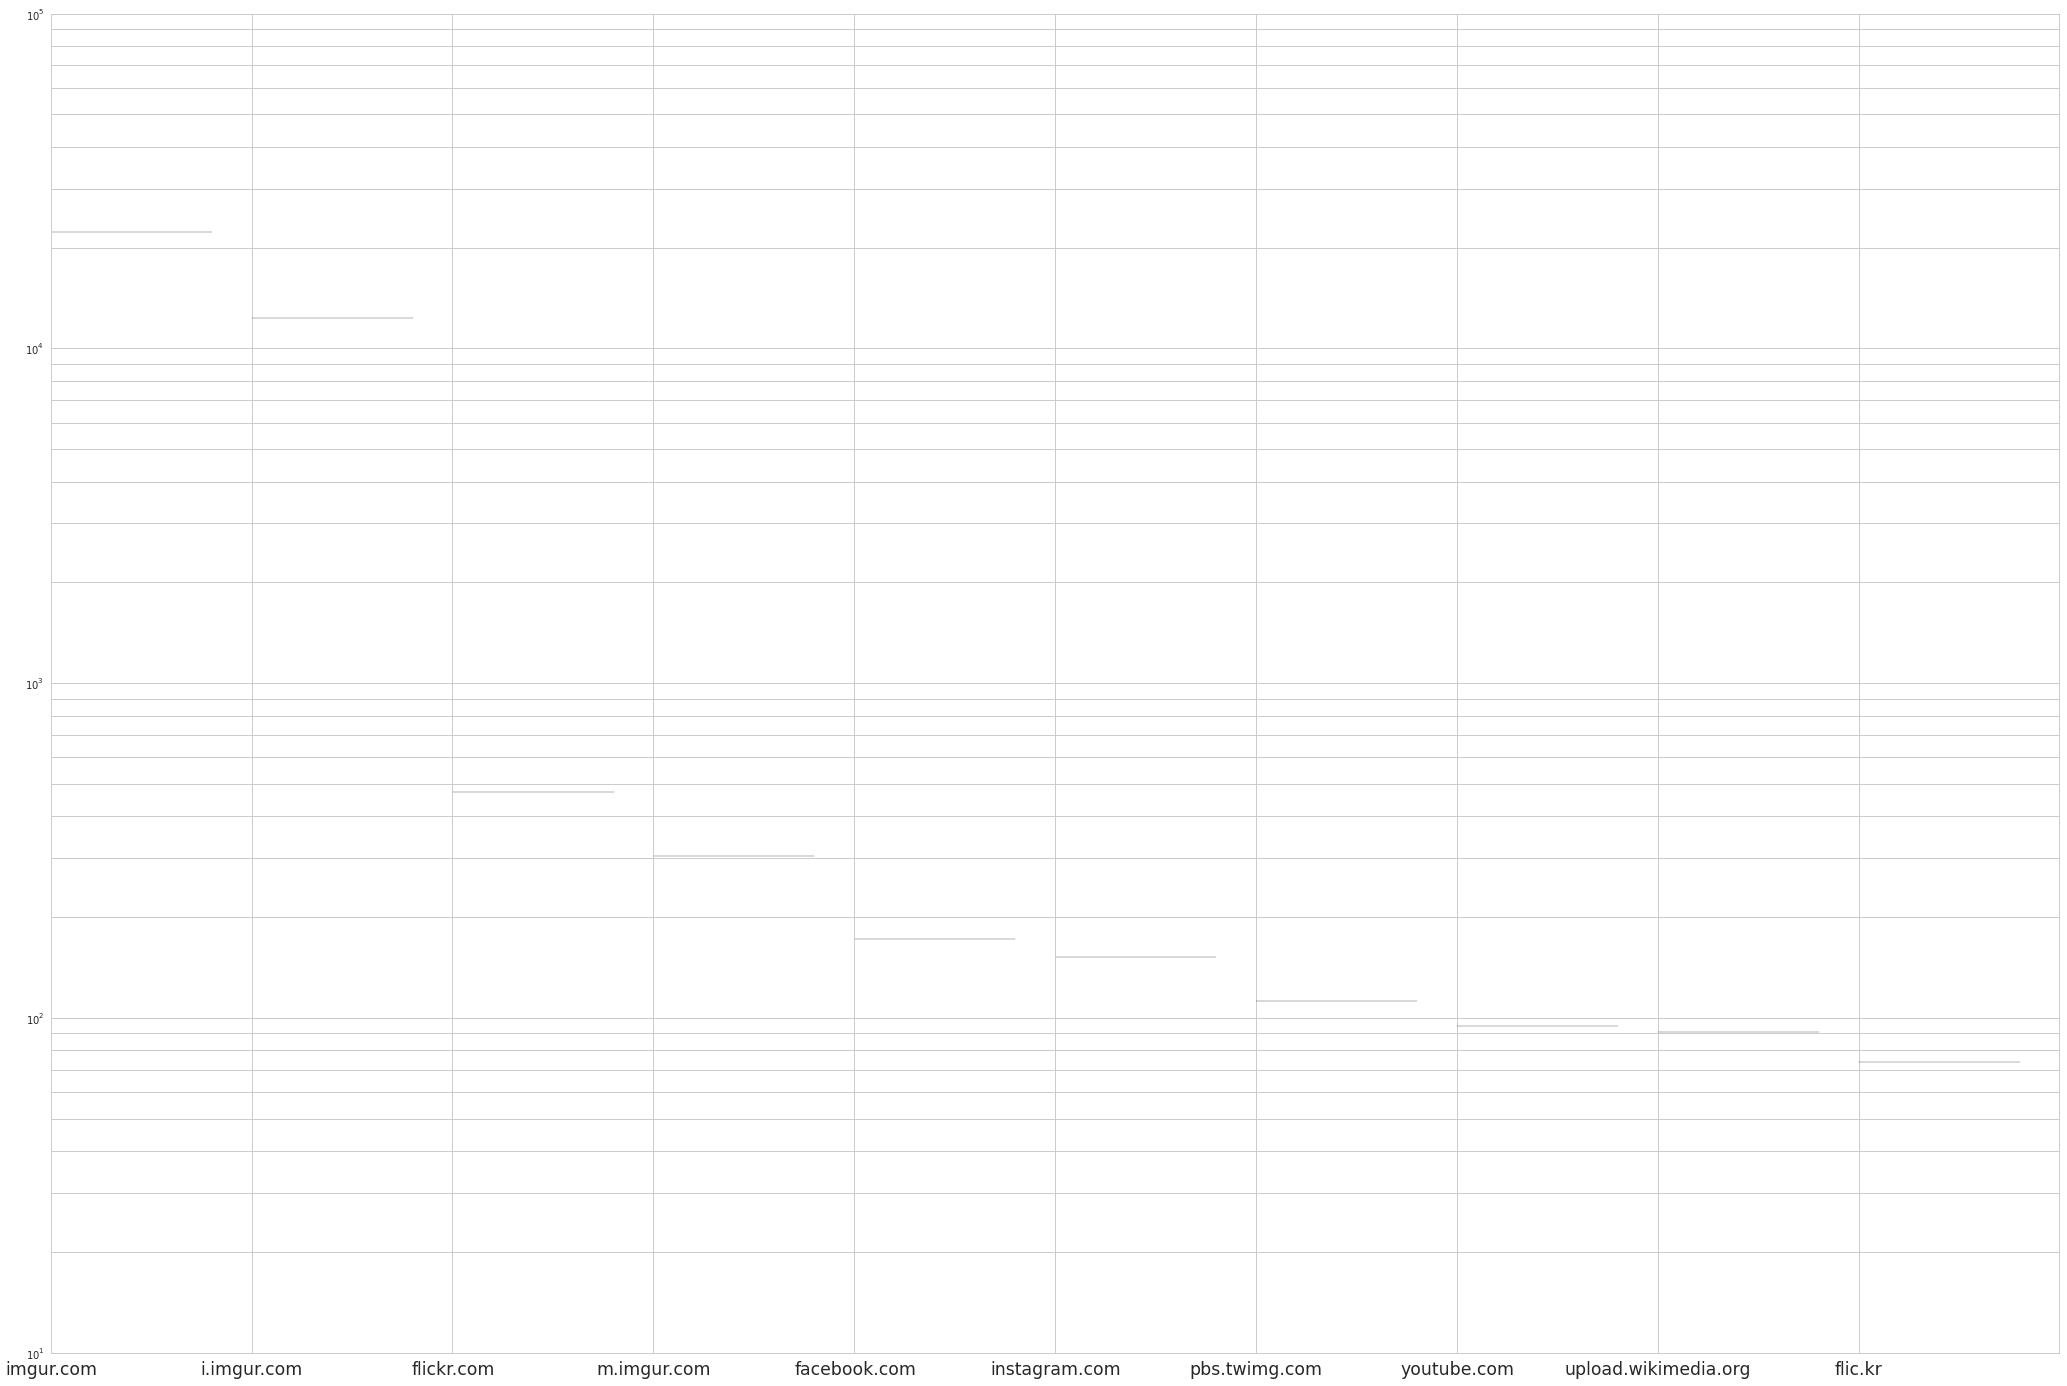

In [250]:
# website using domain before log transformation
pic_domain = df_pic['domain']
pic_counter_domain = Counter(pic_domain)
pic_domain_10 = pic_counter_domain.most_common(10)

pic_xlabel = []
pic_freq = []
for i in range(len(pic_domain_10)):
    pic_xlabel.append(pic_domain_10[i][0])
    pic_freq.append(pic_domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(pic_freq)), pic_freq)
plt.xticks(range(len(pic_freq)),pic_xlabel, size ='xx-large')
plt.yscale('log')
plt.show()

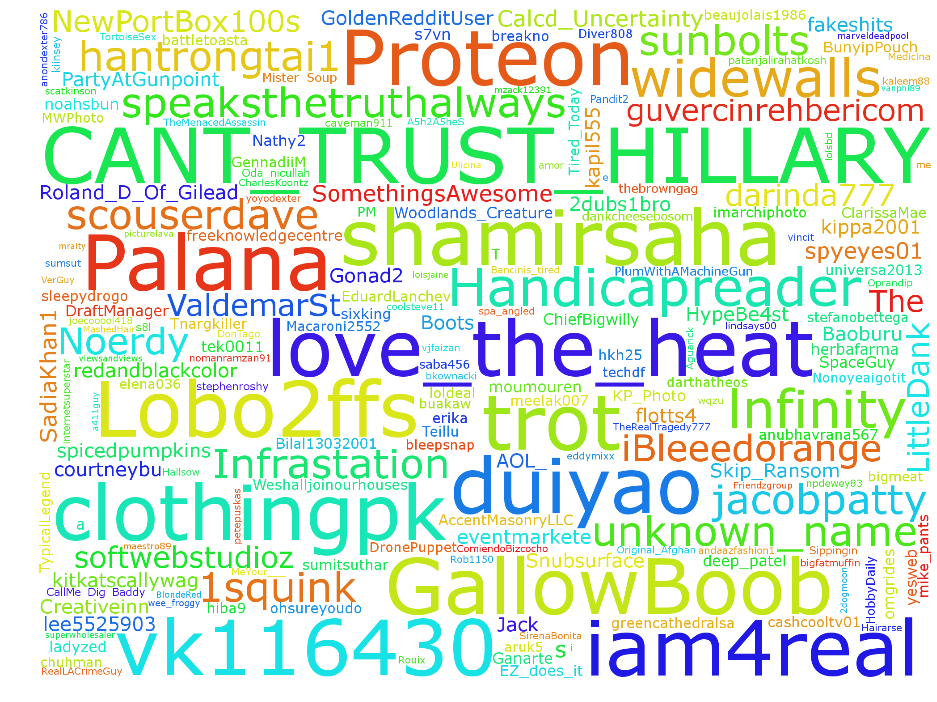

In [251]:
#word cloud for author
plt.figure(figsize=(36,12))
pic_stopword = ['deleted']
pic_text = ""
for i in range(len(df_pic['author'])):
    pic_text = pic_text + str(df_pic['author'][i]) + " "
pic_wordcloud = WordCloud(font_path='Verdana.ttf',
                          stopwords=stopword,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(pic_text)

plt.imshow(pic_wordcloud)
plt.axis('off')
plt.show()

**Plots for funny**

In [252]:

#Find the most common 100 words in the title, except stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import operator
#counter = Counter(df_til['title'])
funny_title_notflat = [a.split() for a in df_fun['title']]
funny_counter = Counter(chain.from_iterable(funny_title_notflat))
funny_bar_word = funny_counter.most_common(100)
funny_cloud_word = funny_counter.most_common(300)
stopwords = stopwords.words('english')
stopwords=[x.encode('ISO-8859-1').upper() for x in stopwords]
stopwords+=["TIL","TIL:","ONE","CALL","LIKE","-","ALSO","ACTUALLY","CAN","COULD","WOULD","&amp;","SOMEONE","I'M","DON'T","I'LL","STILL"]
print(stopwords)

funny_bar_base_word= removeTenses(funny_bar_word)
funny_bar_freq_word = removestopwords(funny_bar_base_word,stopwords)
funny_cloud_base_word= removeTenses(funny_cloud_word)
funny_cloud_freq_word = removestopwords(funny_cloud_base_word,stopwords)
funny_sorted_bar_freq = sorted(funny_bar_freq_word.items(), key=operator.itemgetter(1),reverse=True)
print(funny_sorted_bar_freq)
#low_stop_word=[]
#for stpwr in stop_words:
#    low_stop_word.append(stpwr.lower().encode('ISO-8859-1'))
#stop_words+=low_stop_word

['I', 'ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', 'YOUR', 'YOURS', 'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', 'HER', 'HERS', 'HERSELF', 'IT', 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH', 'WHO', 'WHOM', 'THIS', 'THAT', 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'A', 'AN', 'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER', 'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'S', 'T', 'CAN', 'WILL', 'JUST', 'DON', 'SHOULD', 'NO

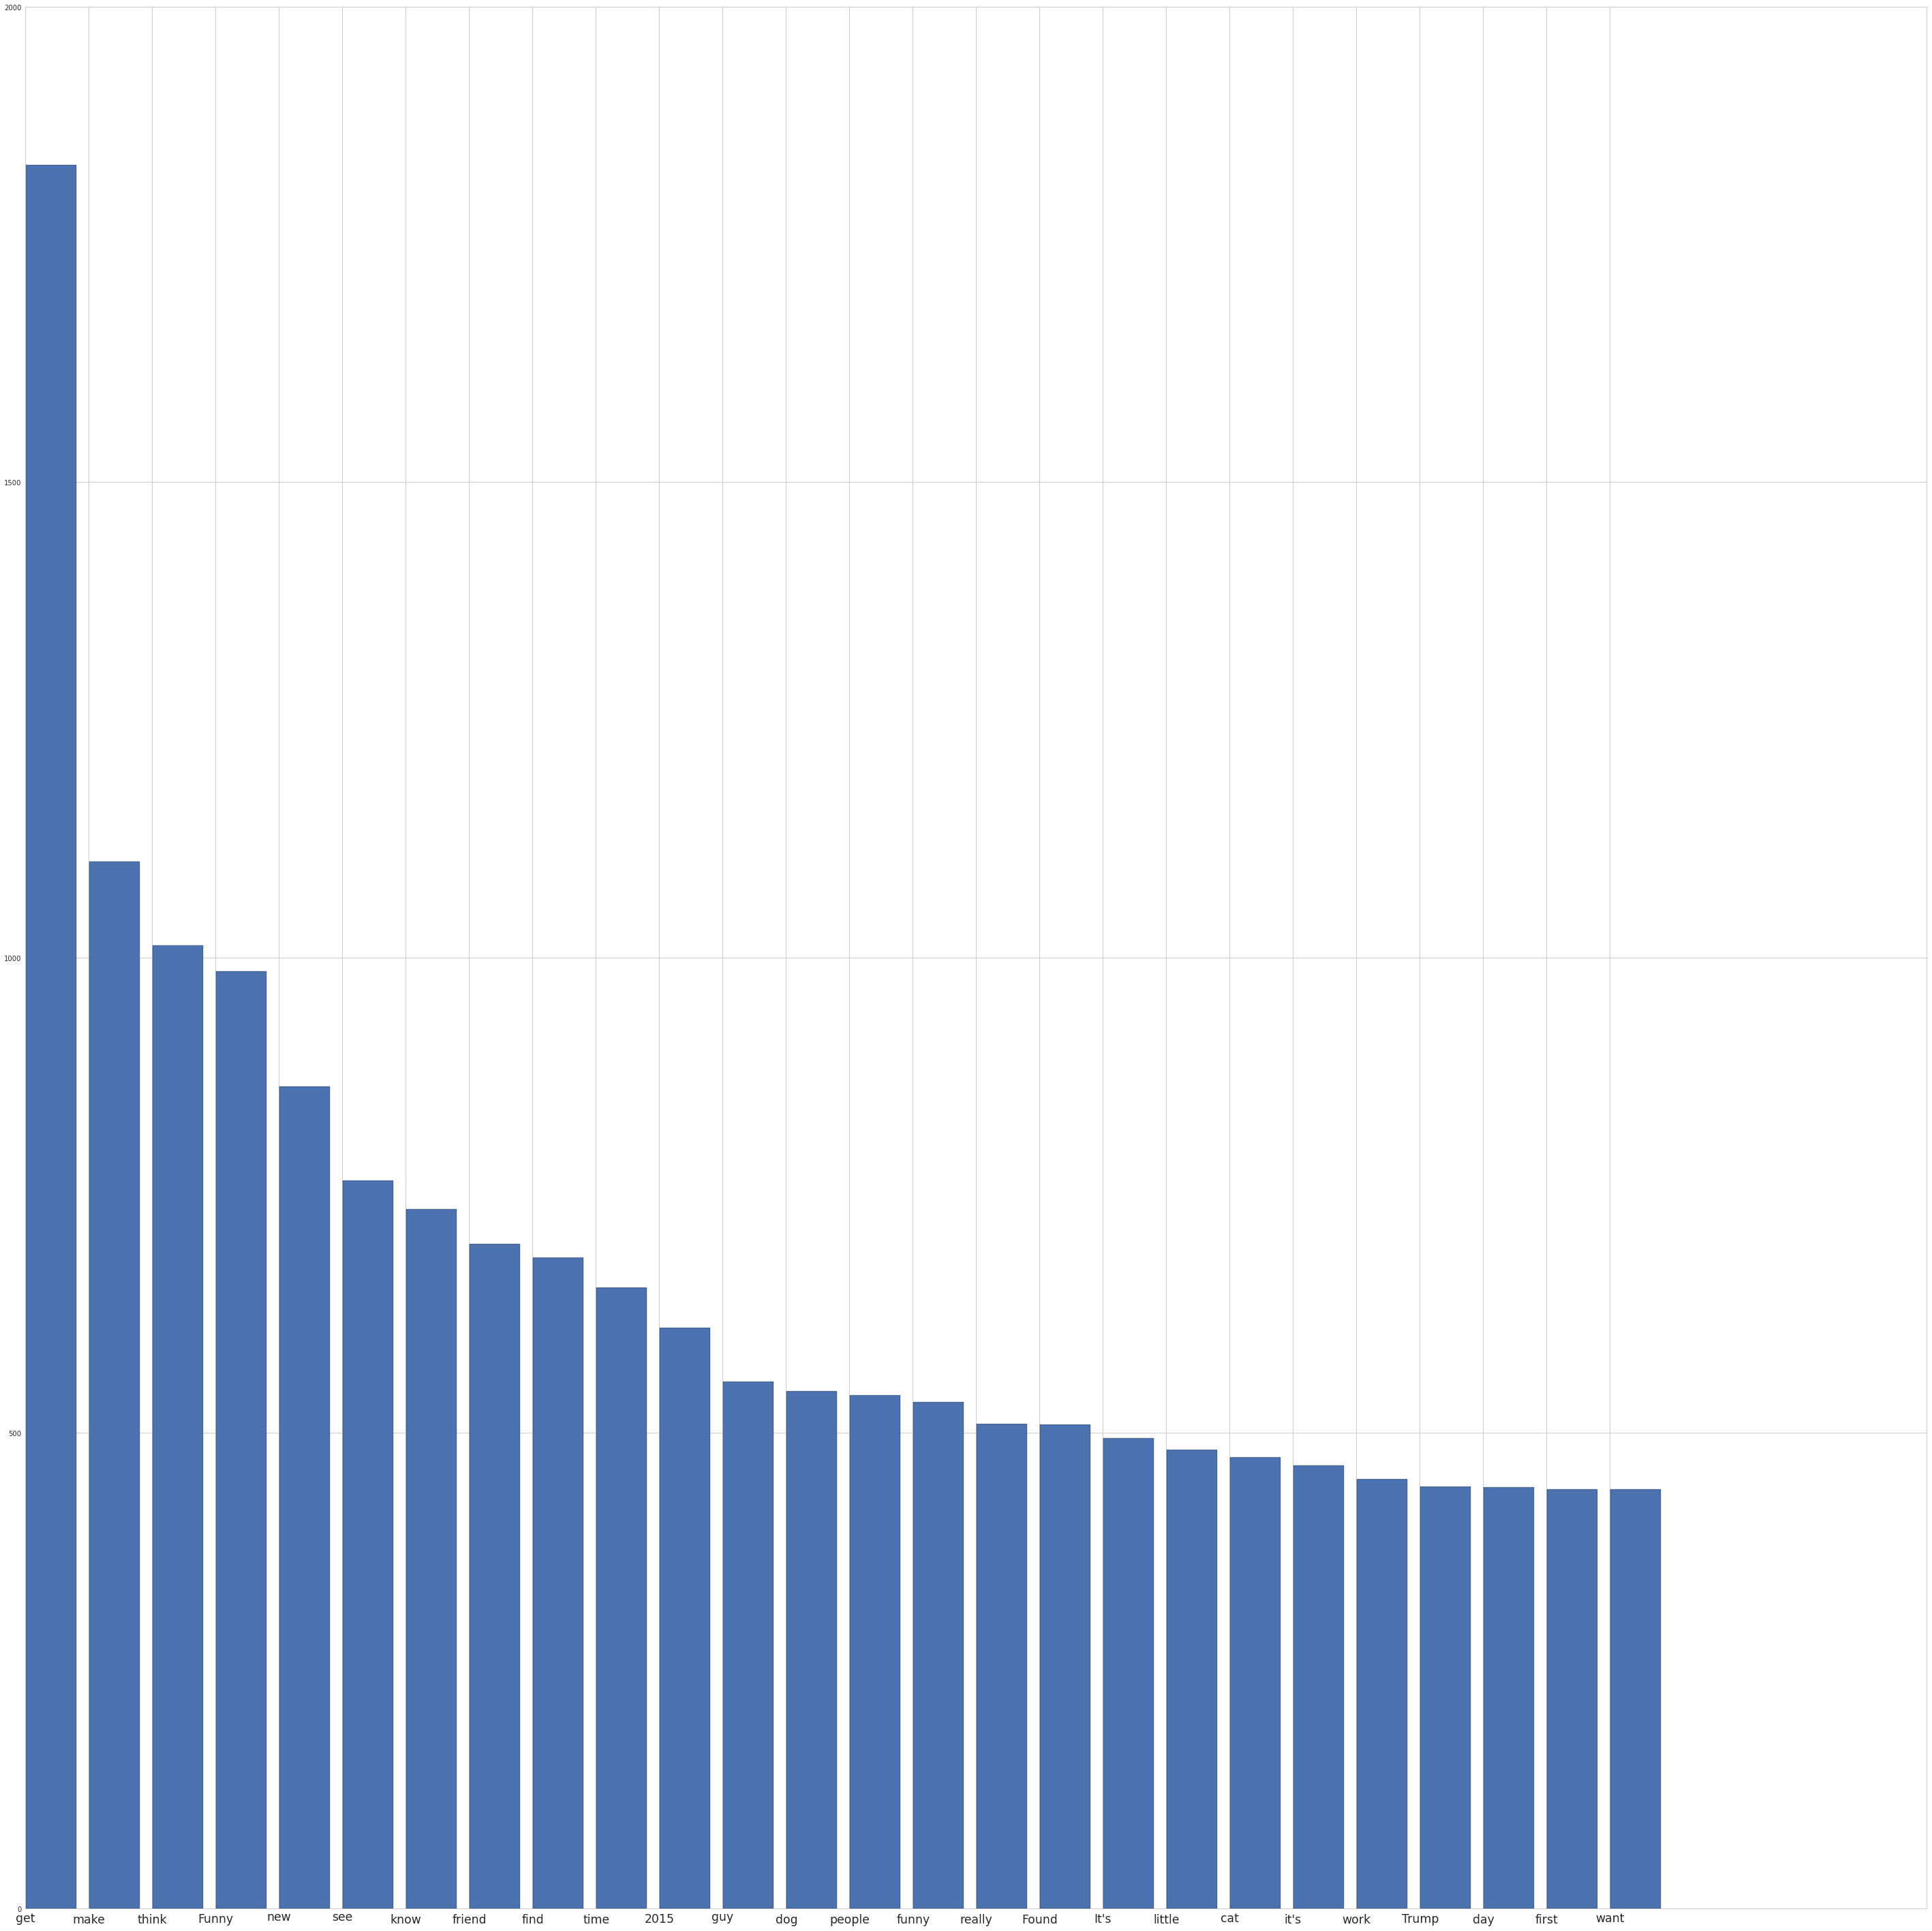

In [253]:
funny_xlabel = []
funny_freq = []
for i in range(len(funny_sorted_bar_freq)):
    funny_xlabel.append(funny_sorted_bar_freq[i][0])
    funny_freq.append(funny_sorted_bar_freq[i][1])

plt.figure(figsize=(50,50))
plt.bar(range(len(funny_freq)), funny_freq)
plt.xticks(range(len(funny_freq)),funny_xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

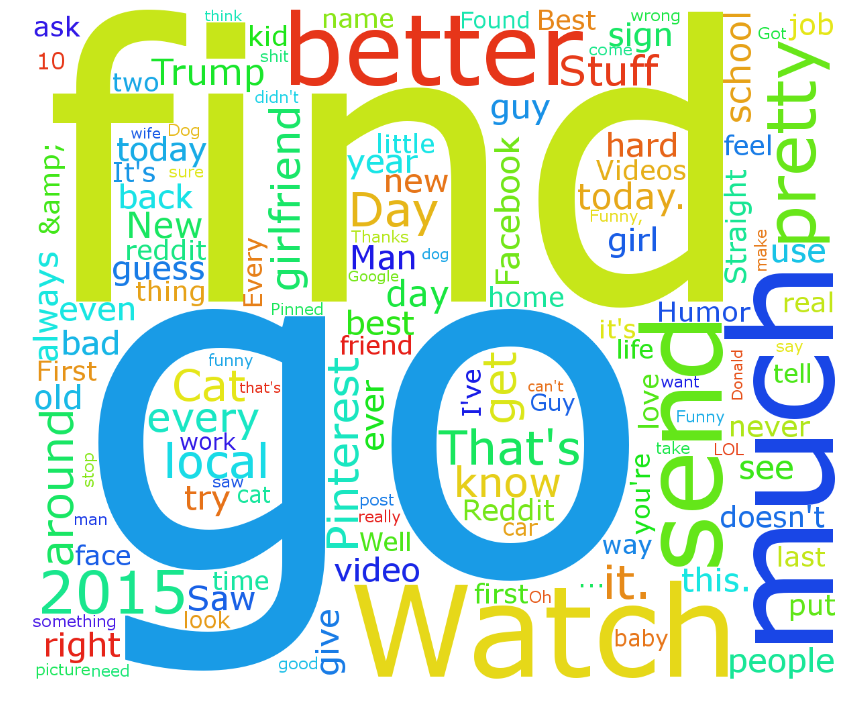

In [254]:
funny_wordcloud = WordCloud(font_path='Verdana.ttf',
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate_from_frequencies([( k,v) for k, v in funny_cloud_freq_word.iteritems()])

plt.figure(figsize=(36,12))
plt.imshow(funny_wordcloud)
plt.axis('off')
plt.show()

[('get', 1834), ('make', 1101), ('think', 1013), ('Funny', 986), ('new', 865), ('see', 766), ('know', 736), ('friend', 699), ('find', 685), ('time', 653), ('2015', 611), ('guy', 554), ('dog', 544), ('people', 540), ('funny', 533), ('really', 510), ('Found', 509), ("It's", 495), ('little', 483), ('cat', 475), ("it's", 466), ('work', 452), ('Trump', 444), ('day', 443), ('first', 441), ('want', 441)]


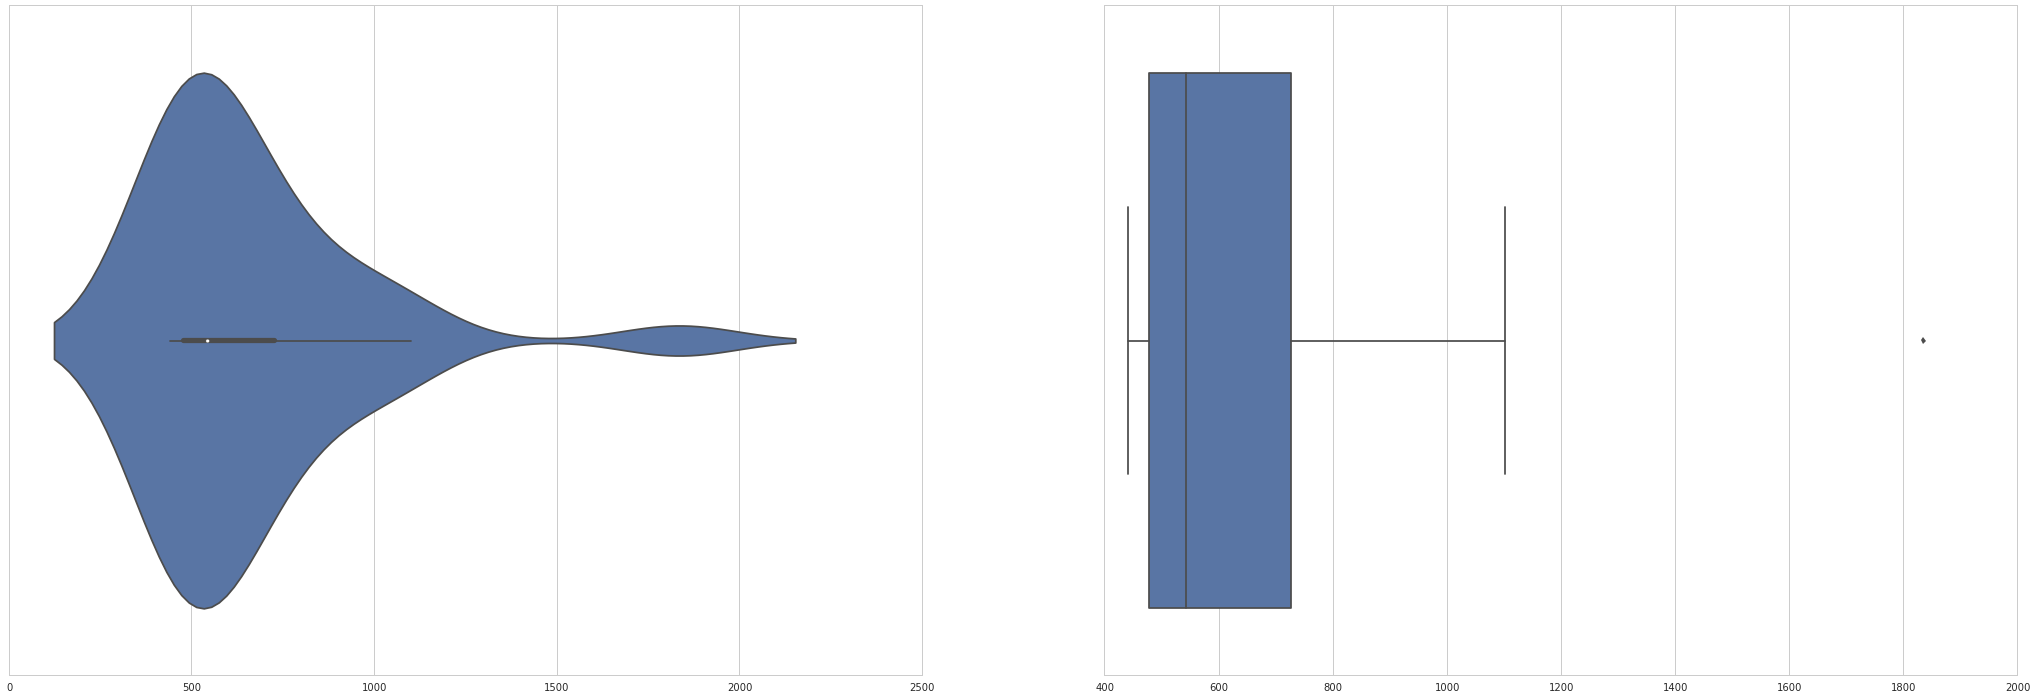

In [255]:
#violin plots for the most common 100 words' frequency in title 
funny_freq = []
plt.figure(figsize=(36,12))
print(funny_sorted_bar_freq)
for i in range(len(funny_sorted_bar_freq)):
    funny_freq.append(funny_sorted_bar_freq[i][1])
plt.subplot(1,2,1)    
sns.set_style("whitegrid")
ax = sns.violinplot(x=funny_freq)

plt.subplot(1,2,2)
ax = sns.boxplot(funny_freq)

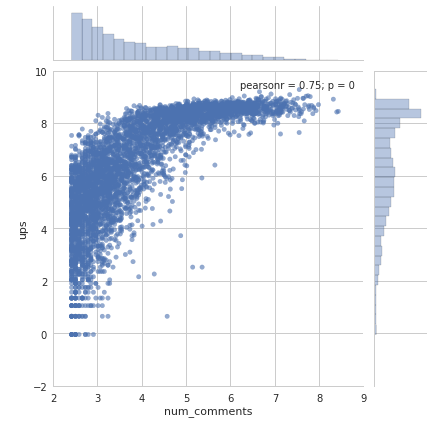

In [256]:
#1D histogram betwenn comments > 10 and ups >0 
funny_cmt = df_fun['num_comments'] > 10
funny_up = df_fun['ups'] > 0
funny_subset = df_fun[funny_cmt & funny_up]
sns.jointplot(np.log(funny_subset['num_comments']), np.log(funny_subset['ups']),alpha=0.6)

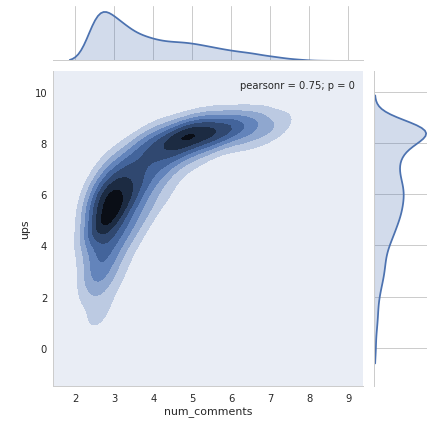

In [257]:
#KDE plot betwenn comments > 10 and ups >0 
sns.jointplot(np.log(funny_subset['num_comments']), np.log(funny_subset['ups']), kind='kde')

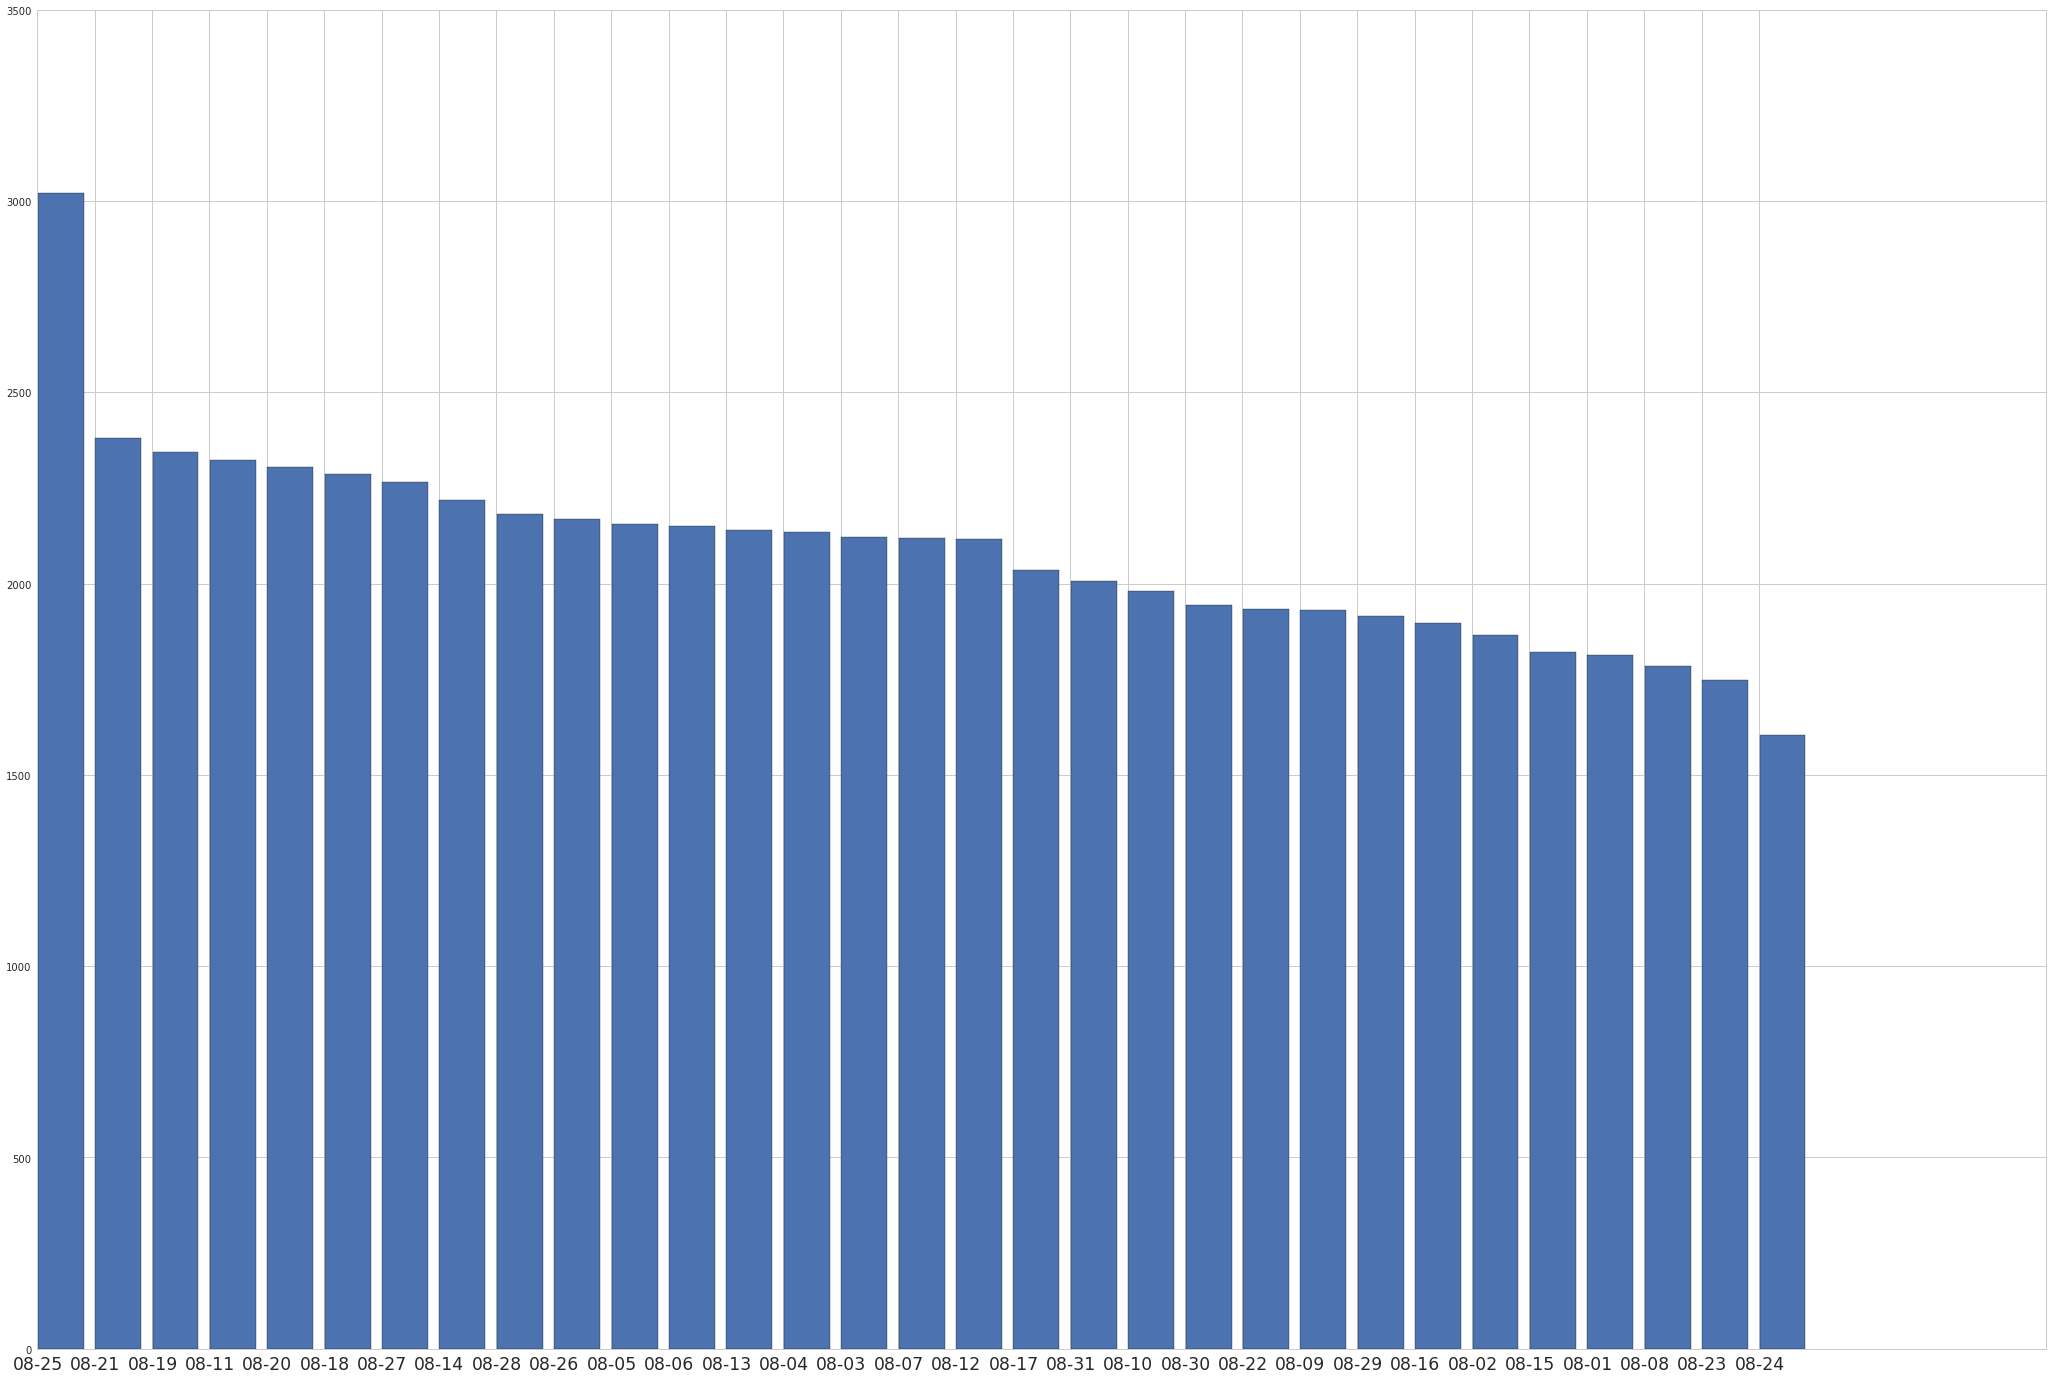

In [258]:
#date they post
import datetime

funny_time_creat = df_fun['created']
funny_time=[]
for i in range(len(funny_time_creat)):
    funny_time.append(datetime.datetime.fromtimestamp(funny_time_creat[i]).strftime('%m-%d'))
funny_time_cnt = Counter(funny_time).most_common(31)
#print(time_cnt)

#bar chart of date
funny_xlabel = []
funny_post_times = []
for i in range(len(funny_time_cnt)):
    funny_xlabel.append(funny_time_cnt[i][0])
    funny_post_times.append(funny_time_cnt[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(funny_post_times)), funny_post_times)
plt.xticks(range(len(funny_post_times)),funny_xlabel, size ='xx-large',horizontalalignment='center')
##plt.yscale('log')
plt.show()

[('00', 2907), ('01', 2452), ('02', 2106), ('03', 1866), ('04', 1607), ('05', 1426), ('06', 1452), ('07', 1559), ('08', 1758), ('09', 2184), ('10', 2584), ('11', 2994), ('12', 3169), ('13', 3346), ('14', 3518), ('15', 3584), ('16', 3661), ('17', 3614), ('18', 3499), ('19', 3246), ('20', 3377), ('21', 3120), ('22', 3132), ('23', 3030)]


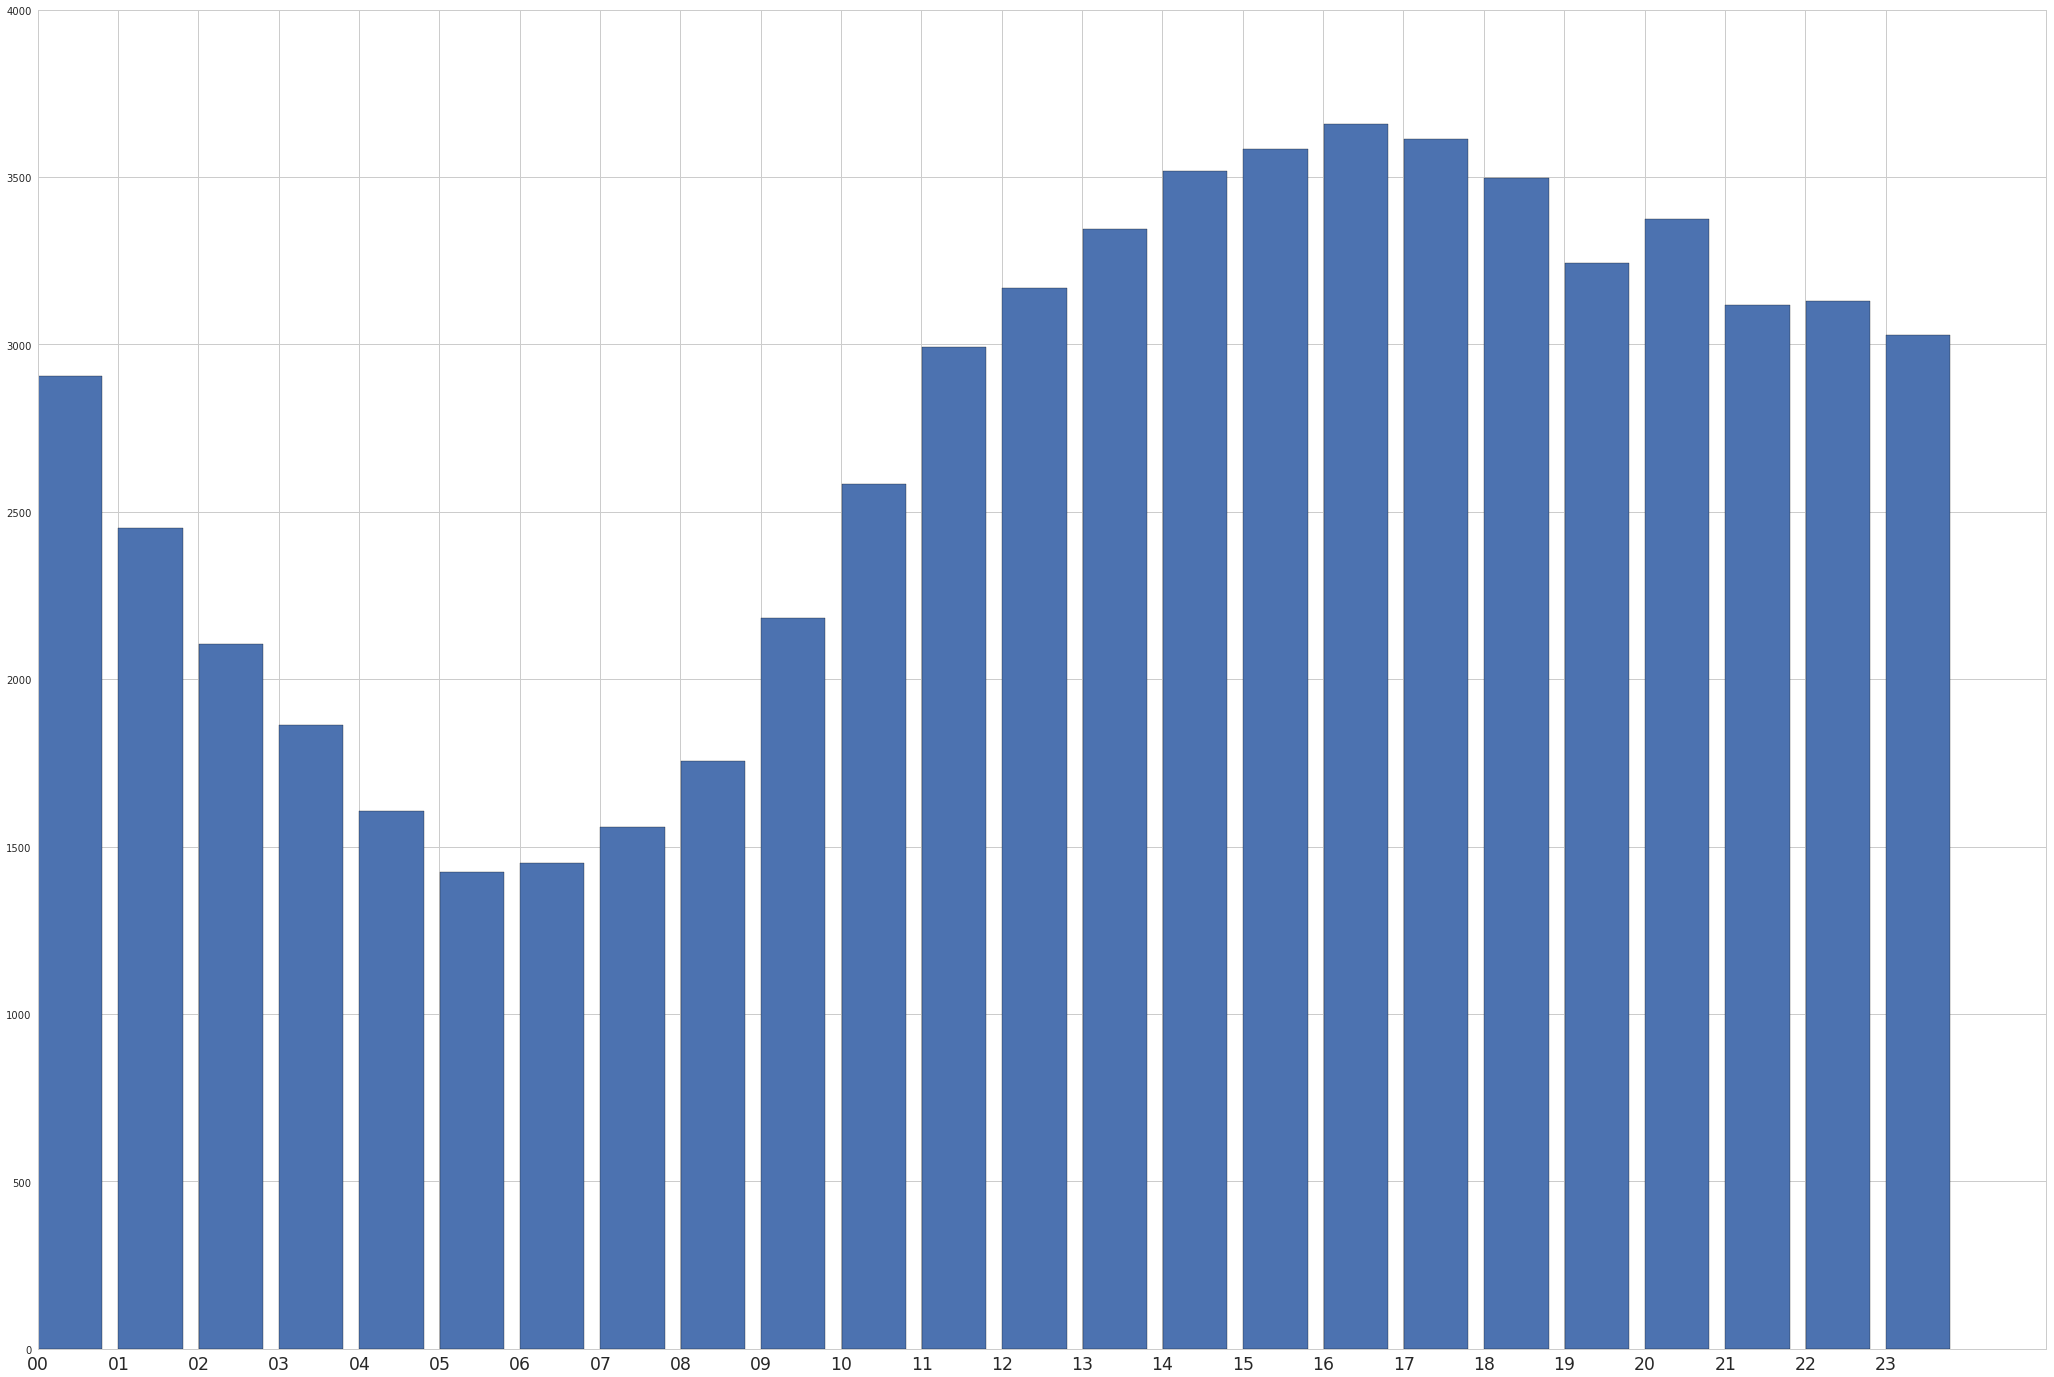

In [259]:
#time they post in one month
import datetime

funny_time_creat = df_fun['created']
funny_time=[]
for i in range(len(funny_time_creat)):
    funny_time.append(datetime.datetime.fromtimestamp(funny_time_creat[i]).strftime('%H'))
funny_time_cnt = Counter(funny_time).most_common()
funny_sorted_by_second = sorted(funny_time_cnt, key=lambda tup: tup[0])
print(funny_sorted_by_second)

#bar chart of date
funny_xlabel = []
funny_post_times = []
for i in range(len(funny_sorted_by_second)):
    funny_xlabel.append(funny_sorted_by_second[i][0])
    funny_post_times.append(funny_sorted_by_second[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(funny_post_times)), funny_post_times)
plt.xticks(range(len(funny_post_times)),funny_xlabel, size ='xx-large',horizontalalignment='center')
#plt.yscale('log')
plt.show()

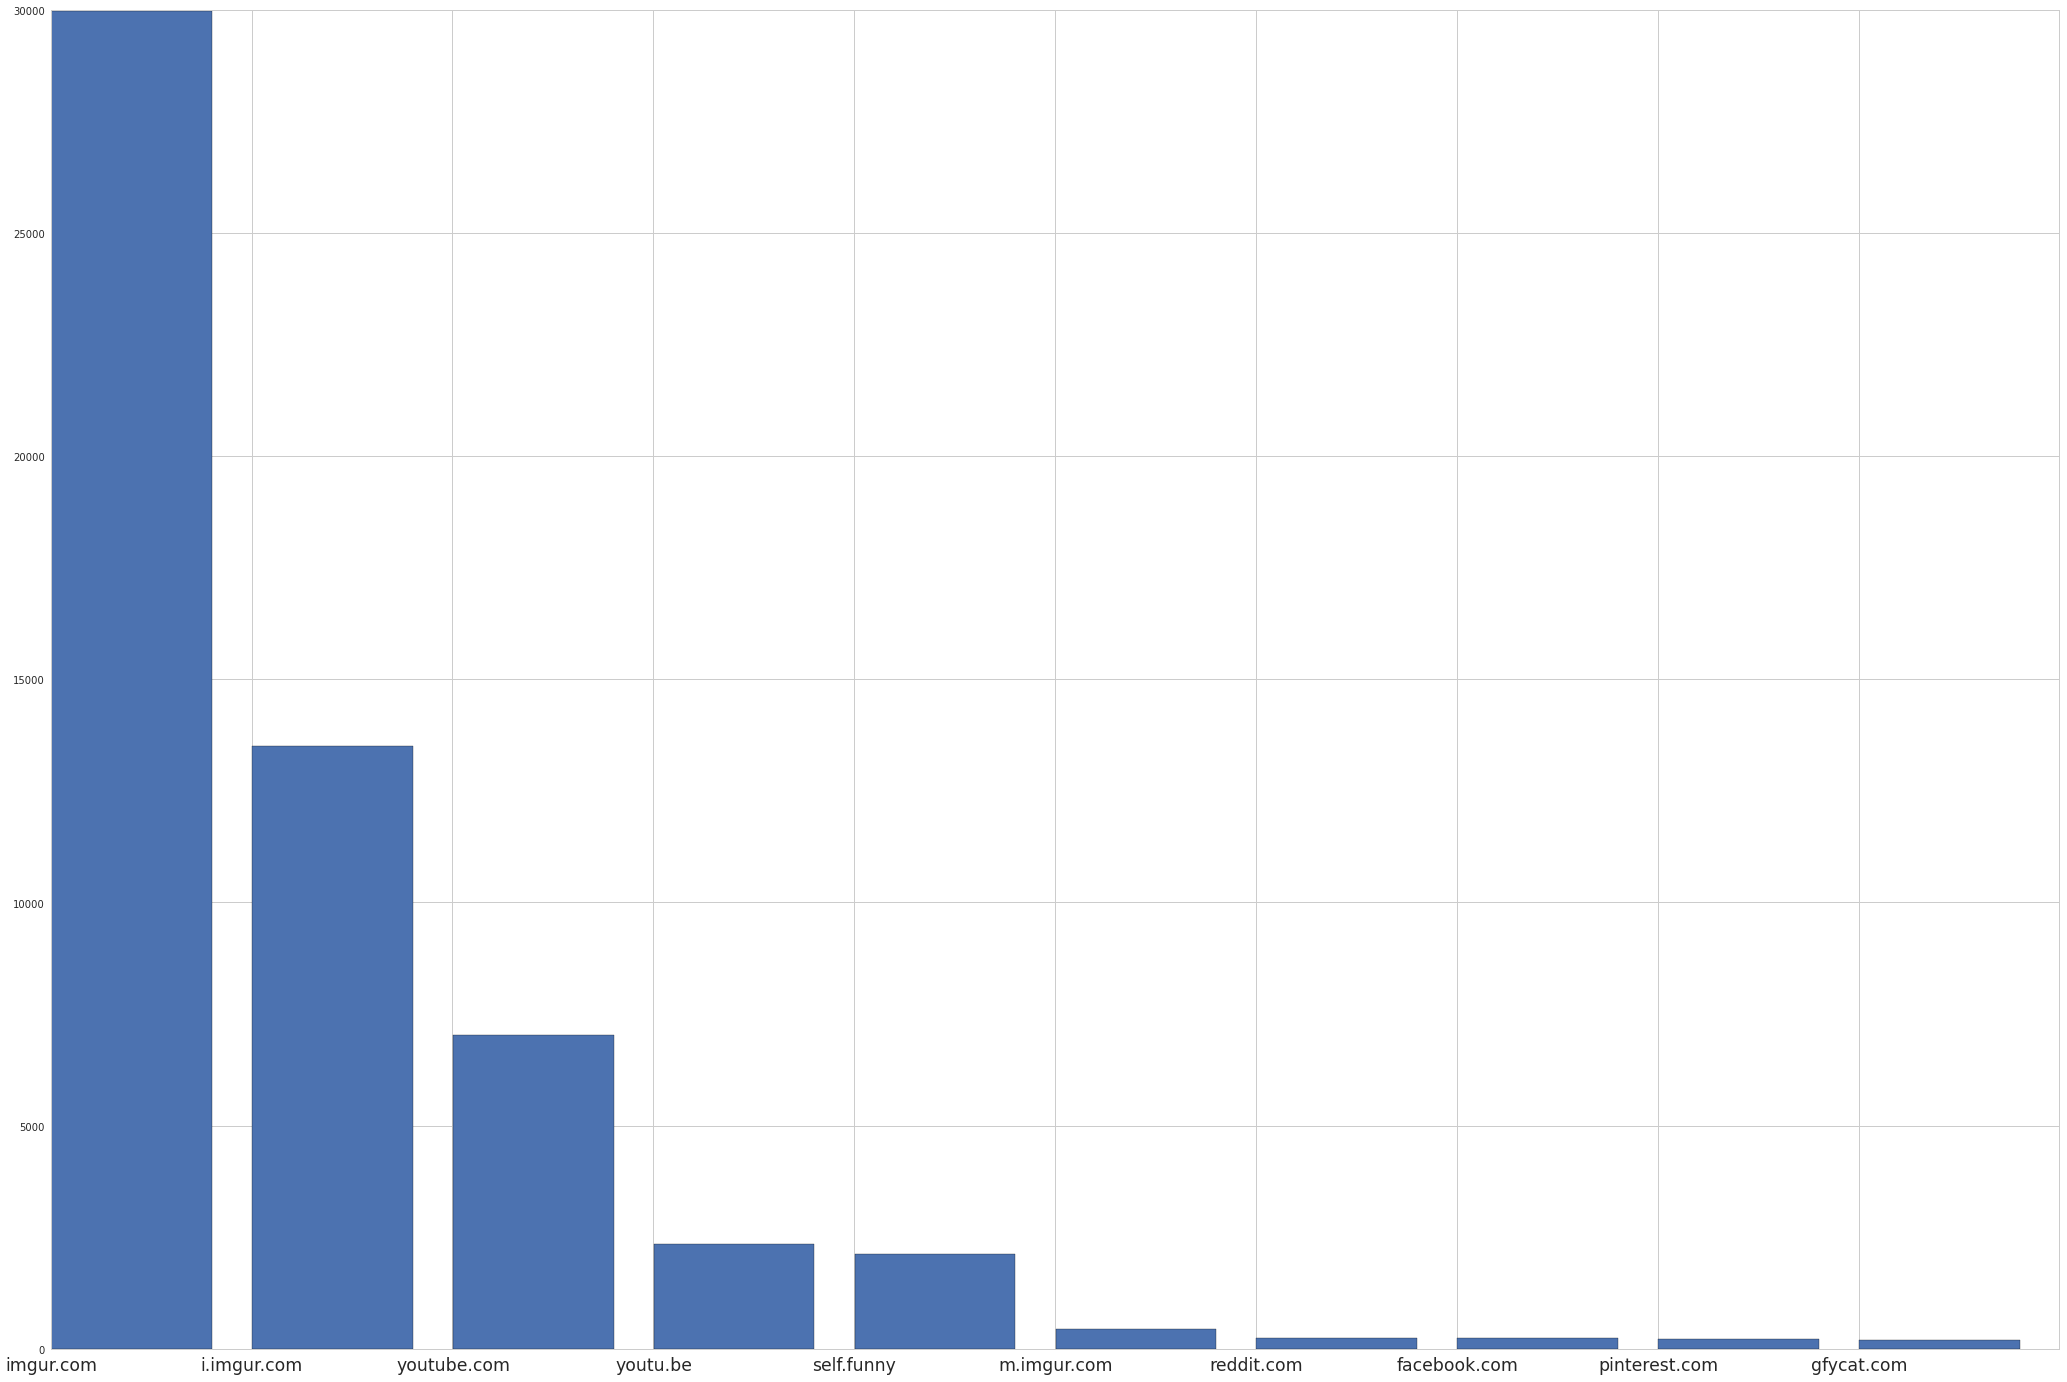

In [260]:
# website using domain before log transformation
funny_domain = df_fun['domain']
funny_counter_domain = Counter(funny_domain)
funny_domain_10 = funny_counter_domain.most_common(10)

funny_xlabel = []
funny_freq = []
for i in range(len(funny_domain_10)):
    funny_xlabel.append(funny_domain_10[i][0])
    funny_freq.append(funny_domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(funny_freq)), funny_freq)
plt.xticks(range(len(funny_freq)),funny_xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

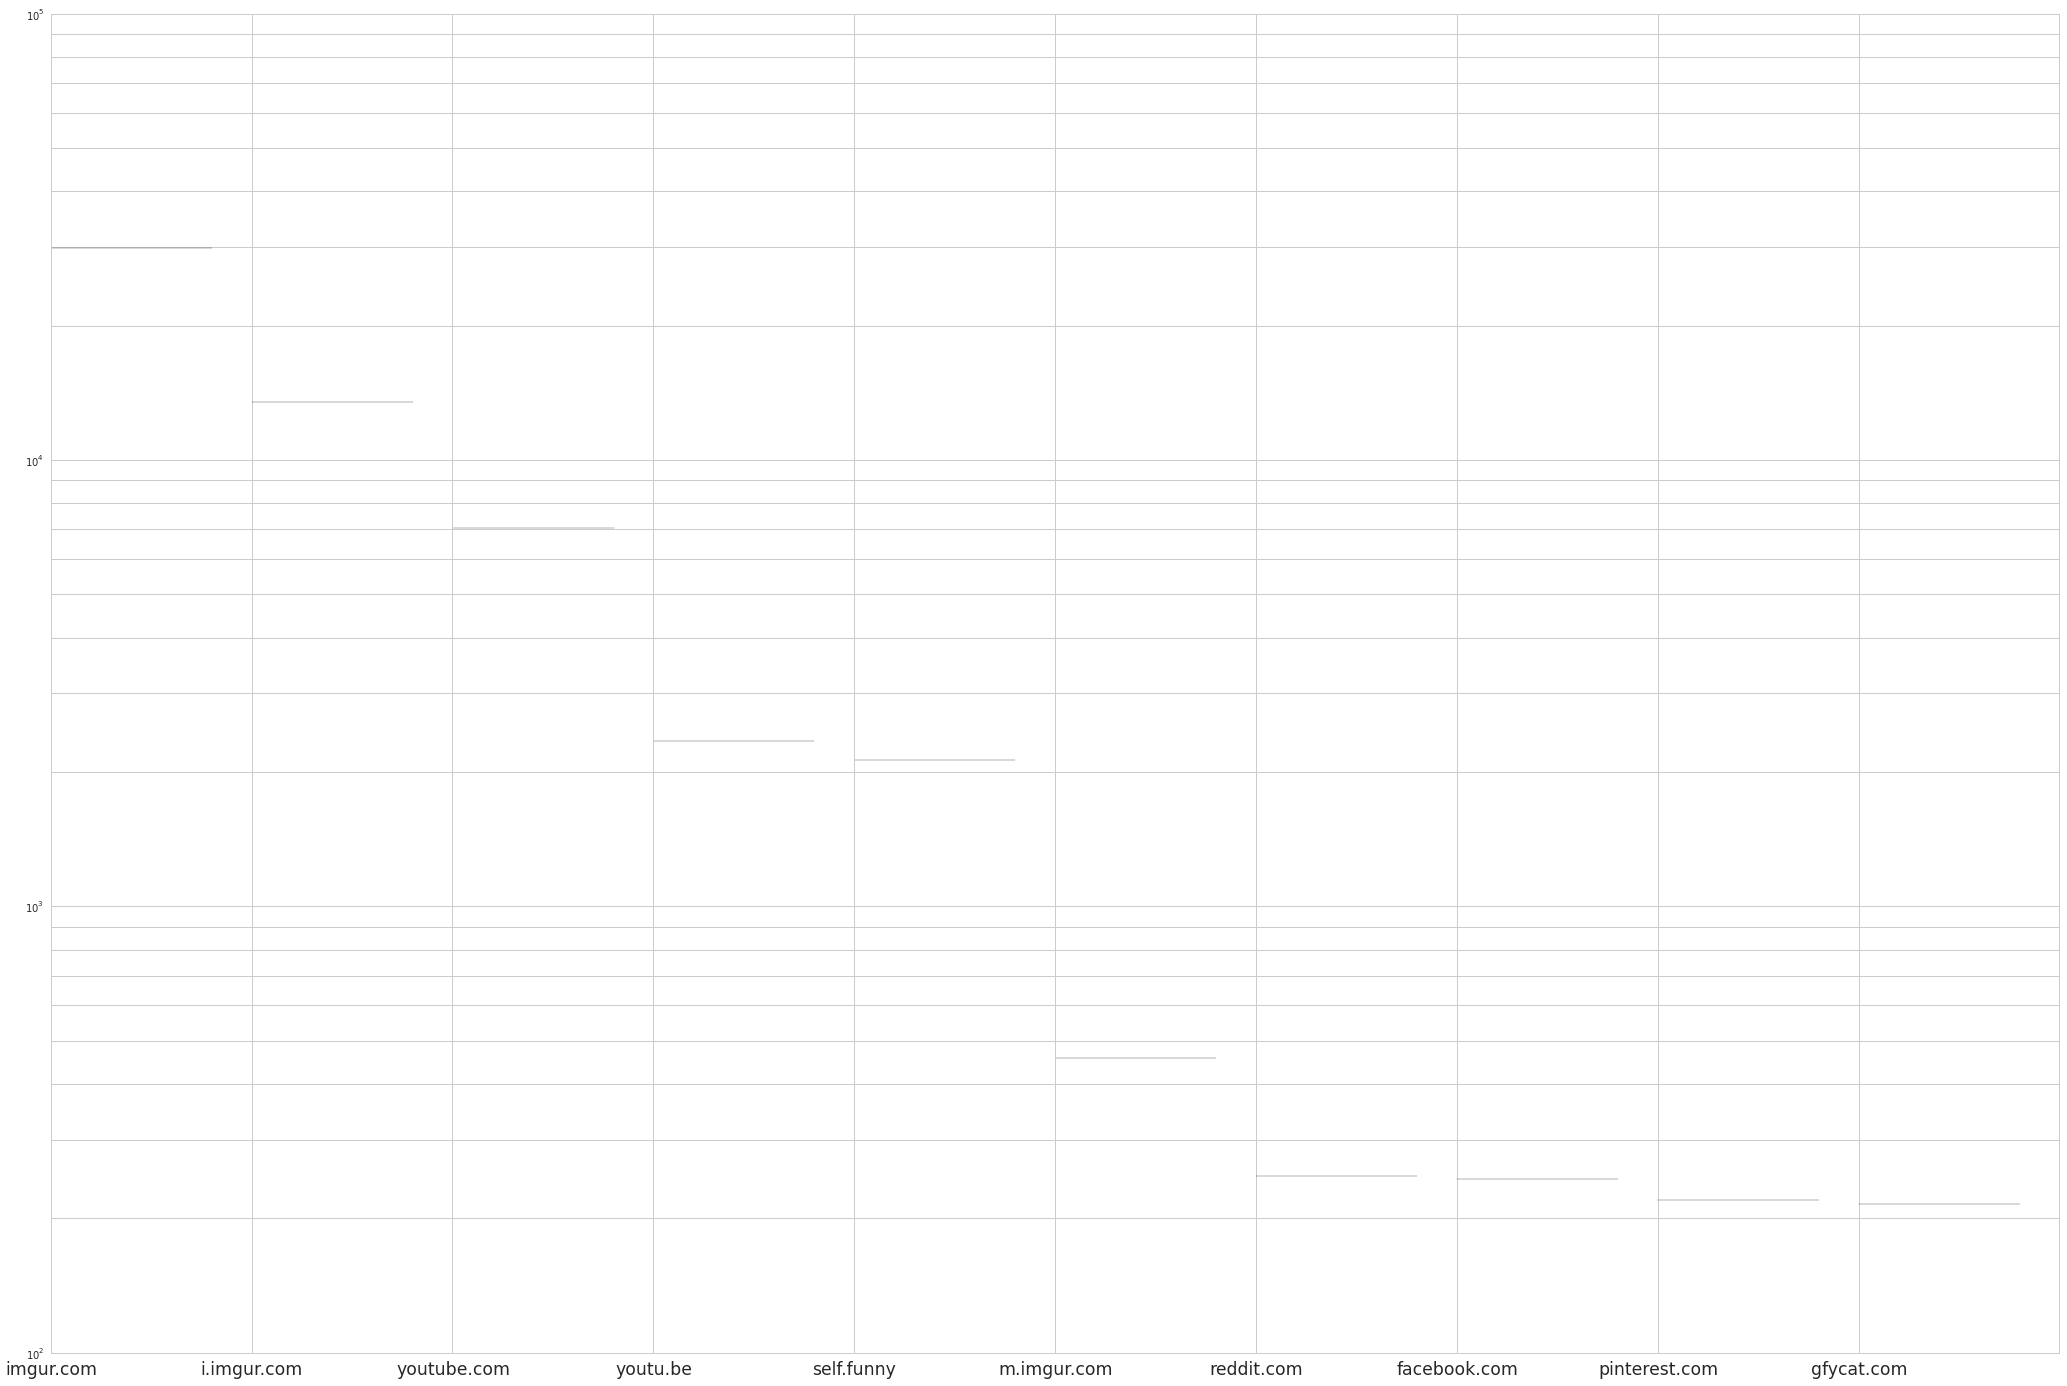

In [261]:
# website using domain before log transformation
funny_domain = df_fun['domain']
funny_counter_domain = Counter(funny_domain)
funny_domain_10 = funny_counter_domain.most_common(10)

funny_xlabel = []
funny_freq = []
for i in range(len(funny_domain_10)):
    funny_xlabel.append(funny_domain_10[i][0])
    funny_freq.append(funny_domain_10[i][1])

plt.figure(figsize=(36,24))
plt.bar(range(len(funny_freq)), funny_freq)
plt.xticks(range(len(funny_freq)),funny_xlabel, size ='xx-large')
plt.yscale('log')
plt.show()

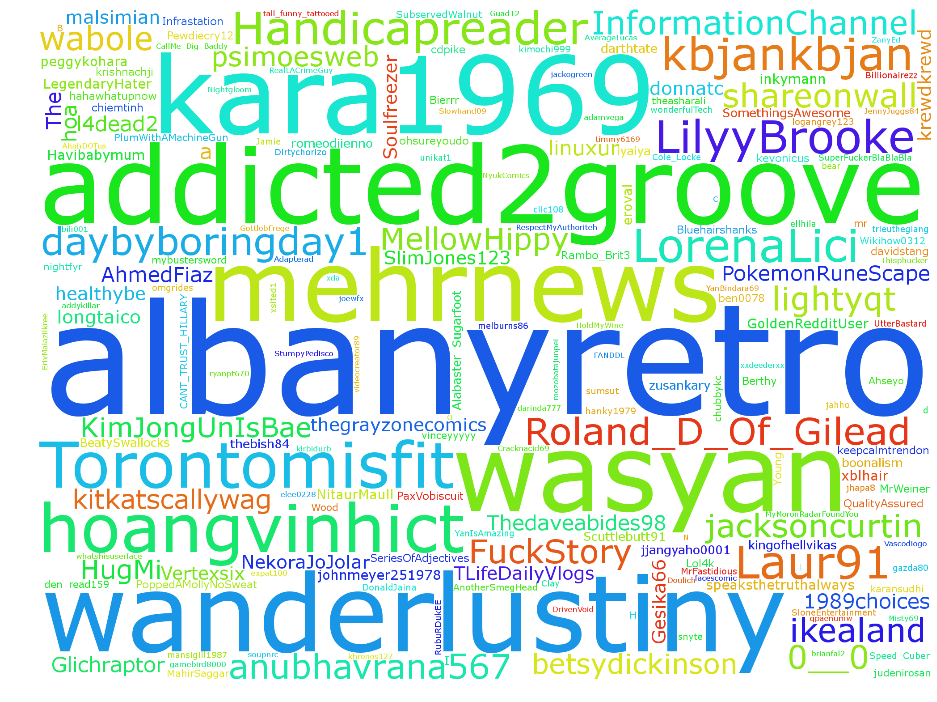

In [262]:
#word cloud for author
plt.figure(figsize=(36,12))
stopword = ['deleted']
funny_text = ""
for i in range(len(df_fun['author'])):
    funny_text = funny_text + str(df_fun['author'][i]) + " "
funny_wordcloud = WordCloud(font_path='Verdana.ttf',
                          stopwords=stopword,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(funny_text)

plt.imshow(funny_wordcloud)
plt.axis('off')
plt.show()

**Plots for askreddit**

In [263]:

#Find the most common 100 words in the title, except stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import operator
#counter = Counter(df_til['title'])
ask_title_notflat = [a.split() for a in df_ask['title']]
ask_counter = Counter(chain.from_iterable(ask_title_notflat))
ask_bar_word = ask_counter.most_common(80)
ask_cloud_word = ask_counter.most_common(300)
stopwords = stopwords.words('english')
stopwords=[x.encode('ISO-8859-1').upper() for x in stopwords]
stopwords+=["TIL","TIL:","ONE","CALL","LIKE","-","ALSO","ACTUALLY","CAN","COULD","WOULD","&amp;","SOMEONE","WHAT'S","REDDIT","REDDIT,","DON'T","REDDIT?"]
print(stopwords)

ask_bar_base_word= removeTenses(ask_bar_word)
ask_bar_freq_word = removestopwords(ask_bar_base_word,stopwords)
ask_cloud_base_word= removeTenses(ask_cloud_word)
ask_cloud_freq_word = removestopwords(ask_cloud_base_word,stopwords)
ask_sorted_bar_freq = sorted(ask_bar_freq_word.items(), key=operator.itemgetter(1),reverse=True)
print(ask_sorted_bar_freq)
#low_stop_word=[]
#for stpwr in stop_words:
#    low_stop_word.append(stpwr.lower().encode('ISO-8859-1'))
#stop_words+=low_stop_word

['I', 'ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', 'YOUR', 'YOURS', 'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', 'HER', 'HERS', 'HERSELF', 'IT', 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH', 'WHO', 'WHOM', 'THIS', 'THAT', 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE', 'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'A', 'AN', 'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY', 'FOR', 'WITH', 'ABOUT', 'AGAINST', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE', 'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER', 'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY', 'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH', 'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'S', 'T', 'CAN', 'WILL', 'JUST', 'DON', 'SHOULD', 'NO

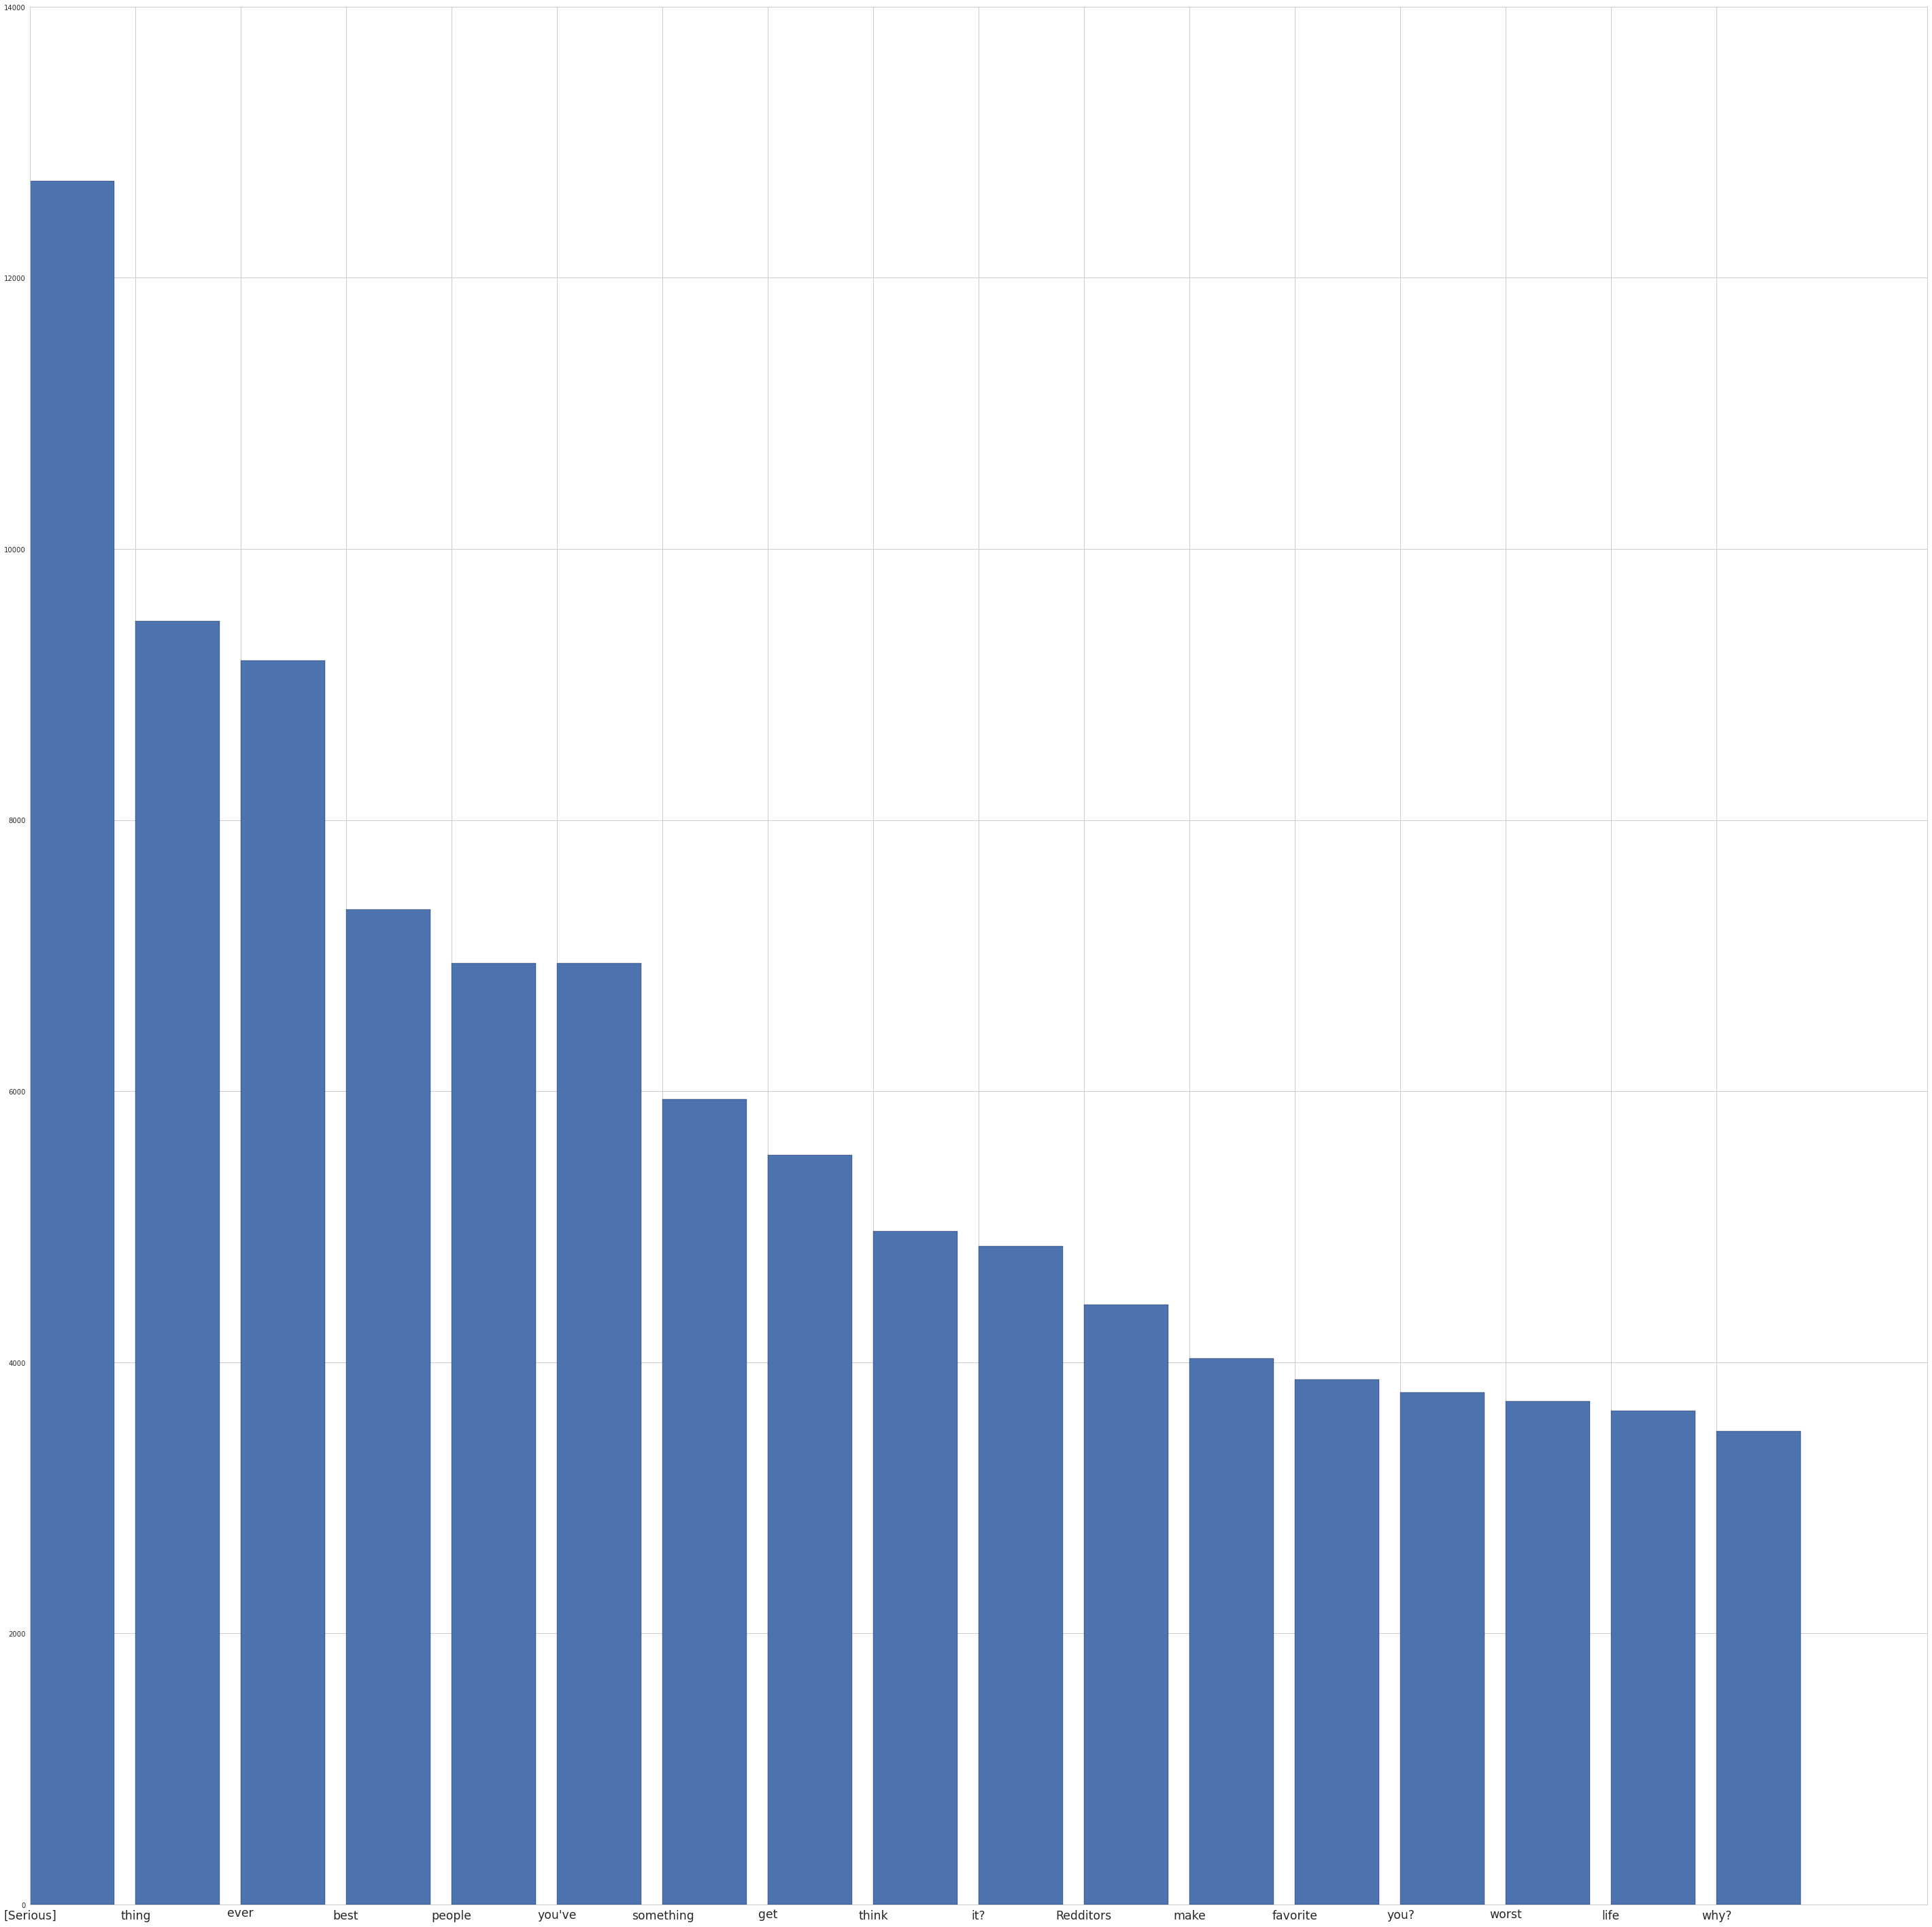

In [264]:
ask_xlabel = []
ask_freq = []
for i in range(len(ask_sorted_bar_freq)):
    ask_xlabel.append(ask_sorted_bar_freq[i][0])
    ask_freq.append(ask_sorted_bar_freq[i][1])

plt.figure(figsize=(50,50))
plt.bar(range(len(ask_freq)), ask_freq)
plt.xticks(range(len(ask_freq)),ask_xlabel, size ='xx-large')
#plt.yscale('log')
plt.show()

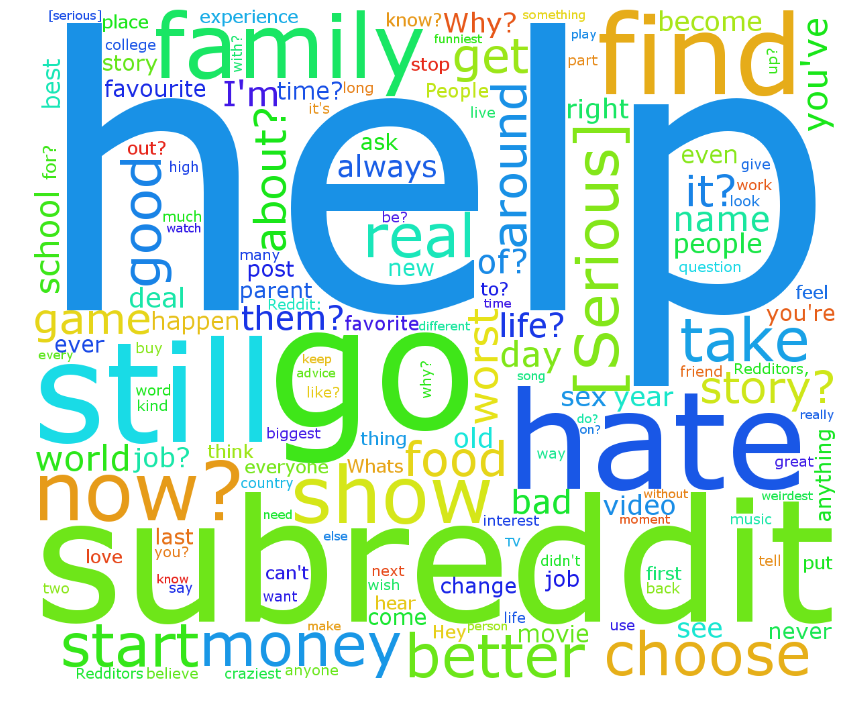

In [265]:
ask_wordcloud = WordCloud(font_path='Verdana.ttf',
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate_from_frequencies([( k,v) for k, v in ask_cloud_freq_word.iteritems()])

plt.figure(figsize=(36,12))
plt.imshow(ask_wordcloud)
plt.axis('off')
plt.show()

[('[Serious]', 12718), ('thing', 9469), ('ever', 9177), ('best', 7341), ('people', 6944), ("you've", 6944), ('something', 5941), ('get', 5529), ('think', 4971), ('it?', 4860), ('Redditors', 4428), ('make', 4033), ('favorite', 3875), ('you?', 3782), ('worst', 3716), ('life', 3645), ('why?', 3496)]


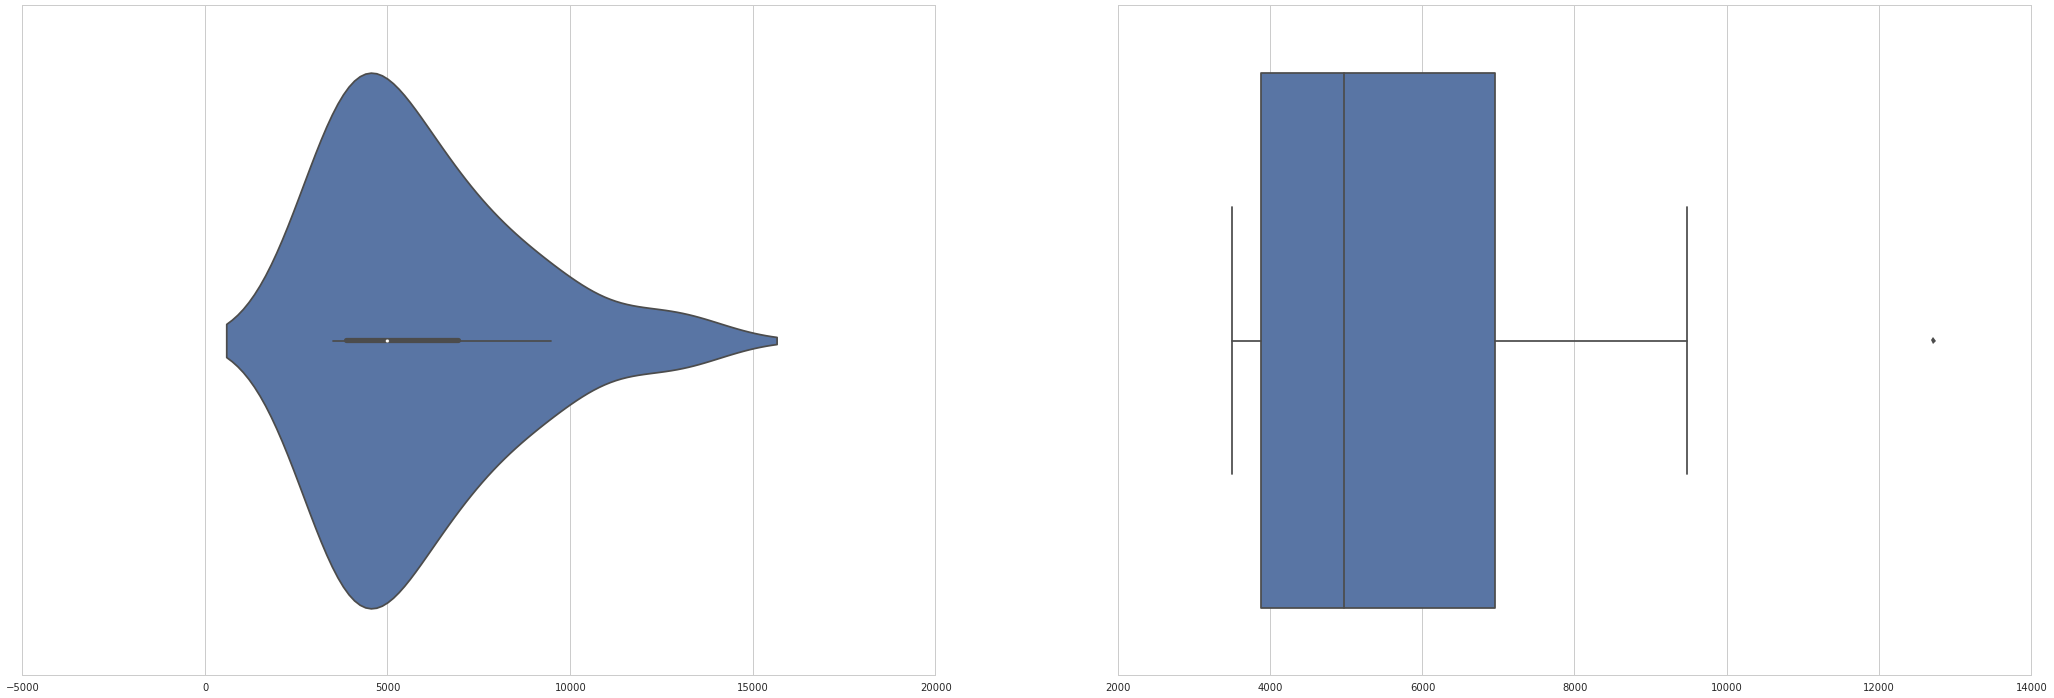

In [266]:
#violin plots for the most common 100 words' frequency in title 
ask_freq = []
plt.figure(figsize=(36,12))
print(ask_sorted_bar_freq)
for i in range(len(ask_sorted_bar_freq)):
    ask_freq.append(ask_sorted_bar_freq[i][1])
plt.subplot(1,2,1)    
sns.set_style("whitegrid")
ax = sns.violinplot(x=ask_freq)

plt.subplot(1,2,2)
ax = sns.boxplot(ask_freq)

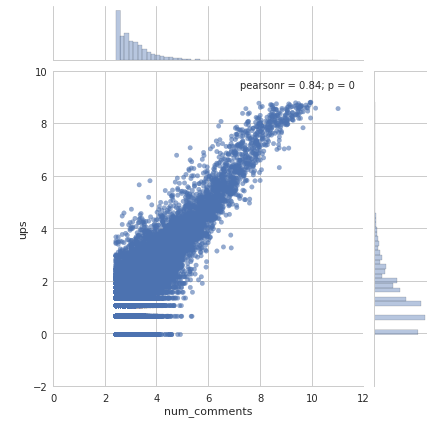

In [267]:
#1D histogram betwenn comments > 10 and ups >0 
ask_cmt = df_ask['num_comments'] > 10
ask_up = df_ask['ups'] > 0
ask_subset = df_ask[ask_cmt & ask_up]
sns.jointplot(np.log(ask_subset['num_comments']), np.log(ask_subset['ups']),alpha=0.6)

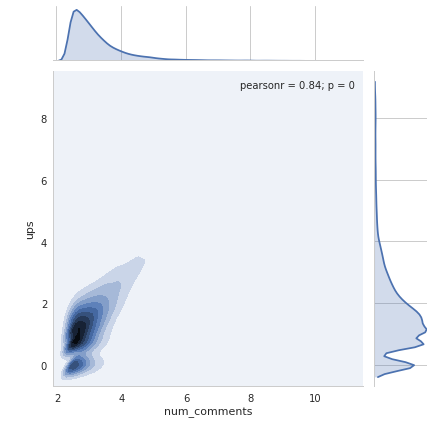

In [268]:
#KDE plot betwenn comments > 10 and ups >0 
sns.jointplot(np.log(ask_subset['num_comments']), np.log(ask_subset['ups']), kind='kde')

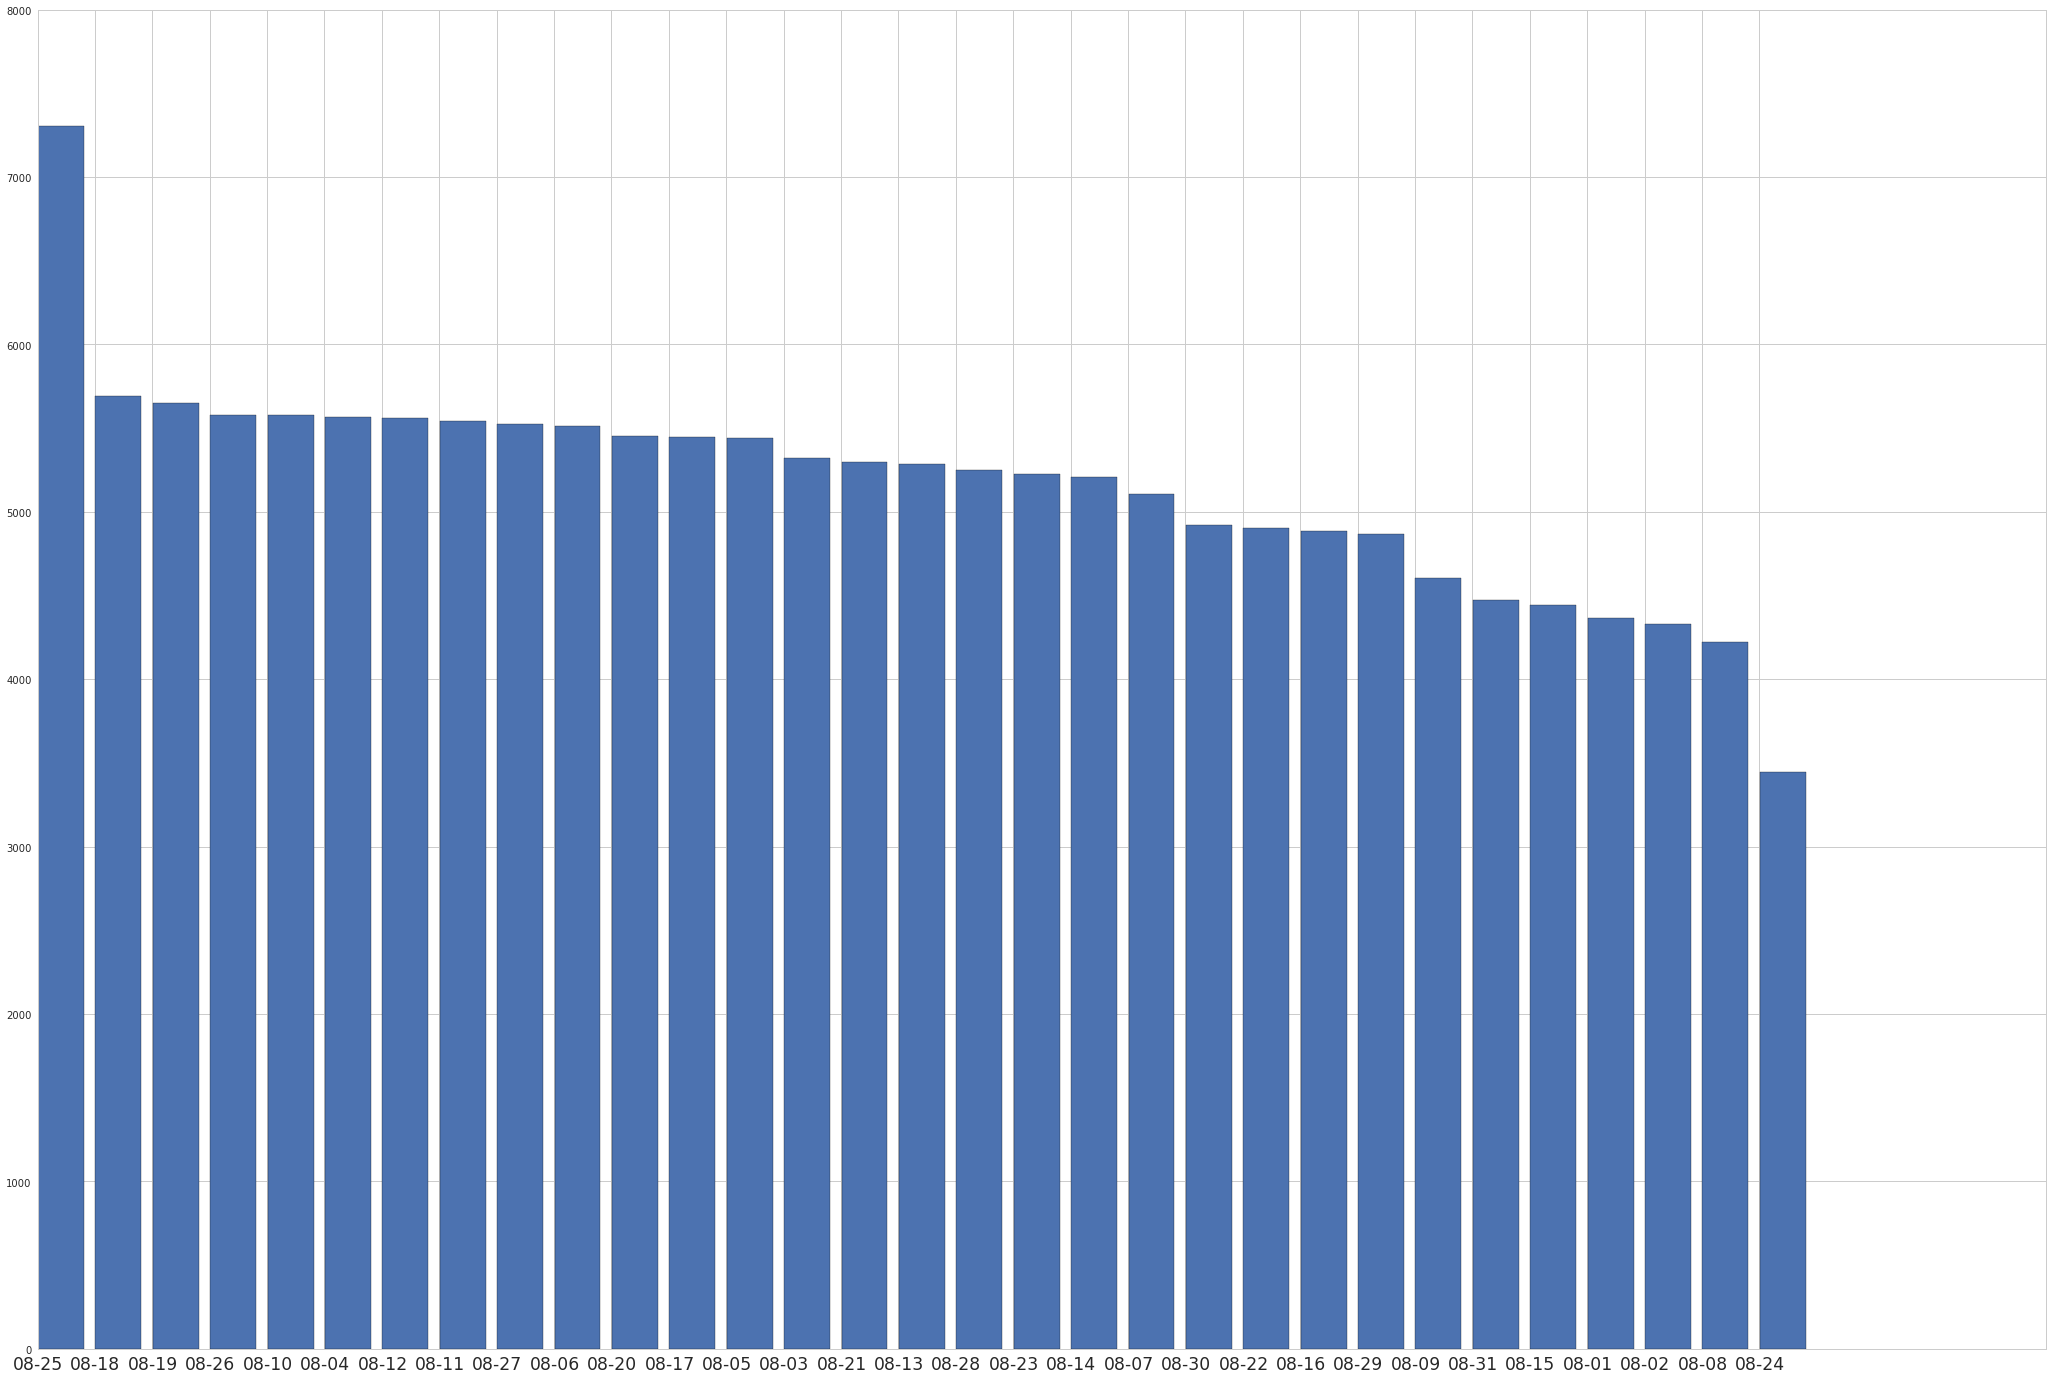

In [269]:
#date they post
import datetime

ask_time_creat = df_ask['created']
ask_time=[]
for i in range(len(ask_time_creat)):
    ask_time.append(datetime.datetime.fromtimestamp(ask_time_creat[i]).strftime('%m-%d'))
ask_time_cnt = Counter(ask_time).most_common(31)
#print(time_cnt)

#bar chart of date
ask_xlabel = []
ask_post_times = []
for i in range(len(ask_time_cnt)):
    ask_xlabel.append(ask_time_cnt[i][0])
    ask_post_times.append(ask_time_cnt[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(ask_post_times)), ask_post_times)
plt.xticks(range(len(ask_post_times)),ask_xlabel, size ='xx-large',horizontalalignment='center')
##plt.yscale('log')
plt.show()

[('00', 755), ('01', 688), ('02', 656), ('03', 544), ('04', 509), ('05', 465), ('06', 494), ('07', 509), ('08', 533), ('09', 706), ('10', 767), ('11', 908), ('12', 995), ('13', 1019), ('14', 1030), ('15', 1127), ('16', 1017), ('17', 999), ('18', 861), ('19', 914), ('20', 879), ('21', 843), ('22', 776), ('23', 823)]


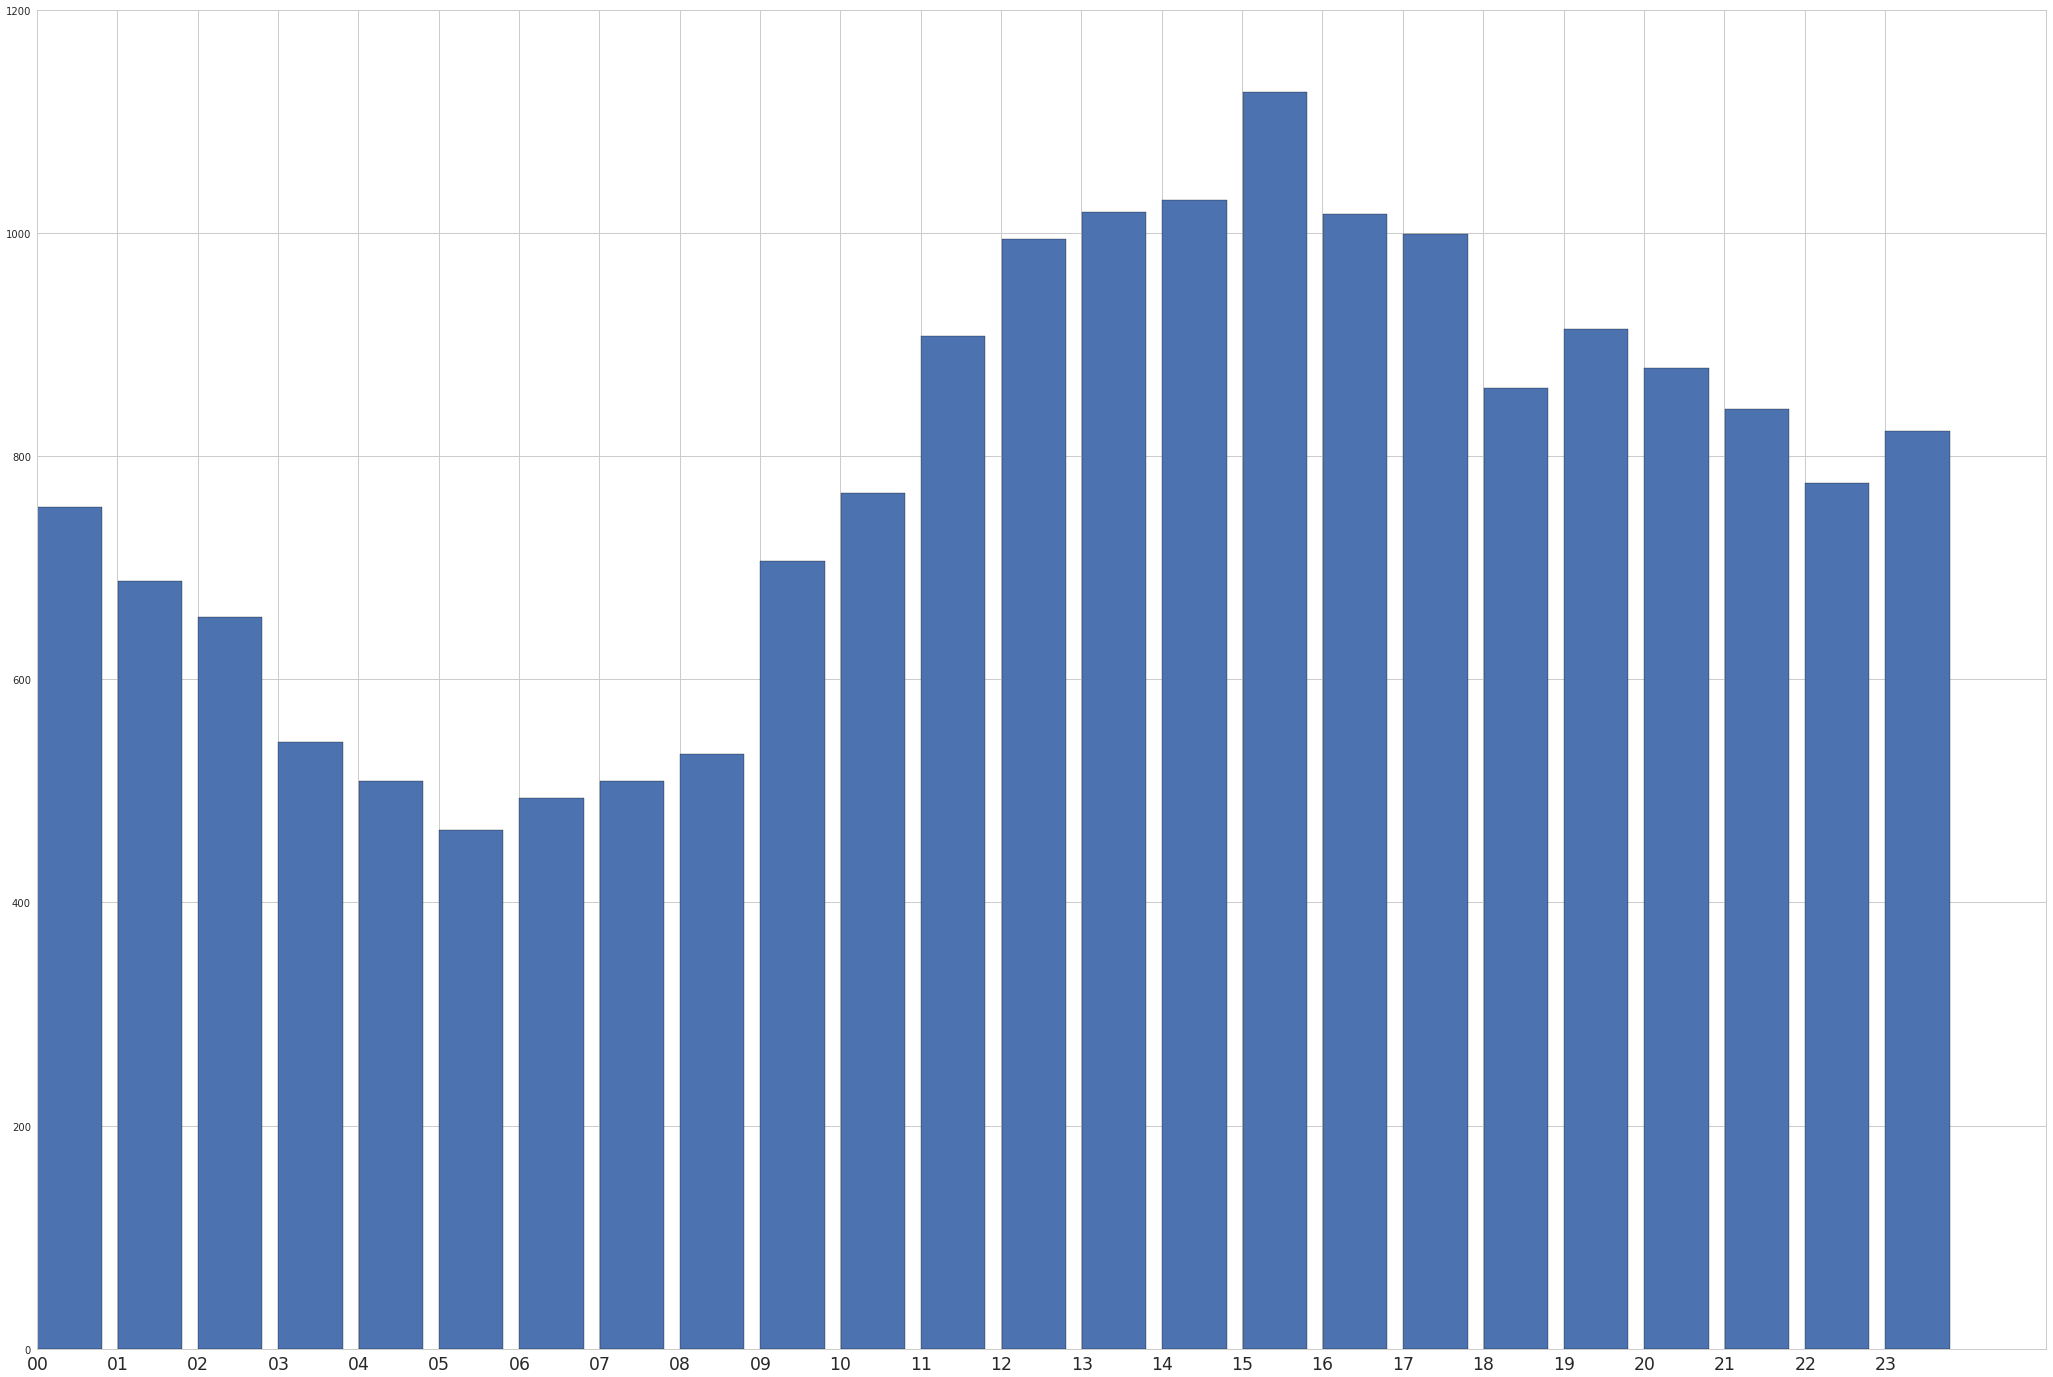

In [270]:
#time they post in one month
import datetime

ask_time_creat = df_til['created']
ask_time=[]
for i in range(len(ask_time_creat)):
    ask_time.append(datetime.datetime.fromtimestamp(ask_time_creat[i]).strftime('%H'))
ask_time_cnt = Counter(ask_time).most_common()
ask_sorted_by_second = sorted(ask_time_cnt, key=lambda tup: tup[0])
print(ask_sorted_by_second)

#bar chart of date
ask_xlabel = []
ask_post_times = []
for i in range(len(ask_sorted_by_second)):
    ask_xlabel.append(ask_sorted_by_second[i][0])
    ask_post_times.append(ask_sorted_by_second[i][1])
   
plt.figure(figsize=(36,24))
plt.bar(range(len(ask_post_times)), ask_post_times)
plt.xticks(range(len(ask_post_times)),ask_xlabel, size ='xx-large',horizontalalignment='center')
#plt.yscale('log')
plt.show()

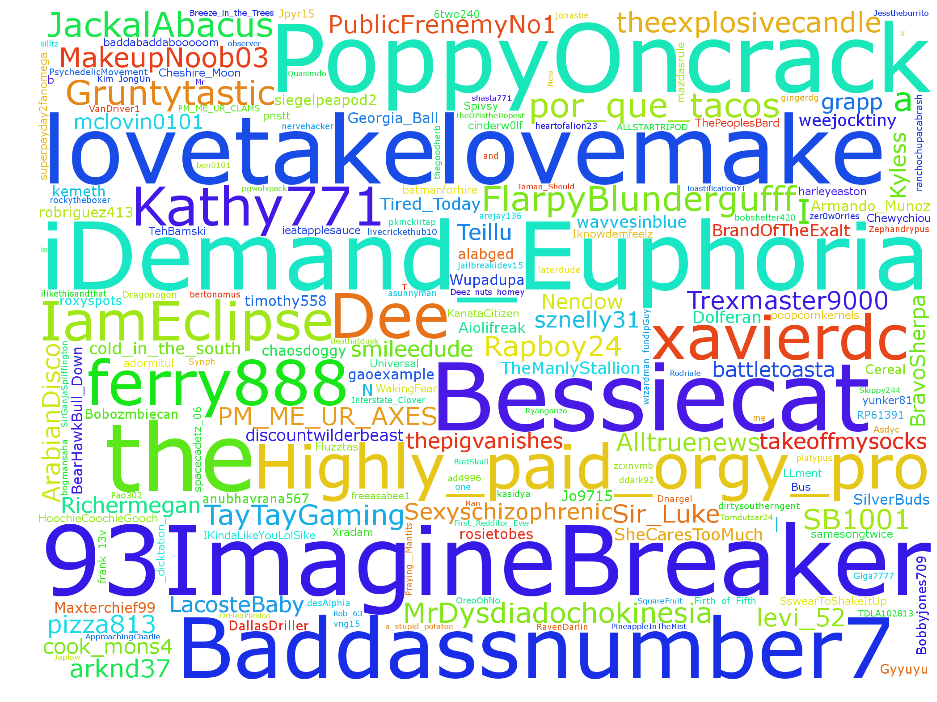

In [271]:
#word cloud for author
plt.figure(figsize=(36,12))
stopword = ['deleted']
ask_text = ""
for i in range(len(df_ask['author'])):
    ask_text = ask_text + str(df_ask['author'][i]) + " "
ask_wordcloud = WordCloud(font_path='Verdana.ttf',
                          stopwords=stopword,
                          background_color='white',
                          width=2000,
                          height=1500
                         ).generate(ask_text)

plt.imshow(ask_wordcloud)
plt.axis('off')
plt.show()